In [1]:
from sklearn.decomposition import PCA
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import manifold
import seaborn as sns
import umap

In [2]:
# load dataset into Pandas DataFrame
df = pd.read_csv('covid-selected-data.csv',index_col=0)
label = pd.read_csv('covid-selected-data-labels.csv', index_col=0)

In [3]:
df[:5]

SLPI   SCGB1A1   SCGB3A1  IGLV3-19  IGHV4-34  \
AAACCTGAGACACTAA_1-0 -0.299600 -0.209672 -0.303414 -0.124916 -0.029675   
AAACCTGAGGATATAC_1-0 -0.174449 -0.188095 -0.307278 -0.030387  0.127351   
AAACCTGAGGTCATCT_1-0 -0.250839  0.001586 -0.158335 -0.127563 -0.286497   
AAACGGGAGCTACCTA_1-0 -0.185059 -0.212178 -0.297900  0.145107  0.185361   
AAACGGGAGGAATTAC_1-0 -0.225948 -0.124393 -0.150766 -0.106845  0.062172   

                         WFDC2    BPIFB1     IGHG1      GNLY      MSMB  ...  \
AAACCTGAGACACTAA_1-0 -0.173679 -0.245457 -0.045119 -0.232438 -0.245367  ...   
AAACCTGAGGATATAC_1-0 -0.167250 -0.202737 -0.146072 -0.312133 -0.219180  ...   
AAACCTGAGGTCATCT_1-0 -0.231720 -0.295893 -0.014139 -0.198845 -0.384431  ...   
AAACGGGAGCTACCTA_1-0 -0.150315 -0.121878 -0.004044 -0.301263 -0.145767  ...   
AAACGGGAGGAATTAC_1-0 -0.144326 -0.135881 -0.112006 -0.284480 -0.156938  ...   

                      AL121748.1  AC091271.1  TMPRSS11A     GPR42    MAATS1  \
AAACCTGAGACACTAA_1-0   -0.002161   -0.278853  -0.049338 -0.067806  0.014586   
AAACCTGAGGATATAC_1-0   -0.023173   -0.134107  -0.049219 -0.005433 -0.122310   
AAACCTGAGGTCATCT_1-0   -0.049942    0.061155  -0.049338 -0.032648 -0.053740   
AAACGGGAGCTACCTA_1-0   -0.021301   -0.128485  -0.049338 -0.045541 -0.105046   
AAACGGGAGGAATTAC_1-0   -0.034778   -0.134924  -0.061330  0.373200 -0.112133   

                        RNASE6   CLLU1OS  AL138781.1   KIR3DX1  BX284668.6  
AAACCTGAGACACTAA_1-0  3.340670  0.013455   -0.063450 -0.044314    0.356231  
AAACCTGAGGATATAC_1-0 -0.561601 -4.031731   -0.152772 -0.077827   -0.037313  
AAACCTGAGGTCATCT_1-0 -0.001551  0.046797   -0.031315 -0.116844    0.011145  
AAACGGGAGCTACCTA_1-0 -0.603013 -0.060725   -0.093516  0.448147   -0.053735  
AAACGGGAGGAATTAC_1-0 -0.678061  0.027075   -0.127998 -0.095437   -0.039752  

[5 rows x 1999 columns]

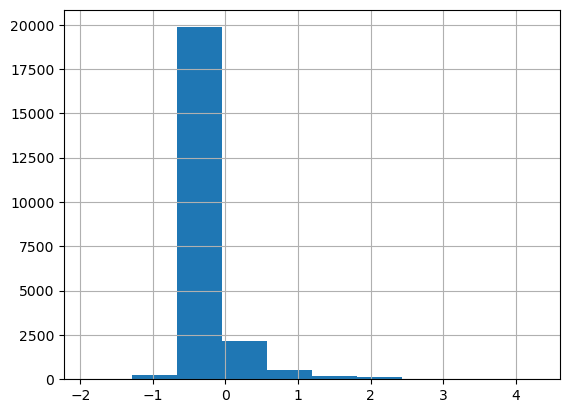

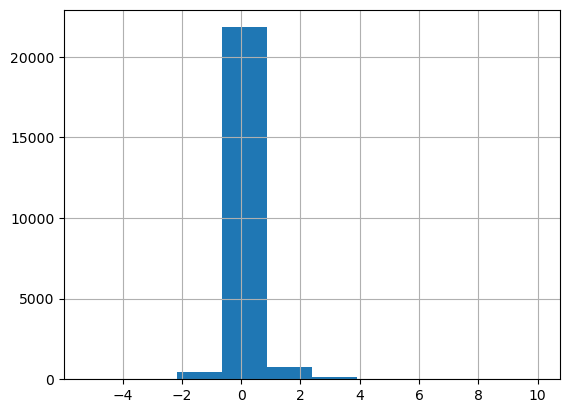

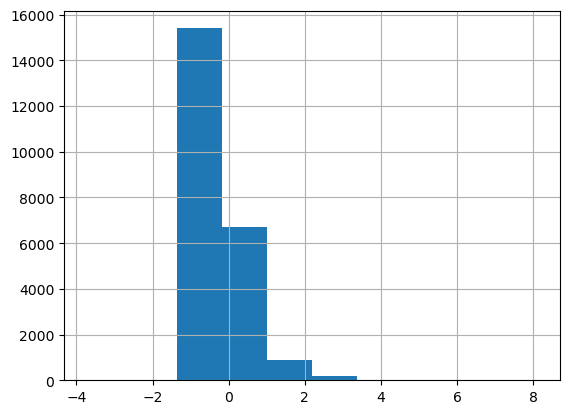

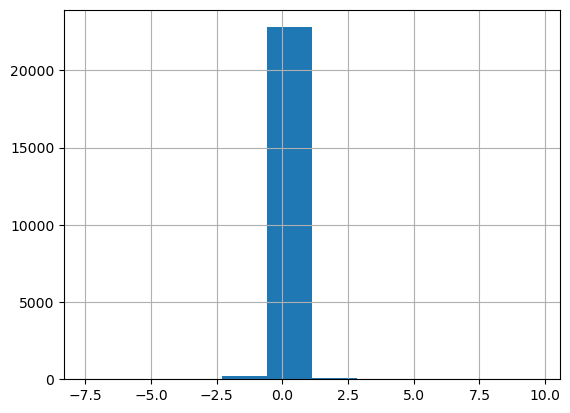

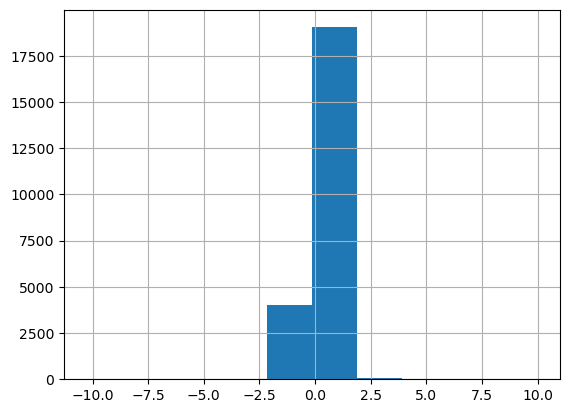

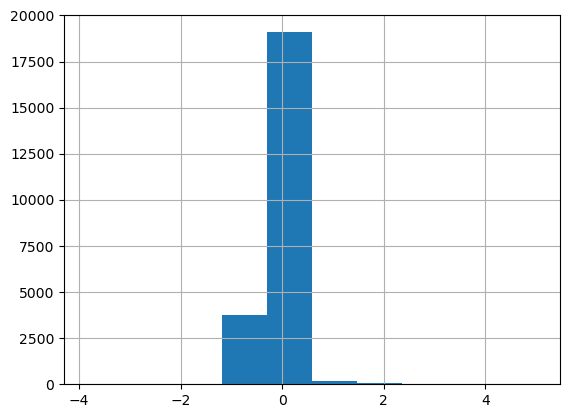

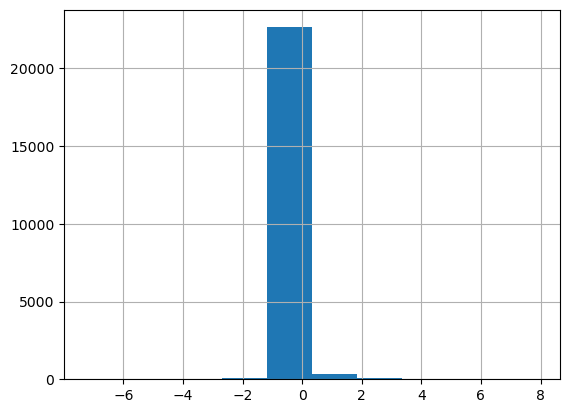

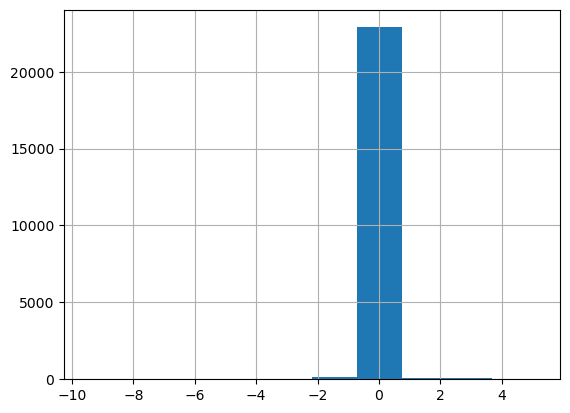

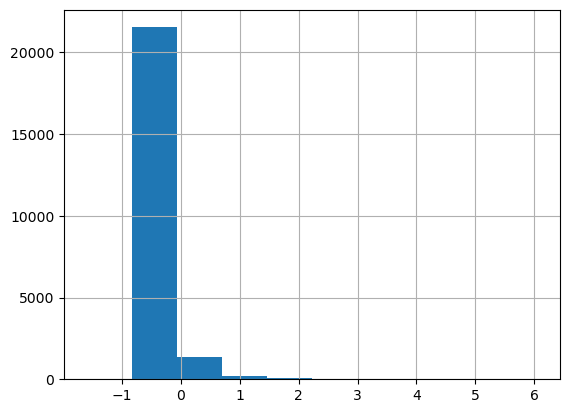

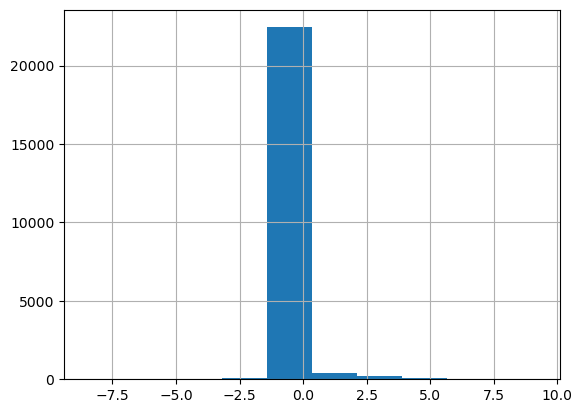

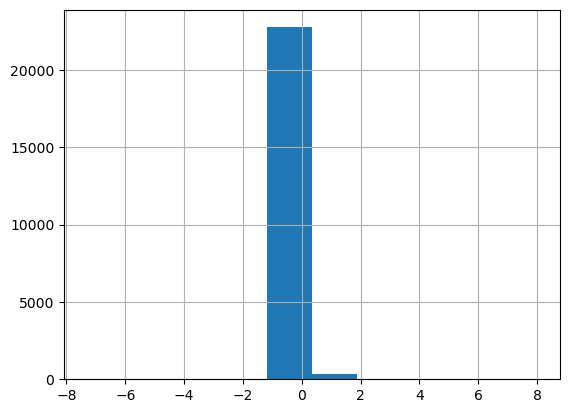

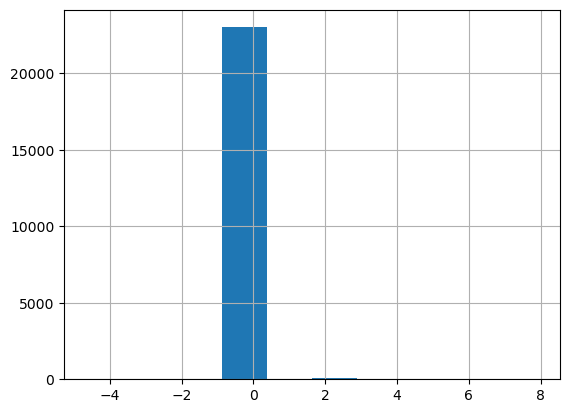

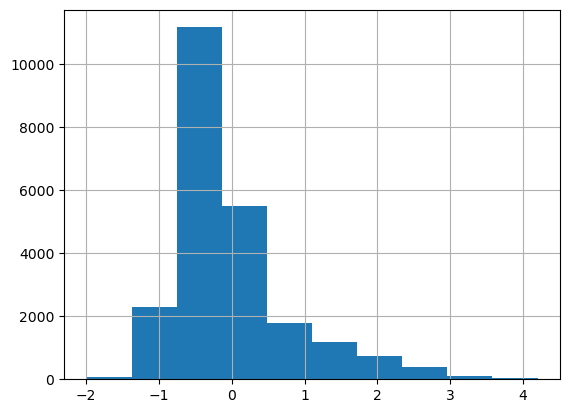

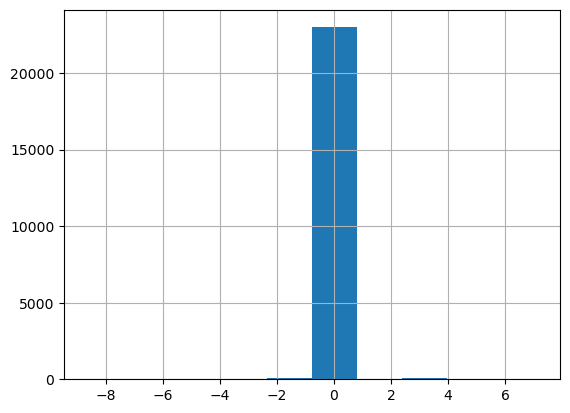

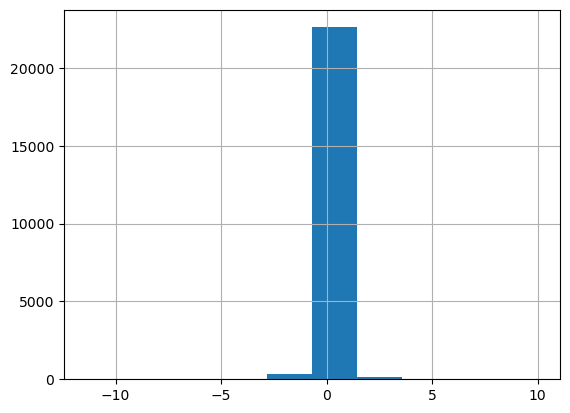

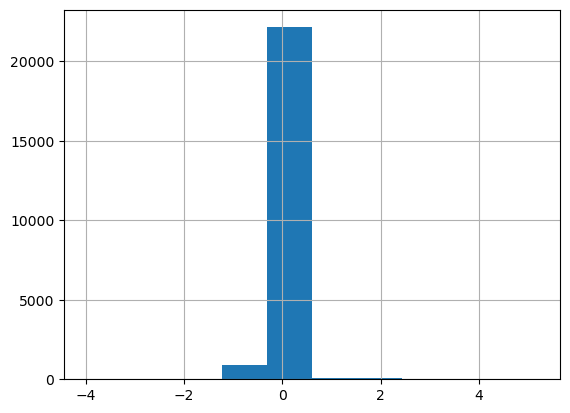

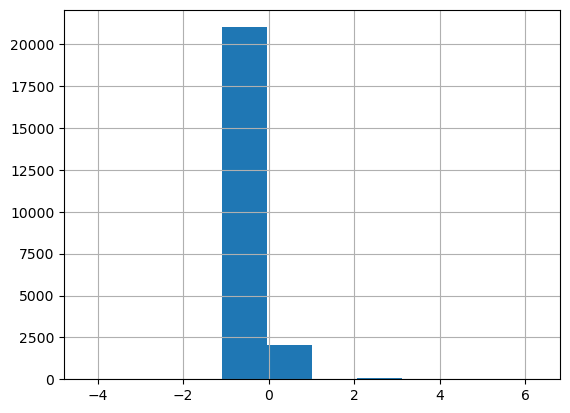

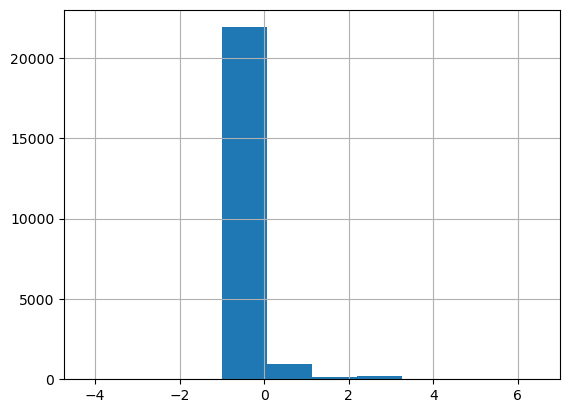

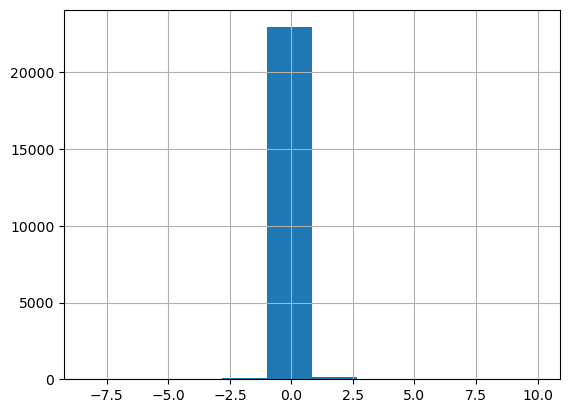

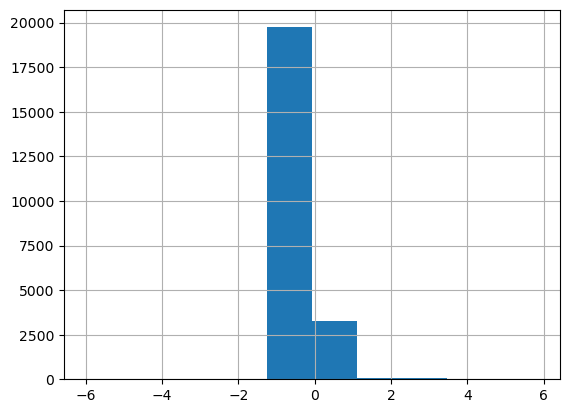

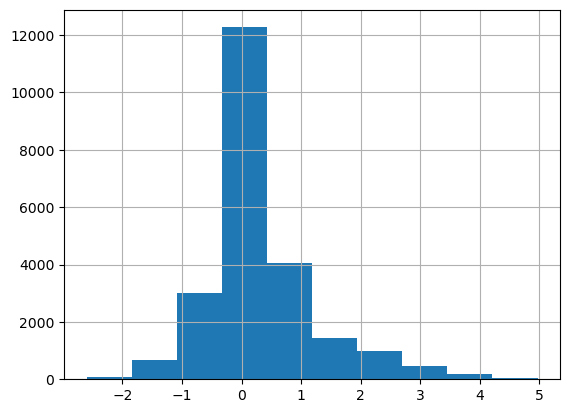

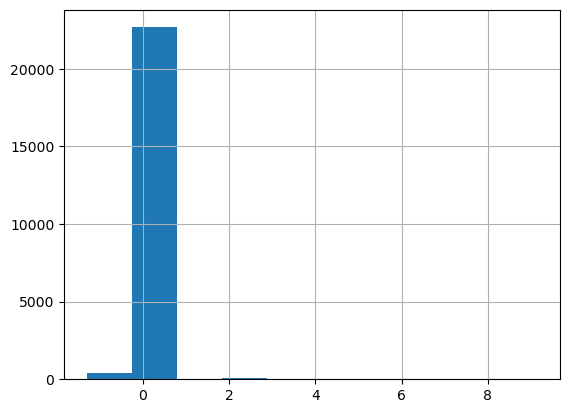

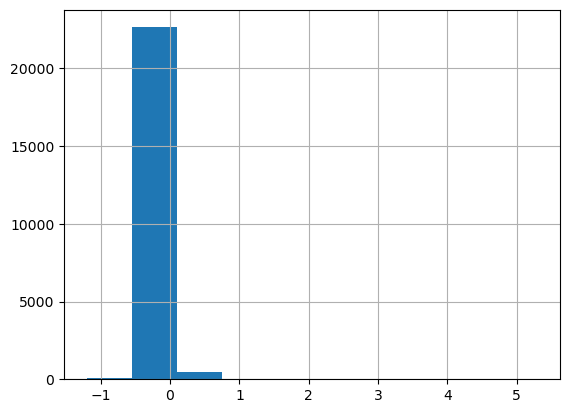

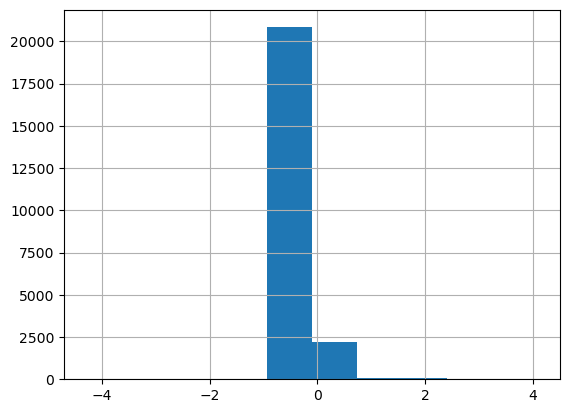

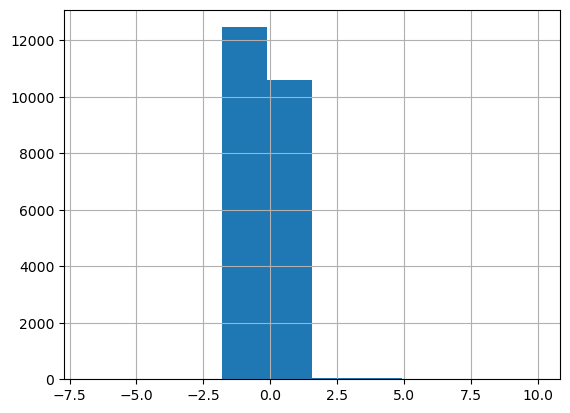

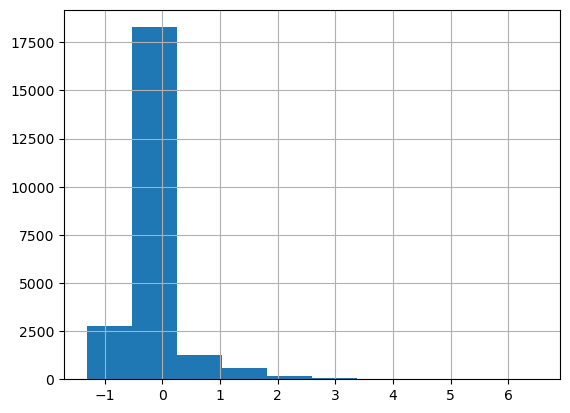

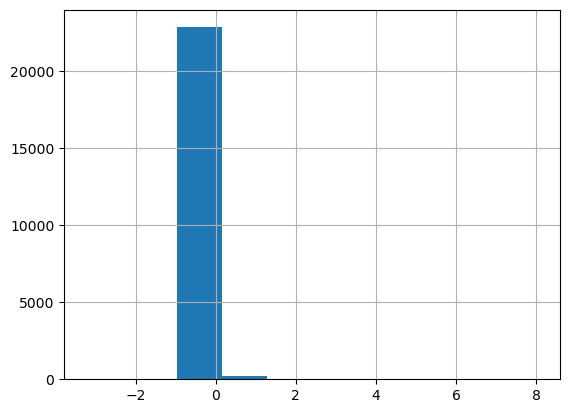

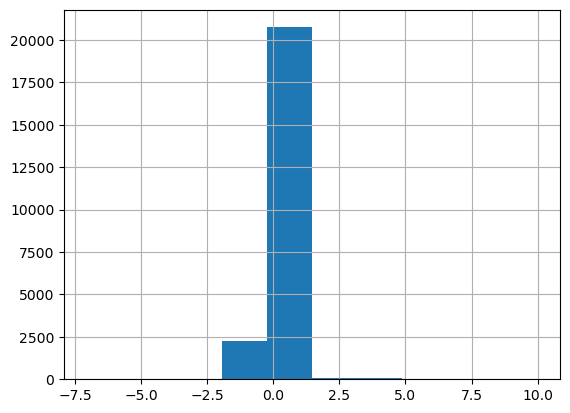

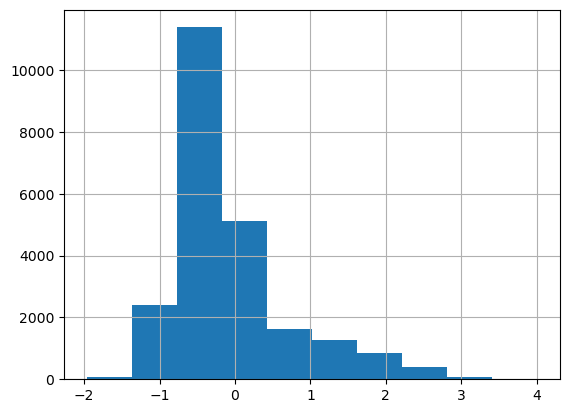

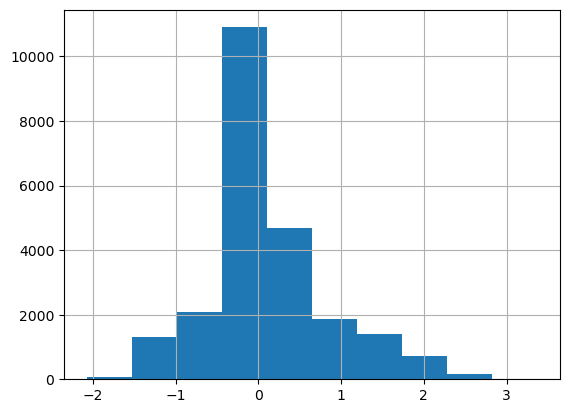

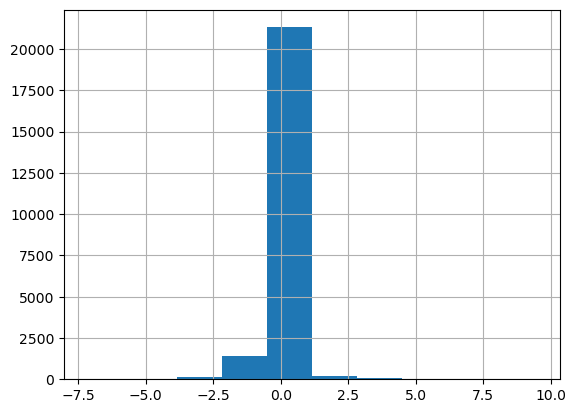

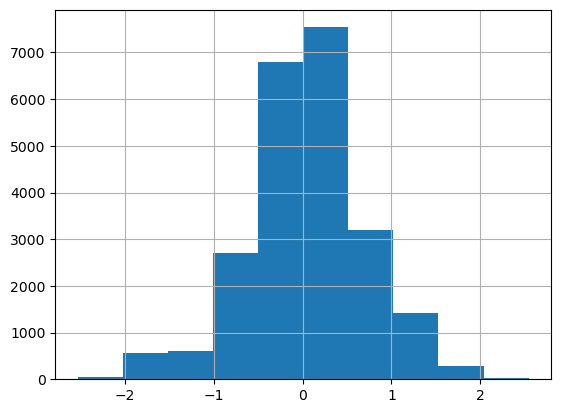

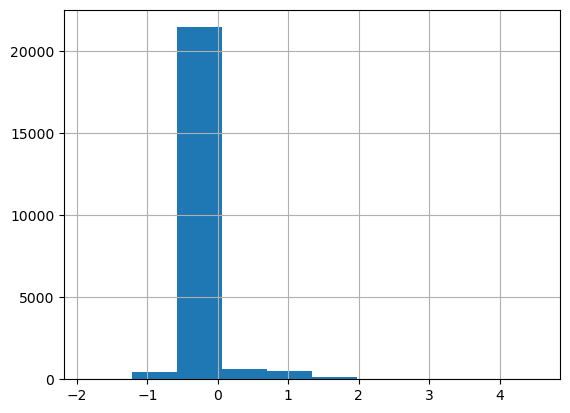

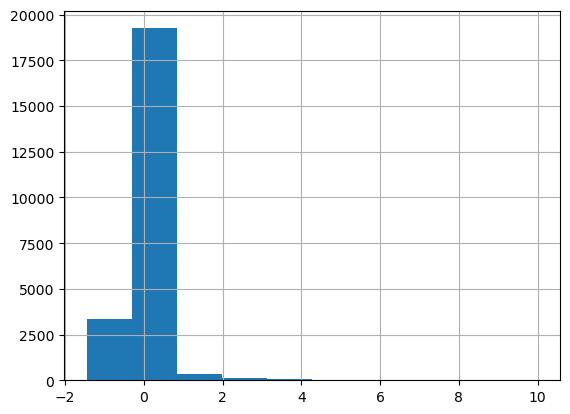

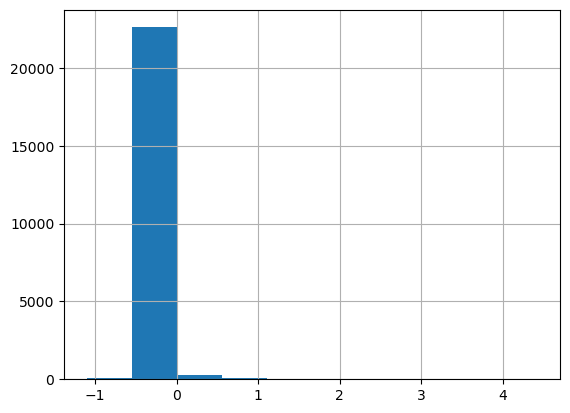

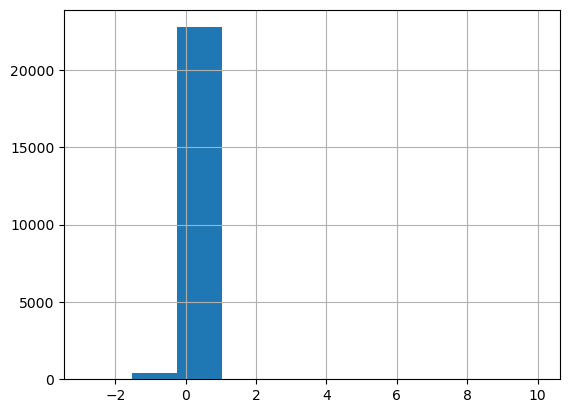

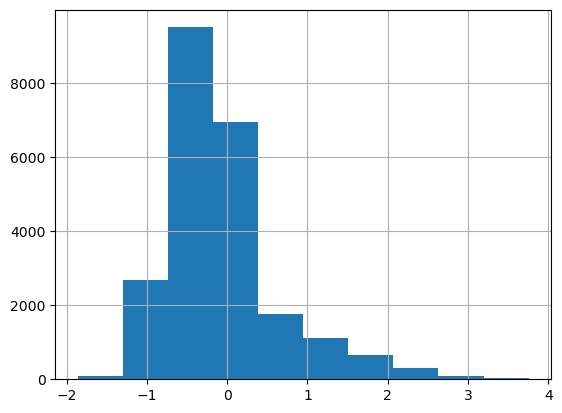

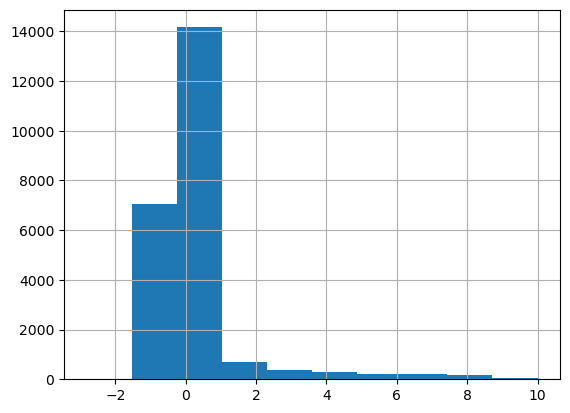

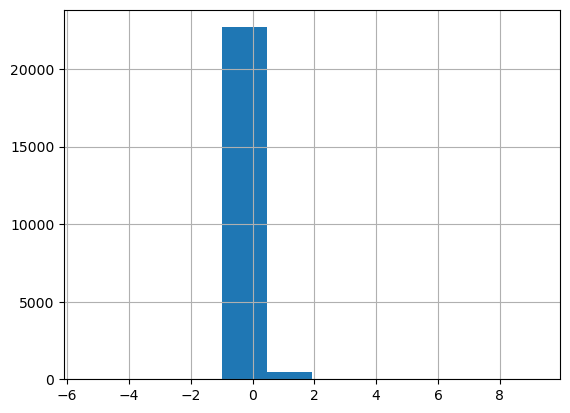

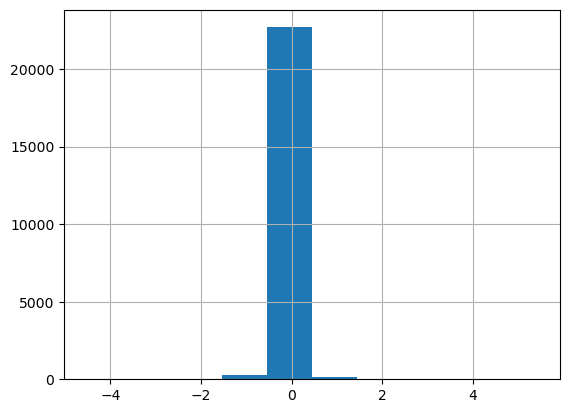

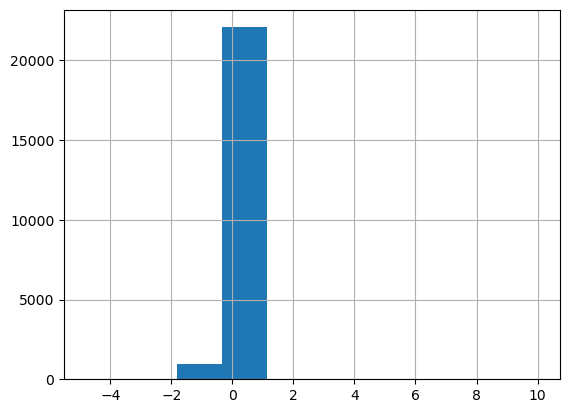

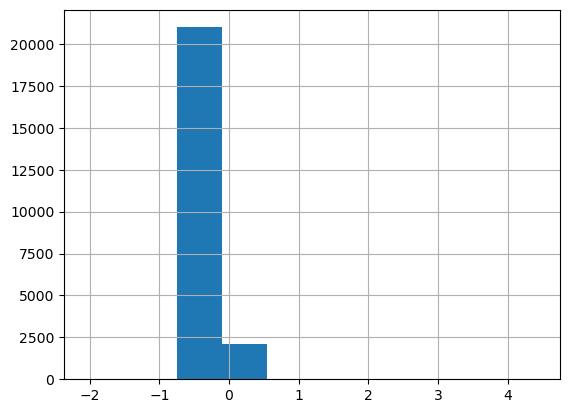

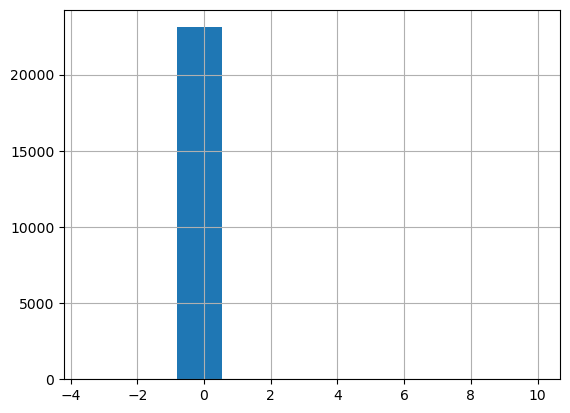

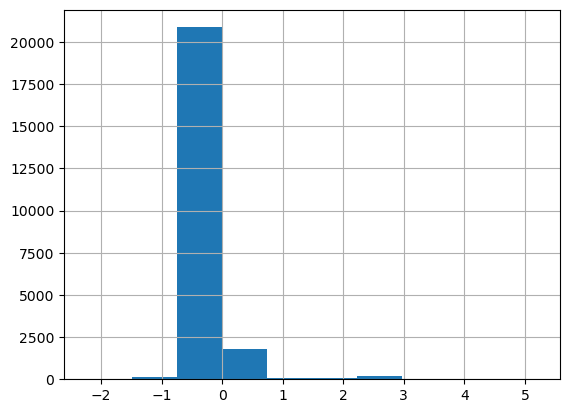

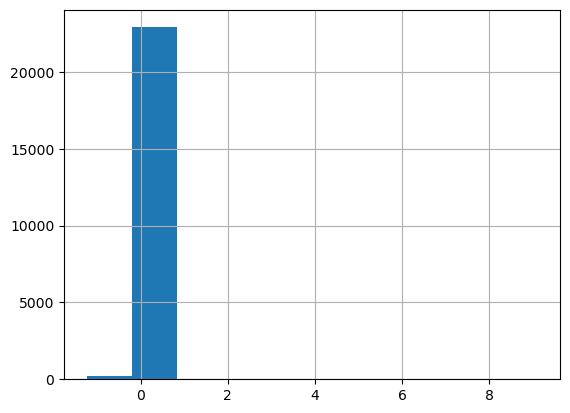

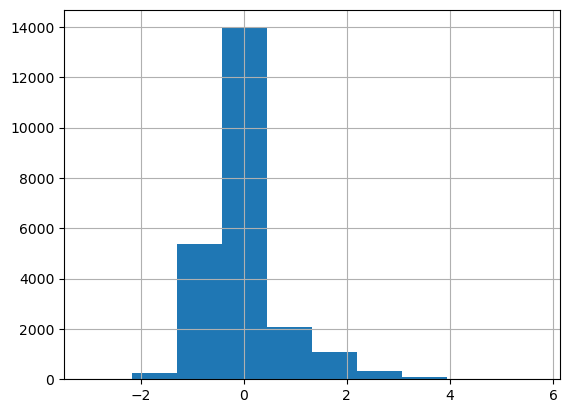

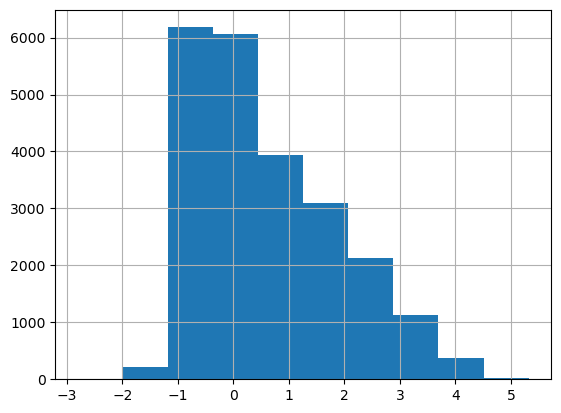

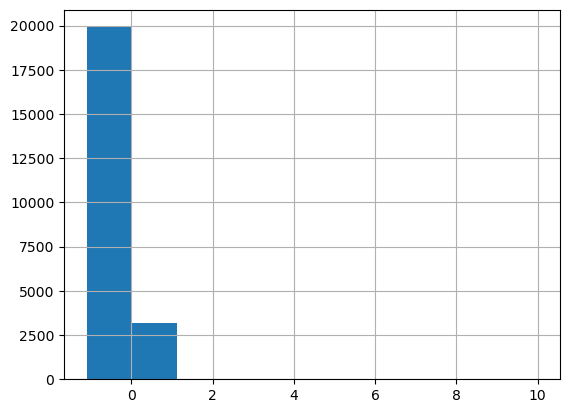

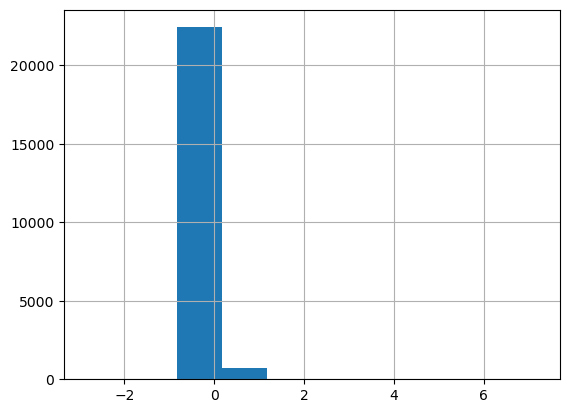

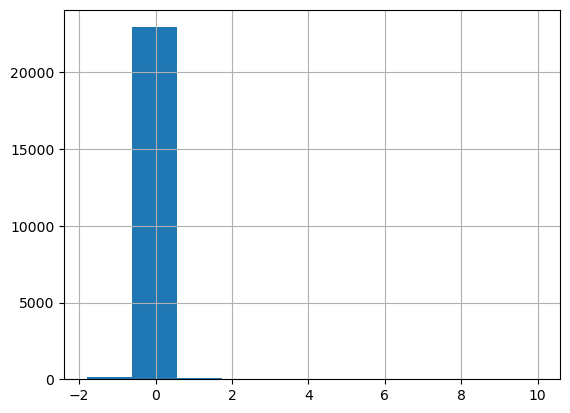

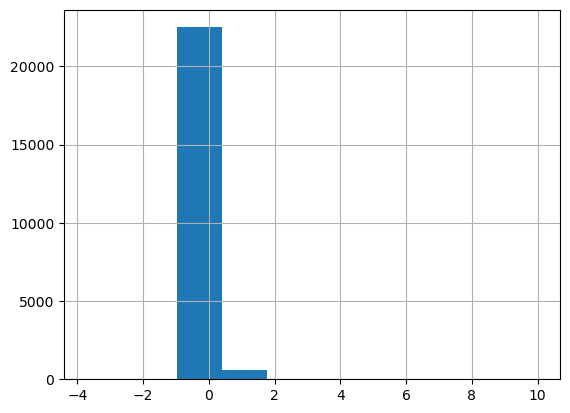

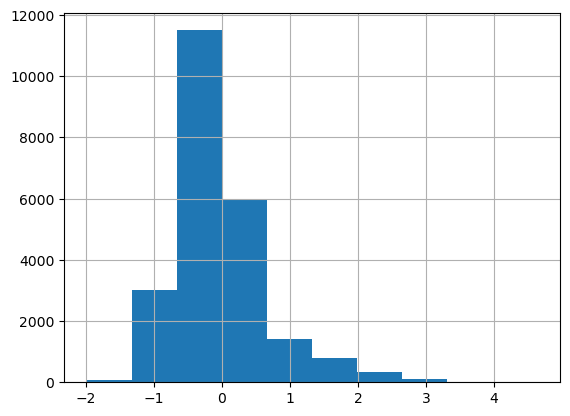

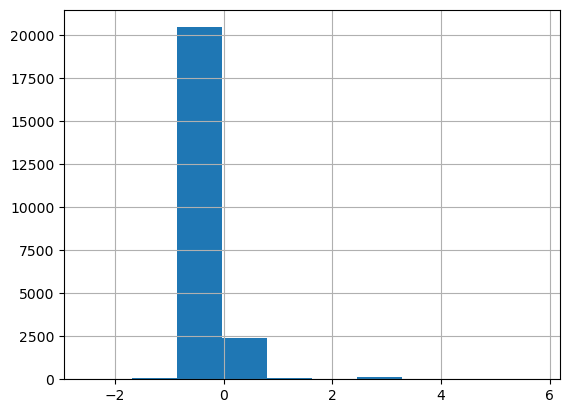

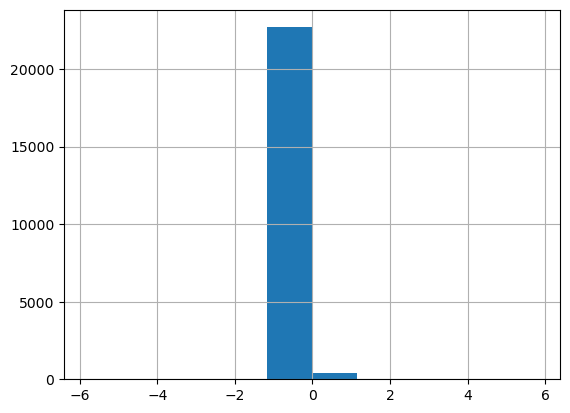

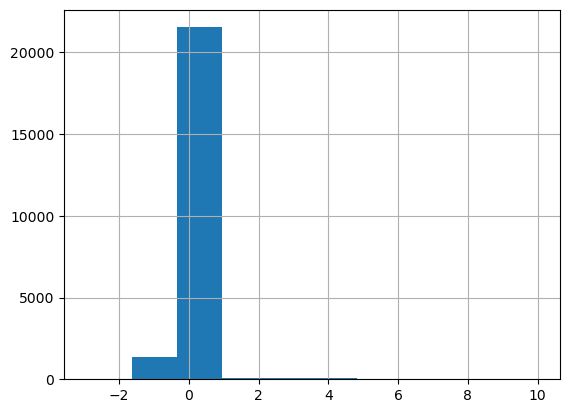

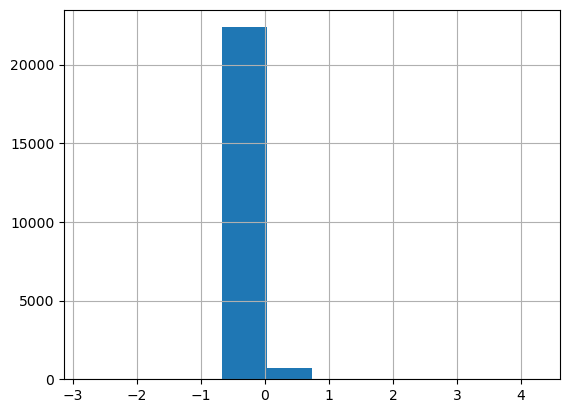

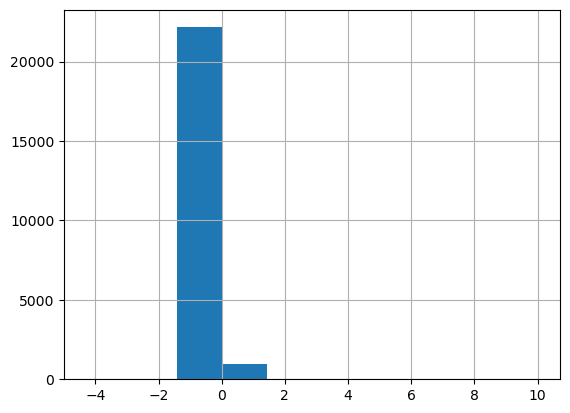

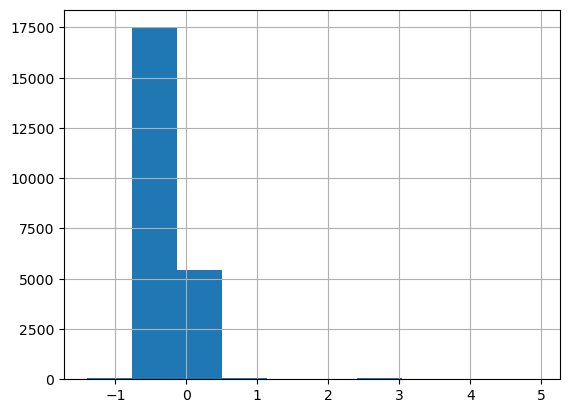

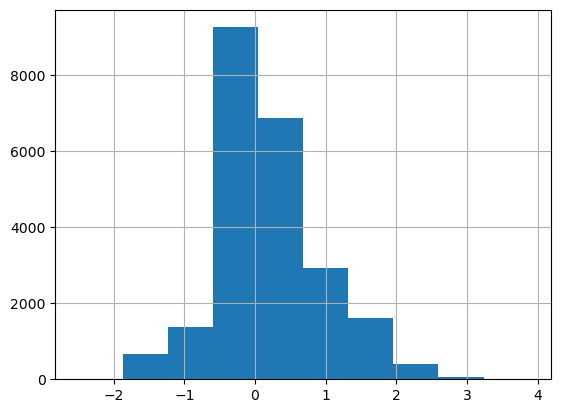

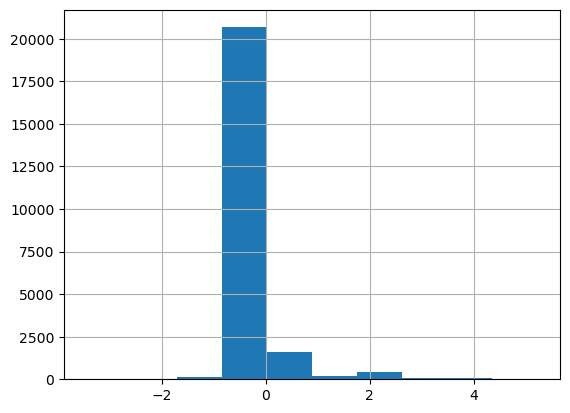

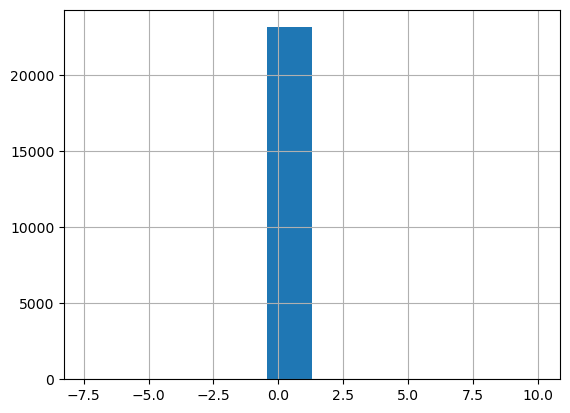

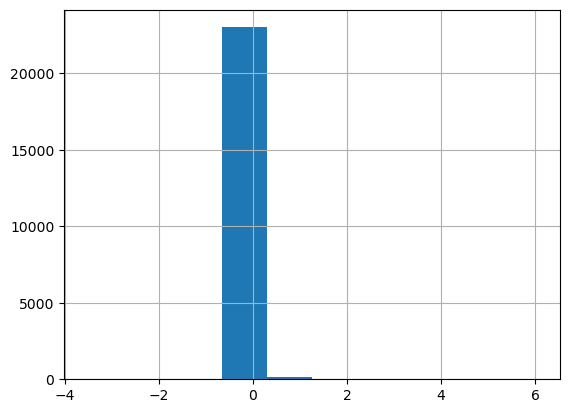

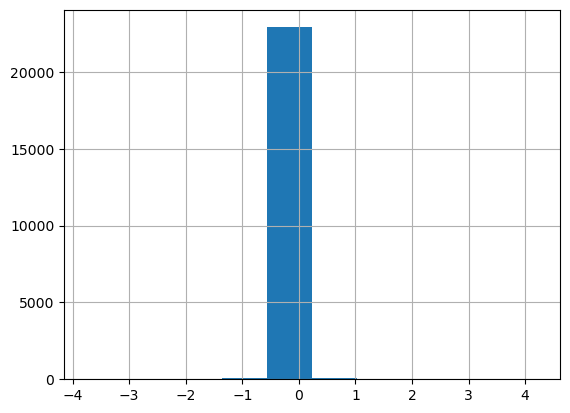

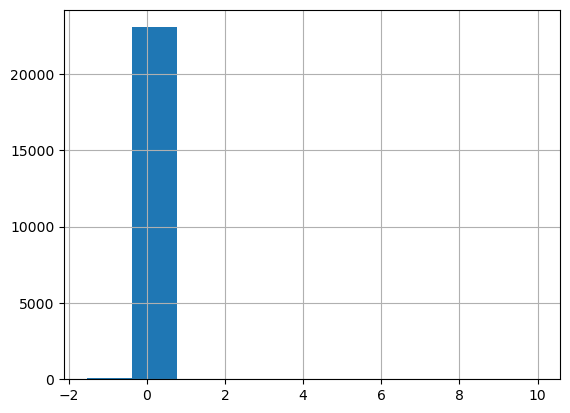

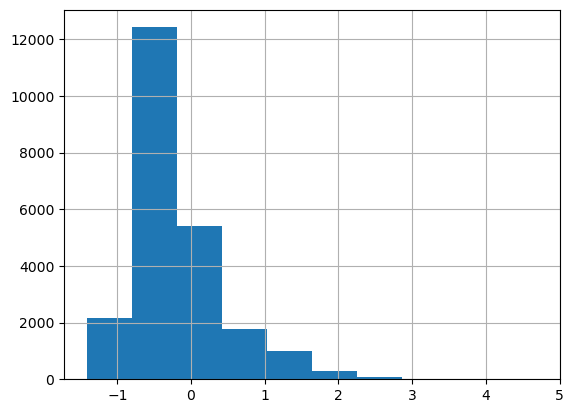

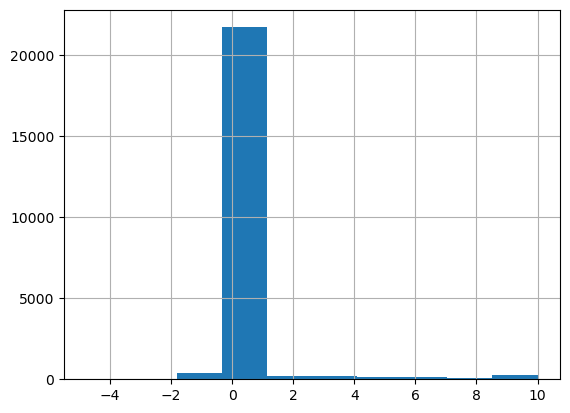

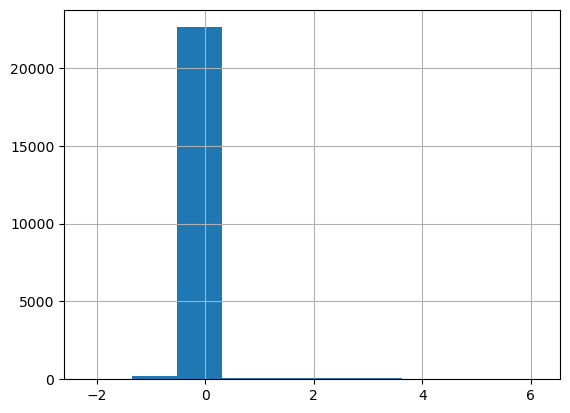

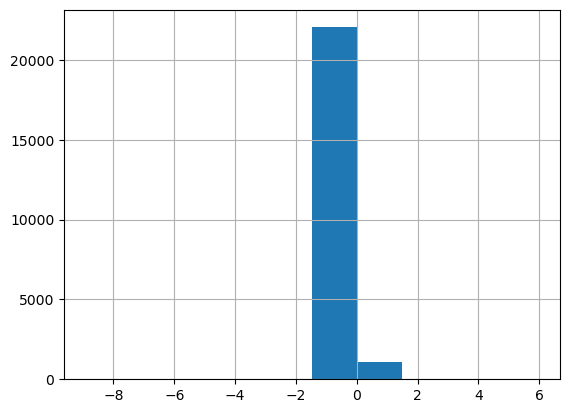

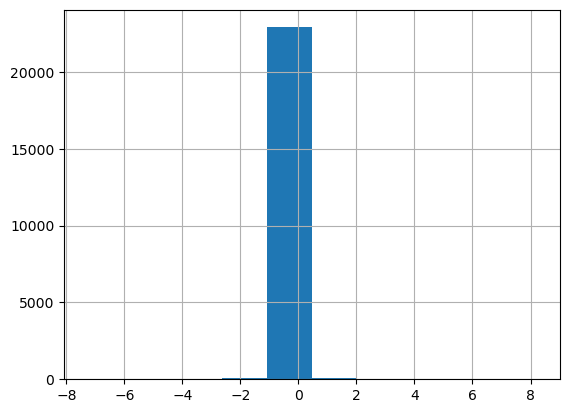

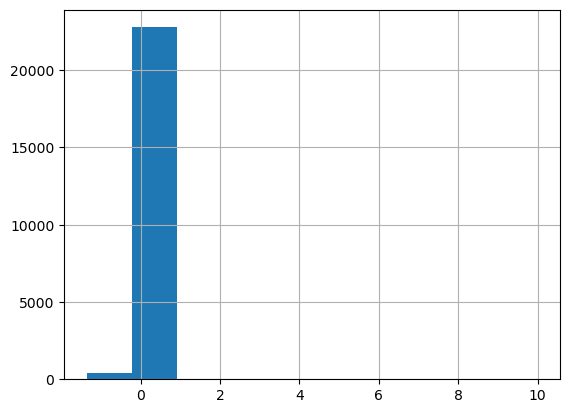

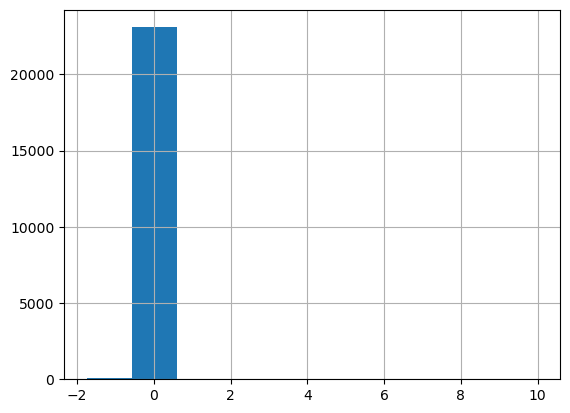

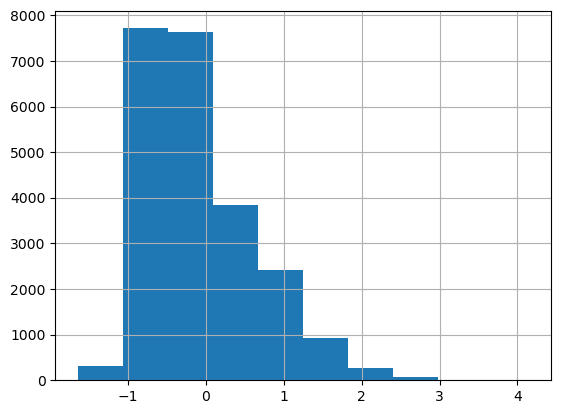

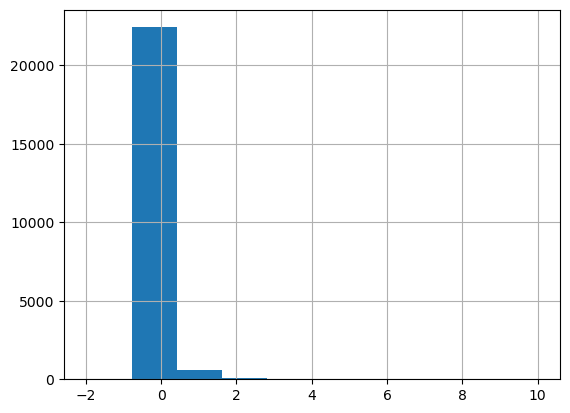

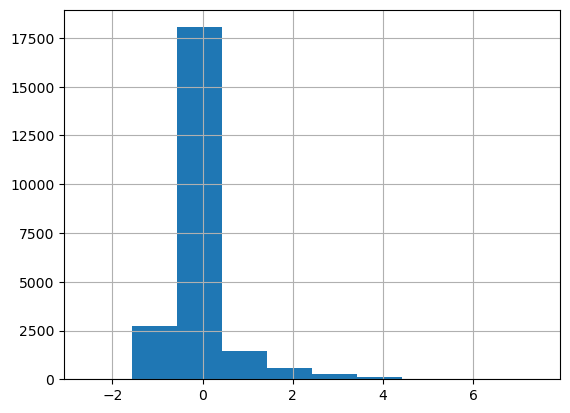

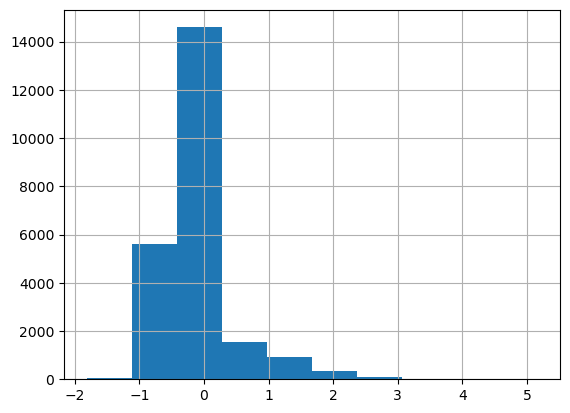

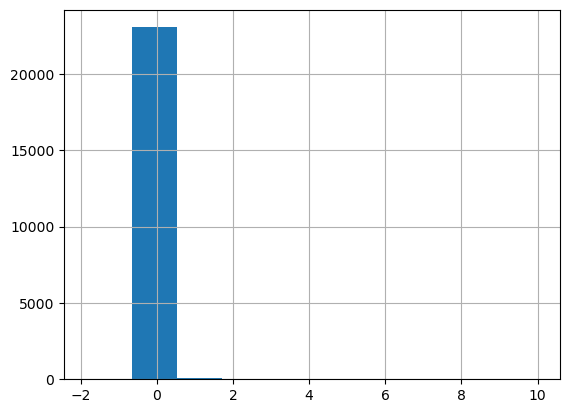

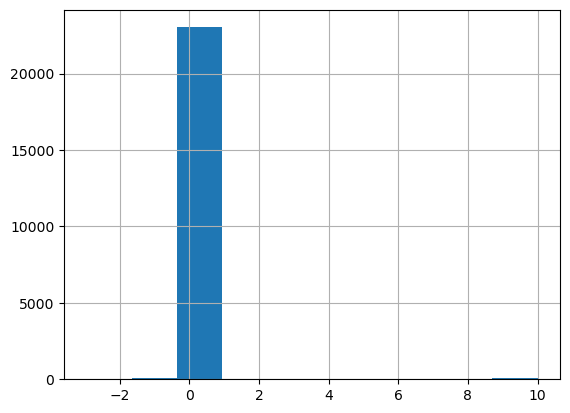

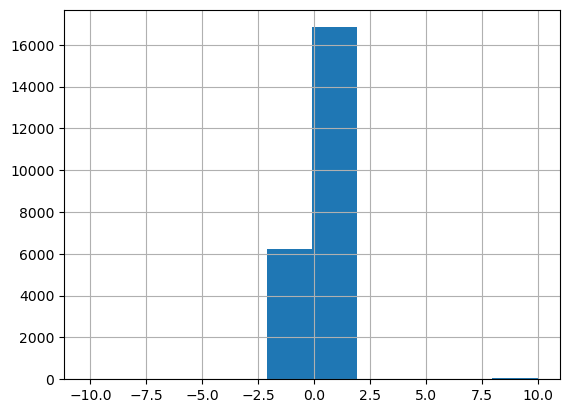

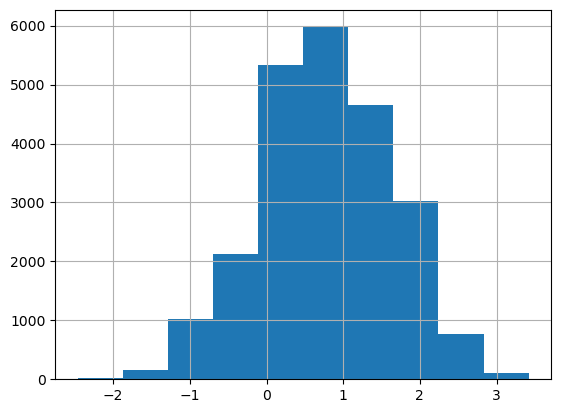

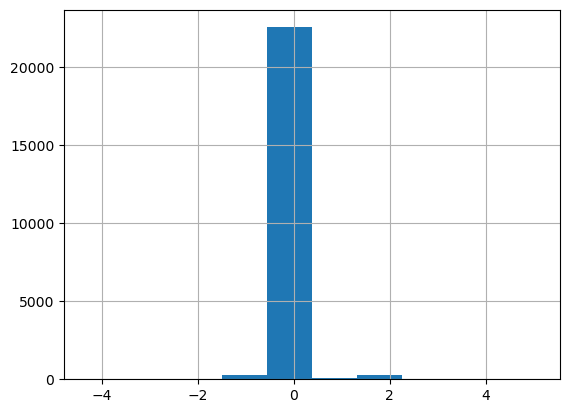

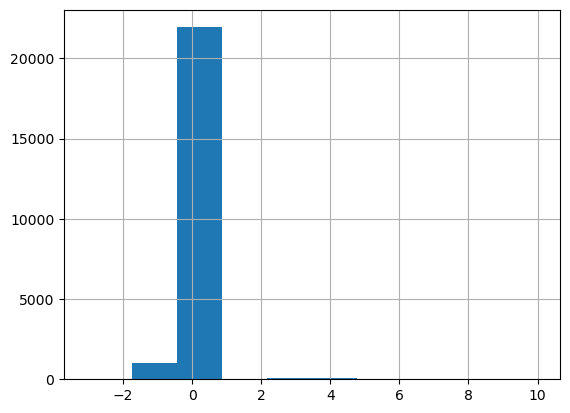

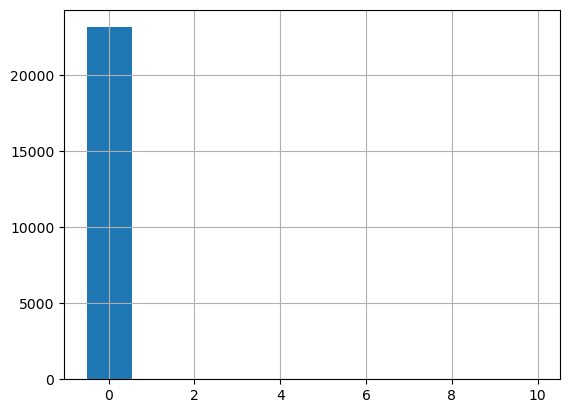

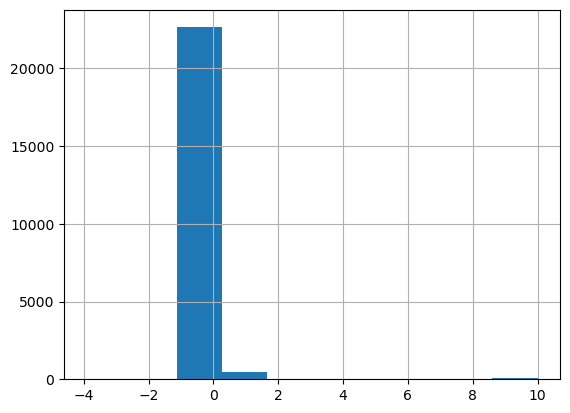

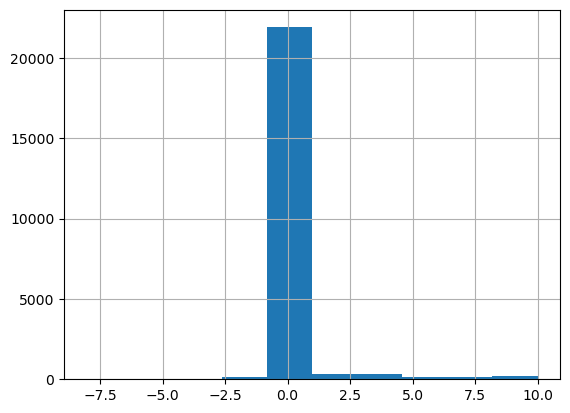

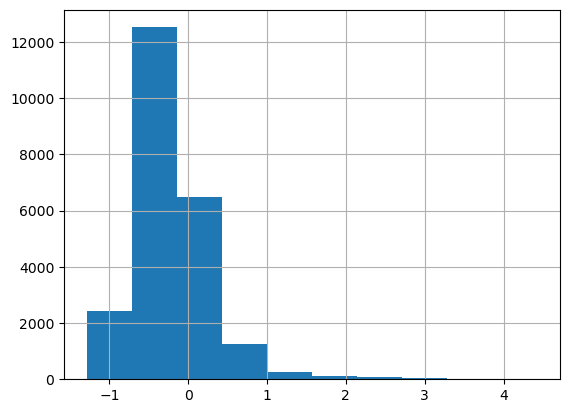

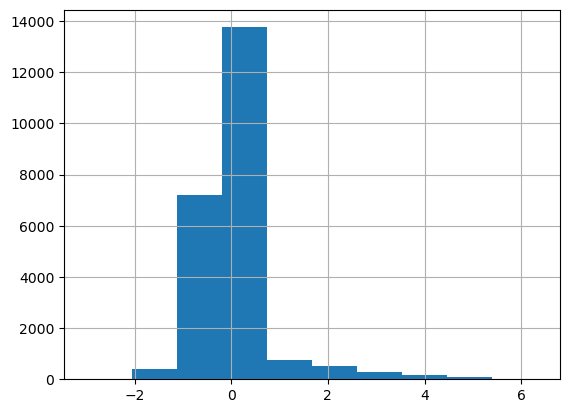

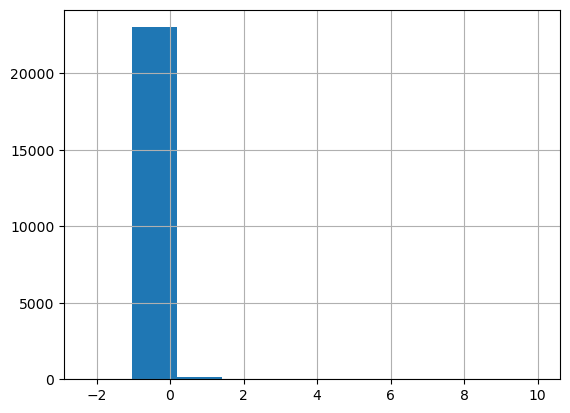

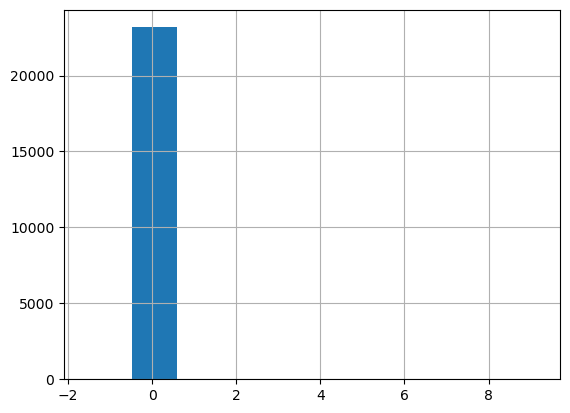

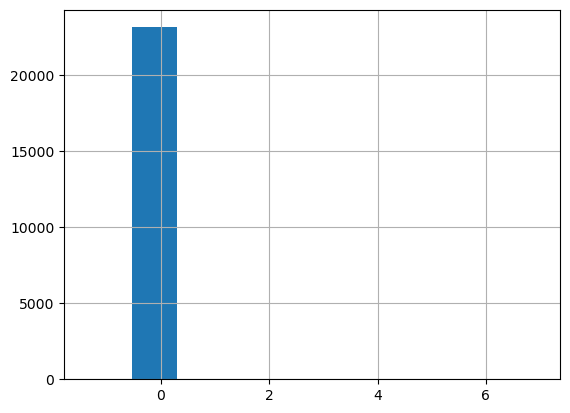

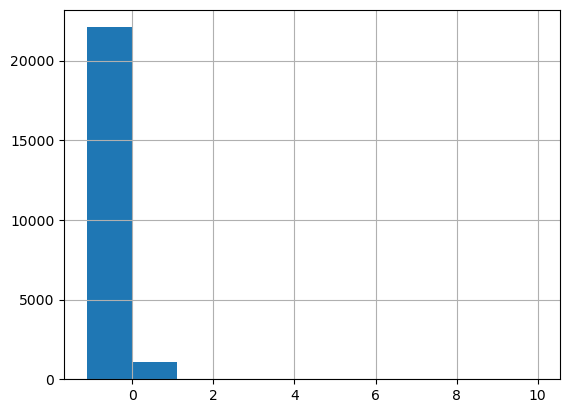

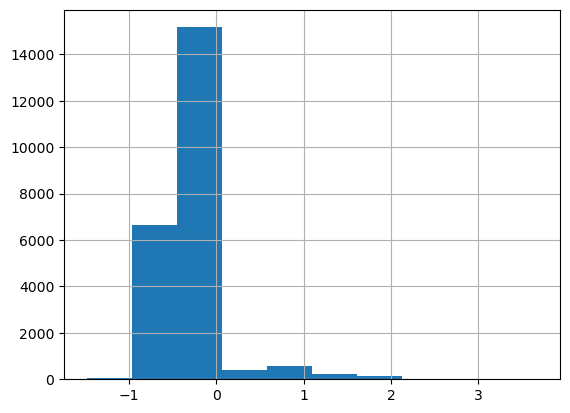

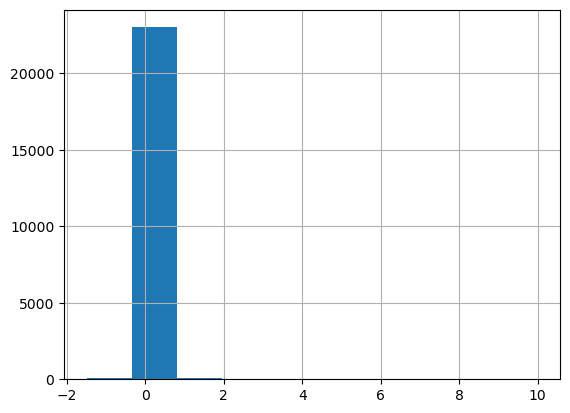

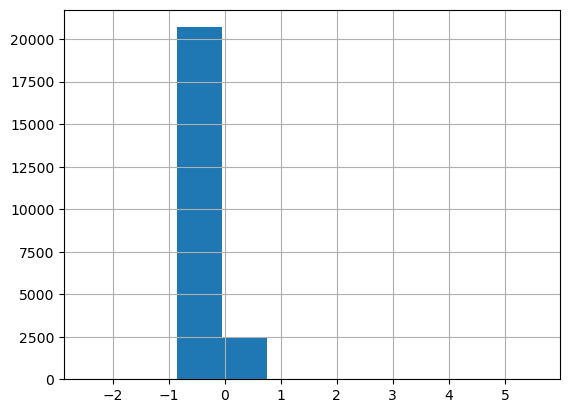

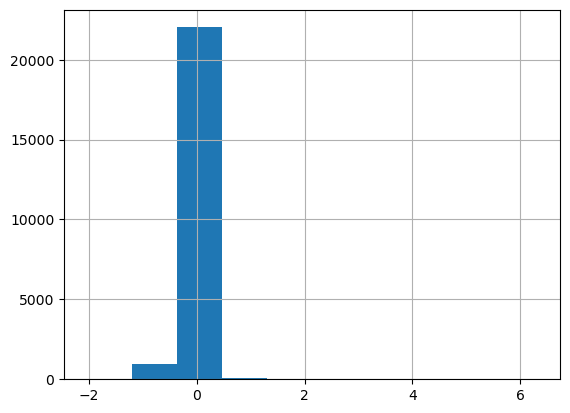

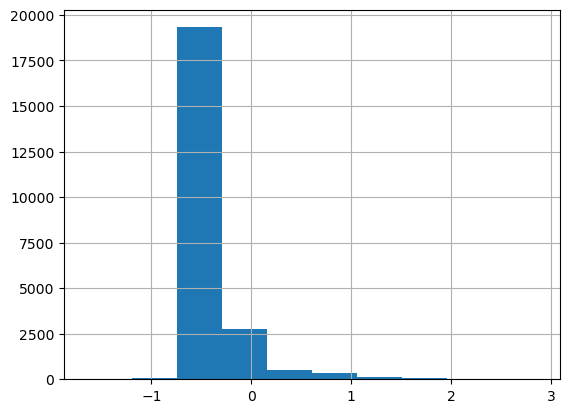

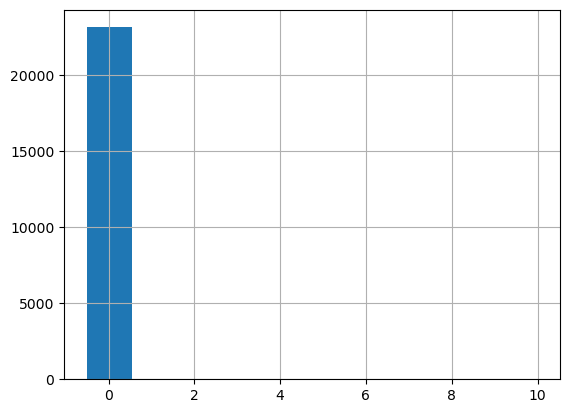

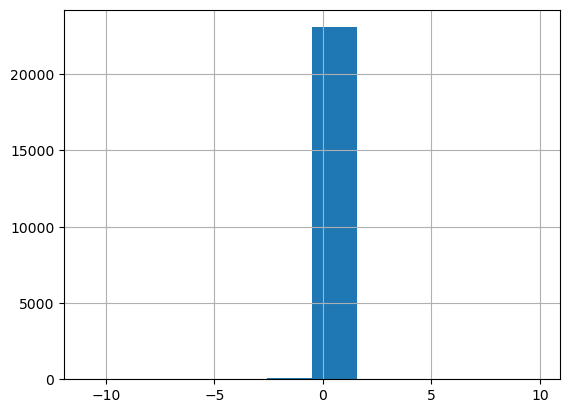

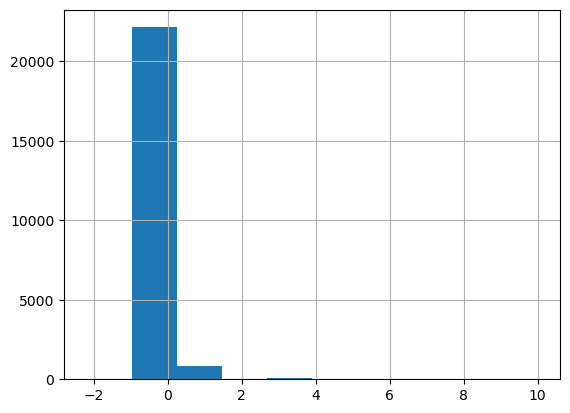

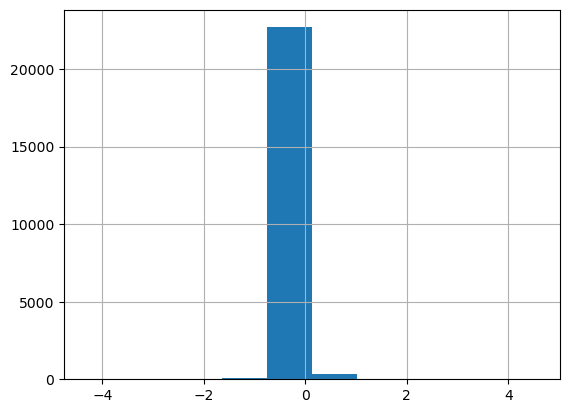

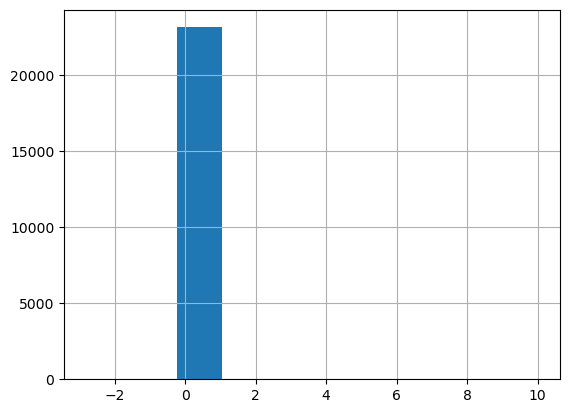

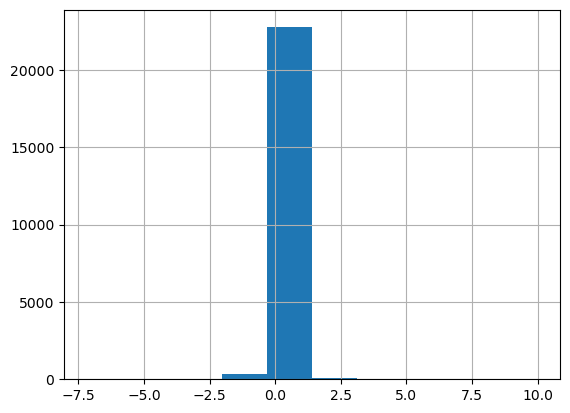

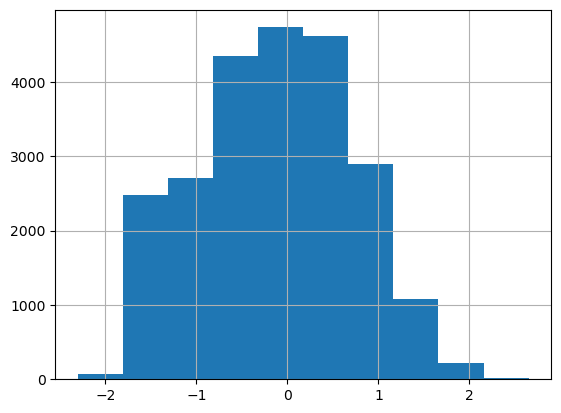

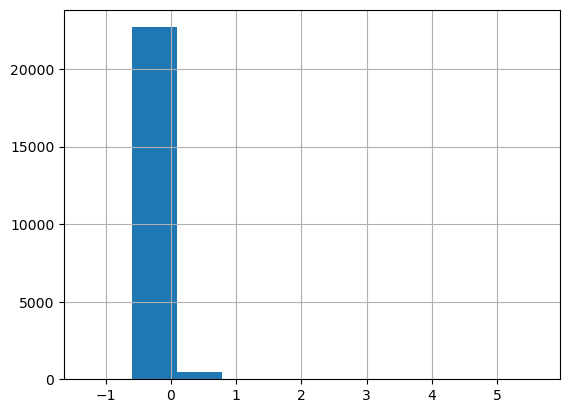

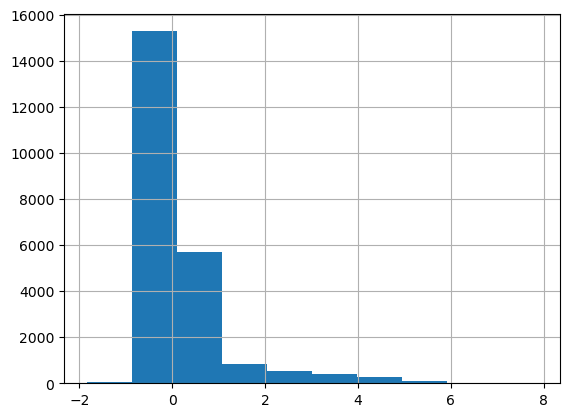

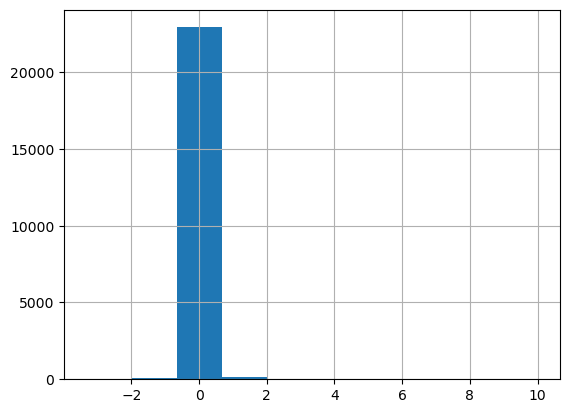

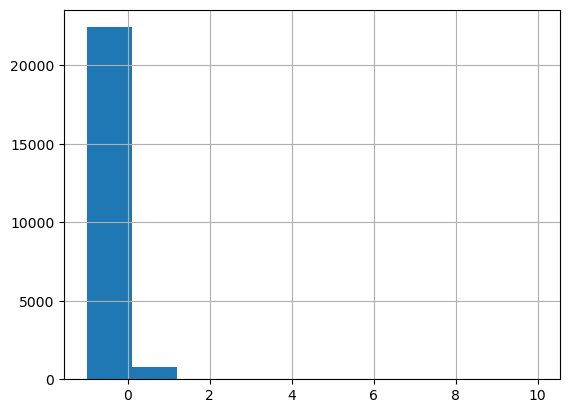

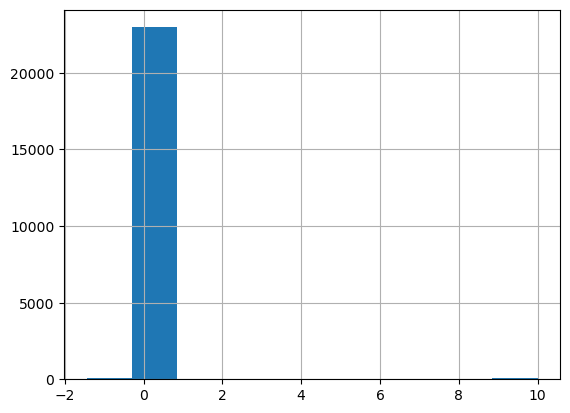

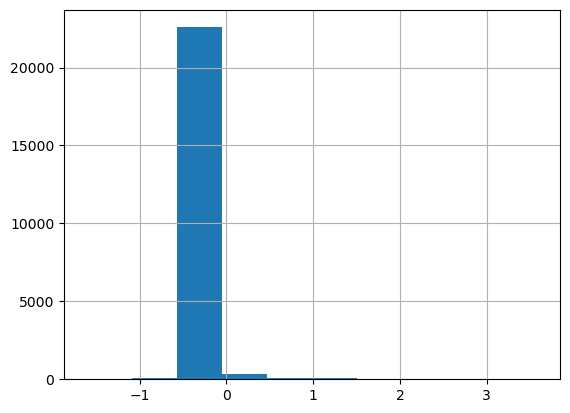

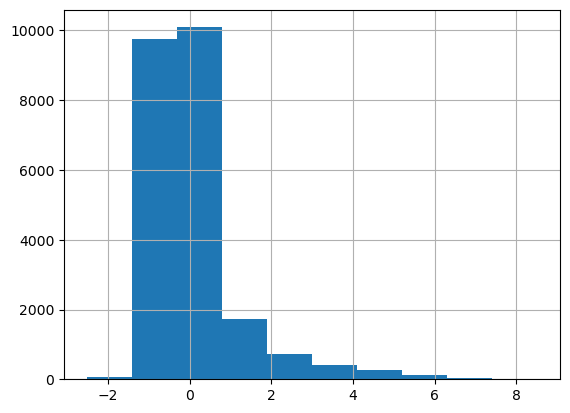

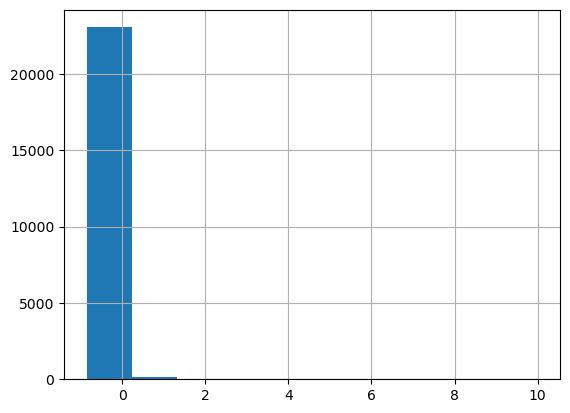

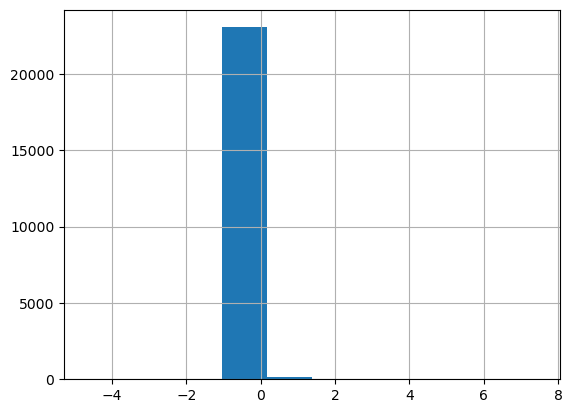

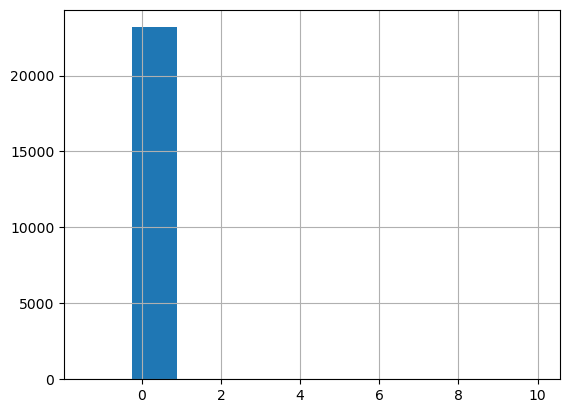

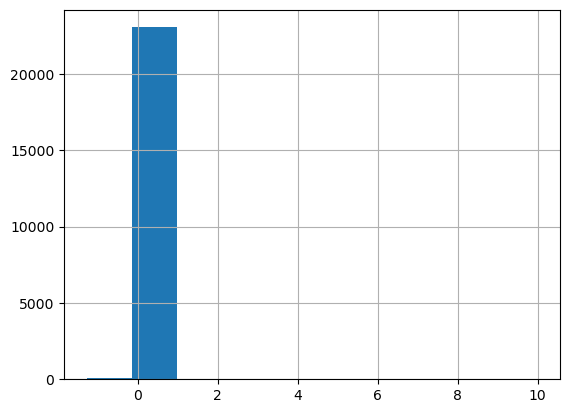

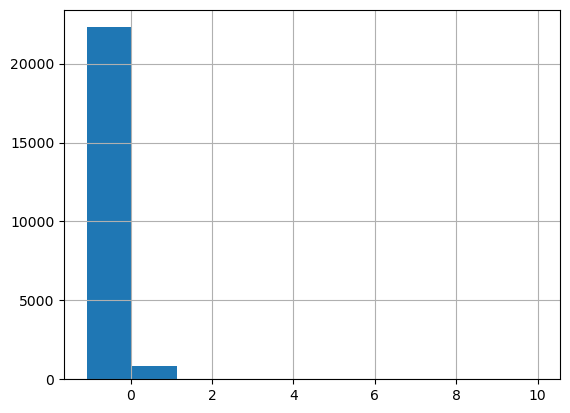

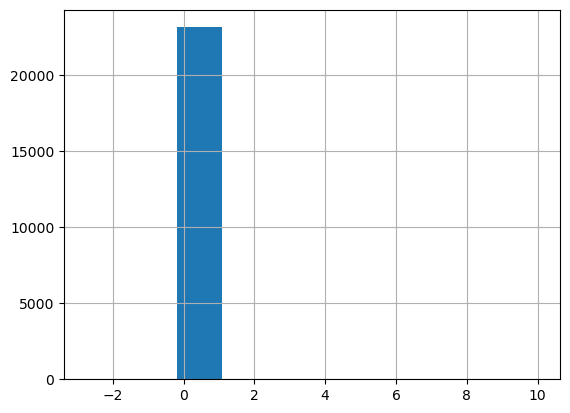

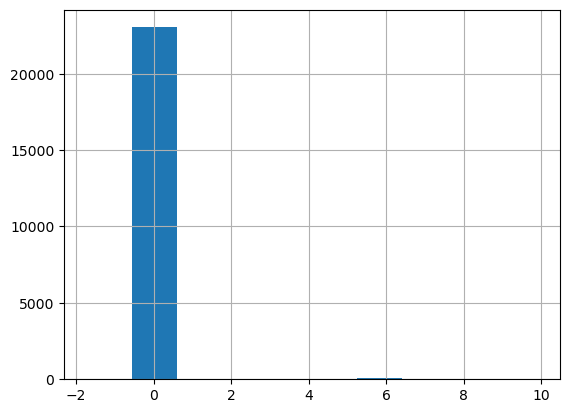

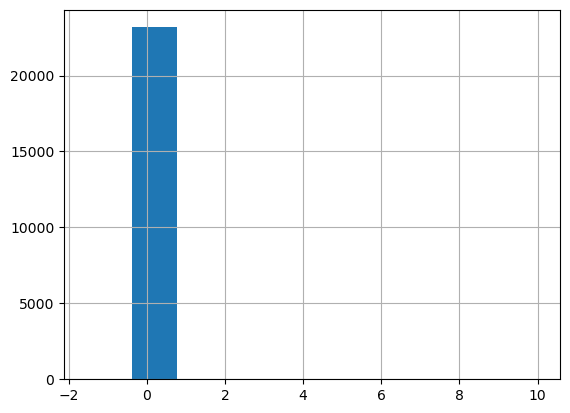

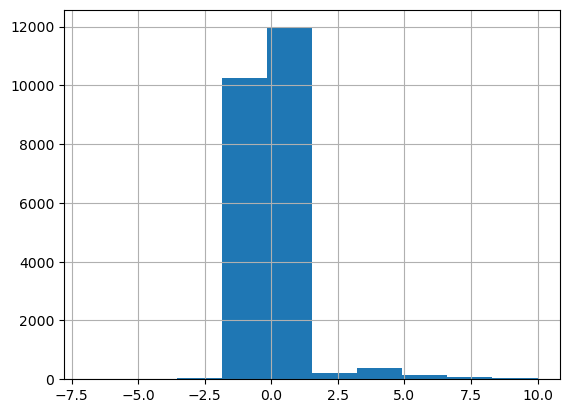

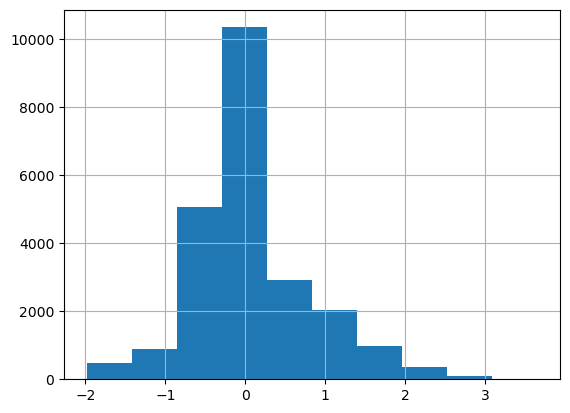

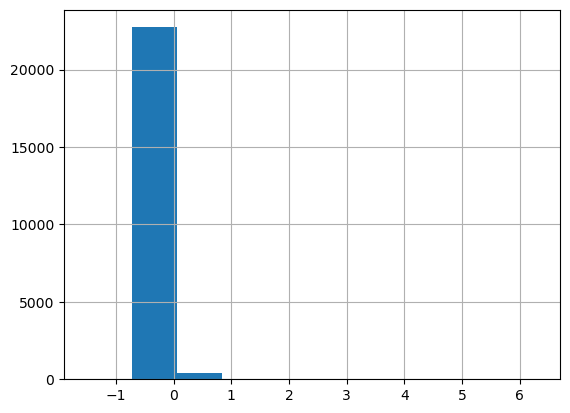

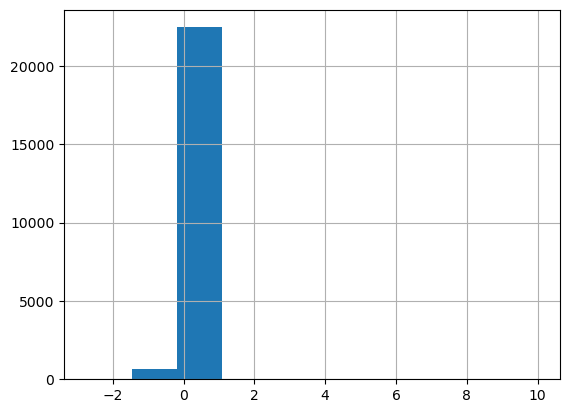

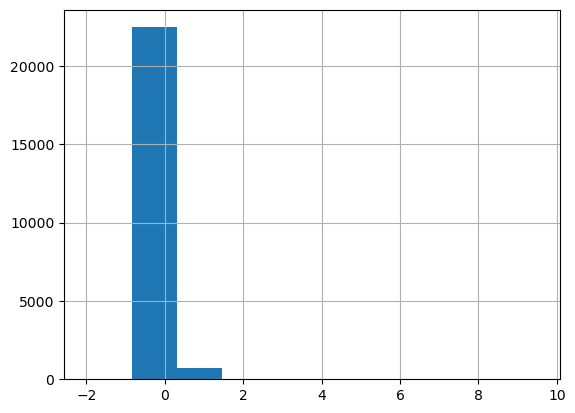

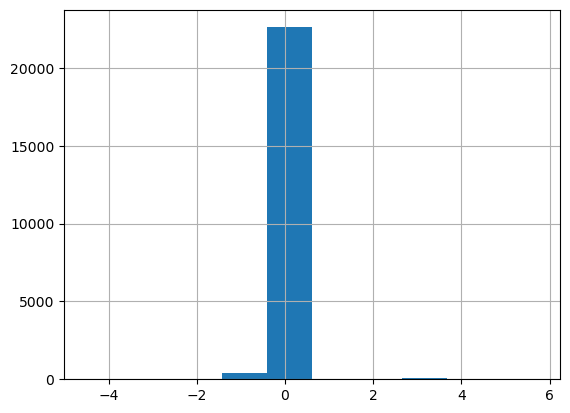

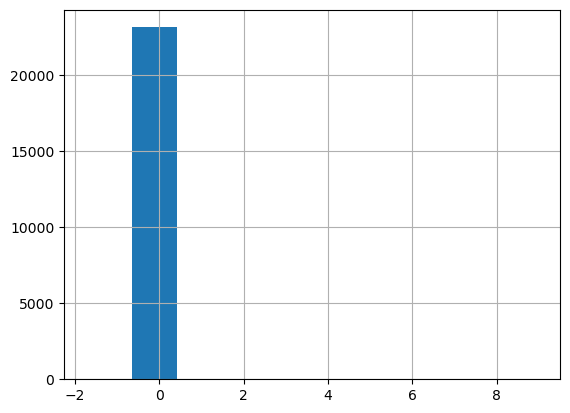

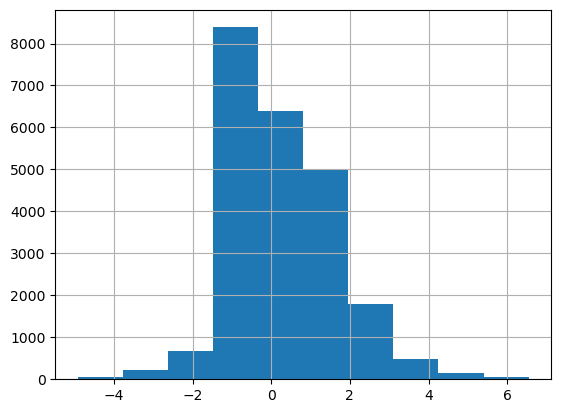

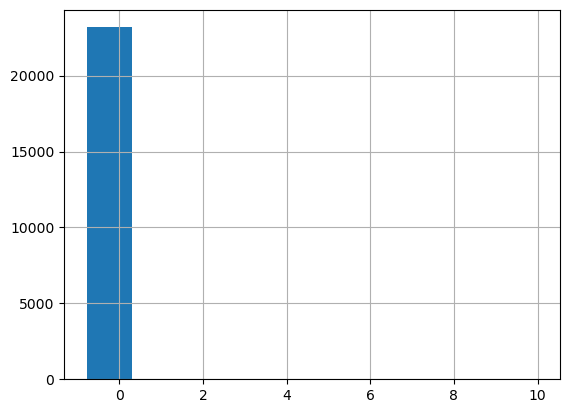

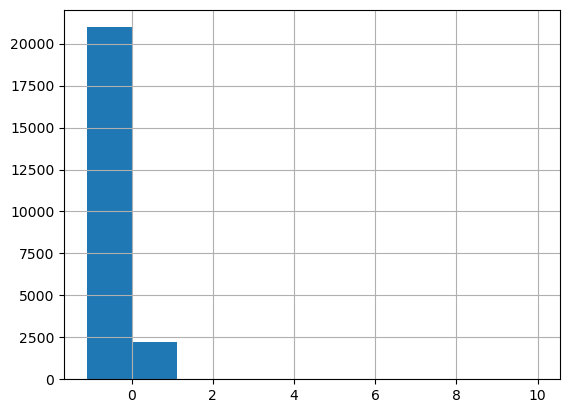

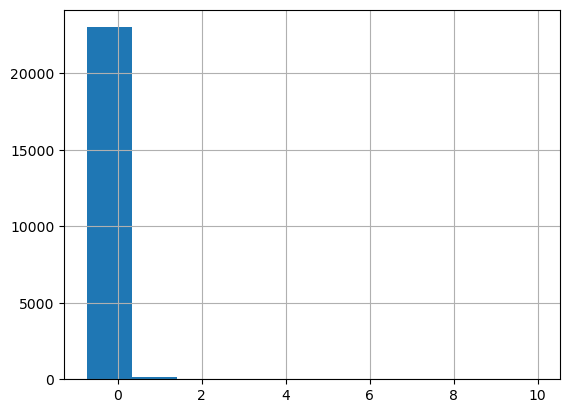

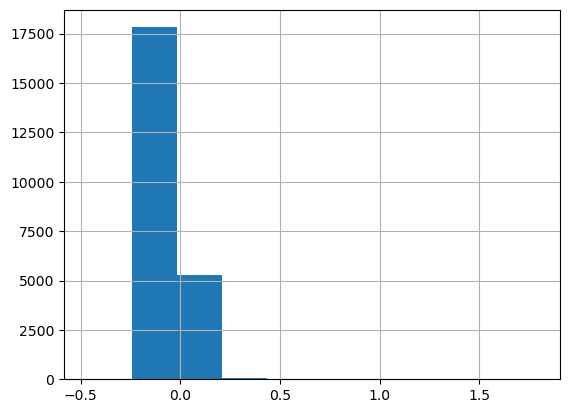

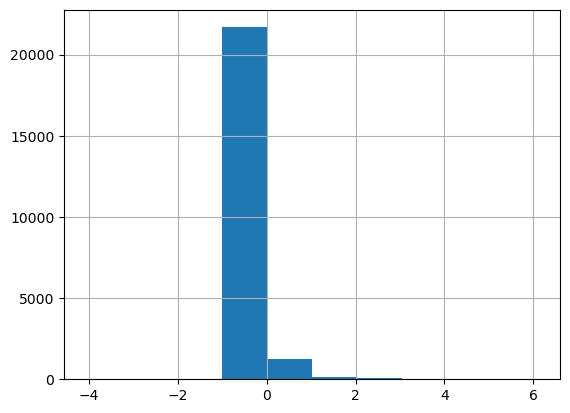

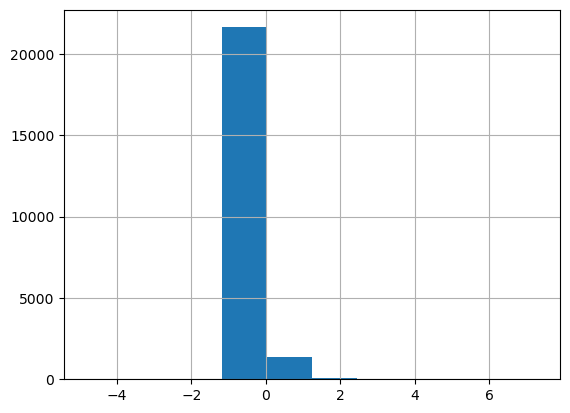

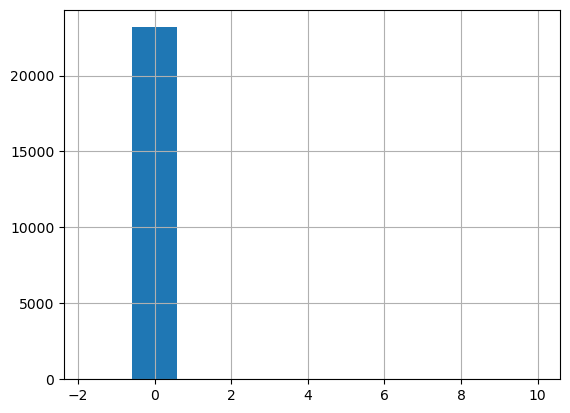

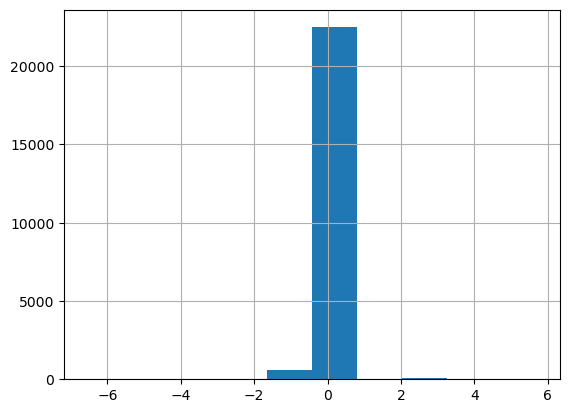

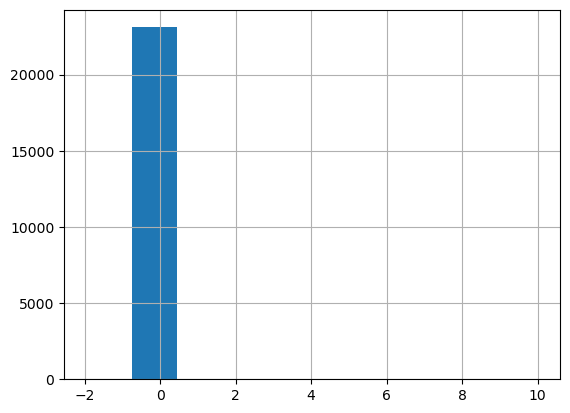

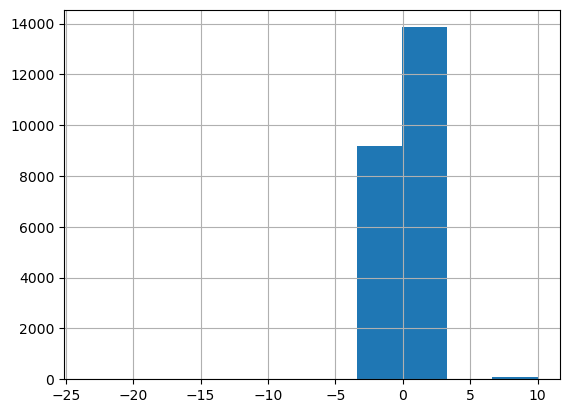

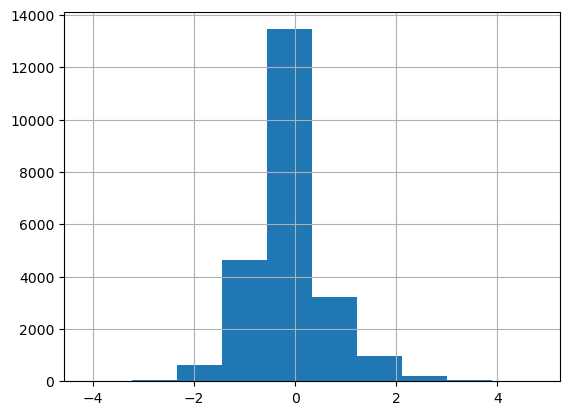

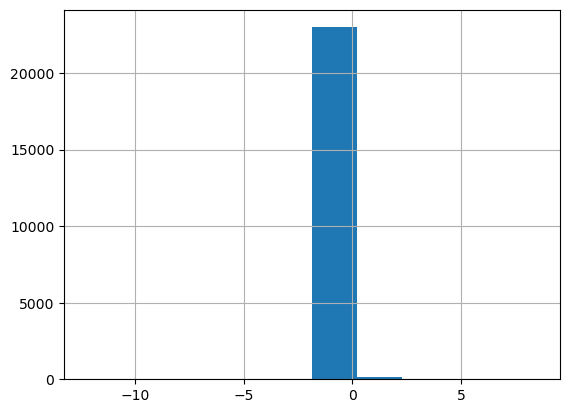

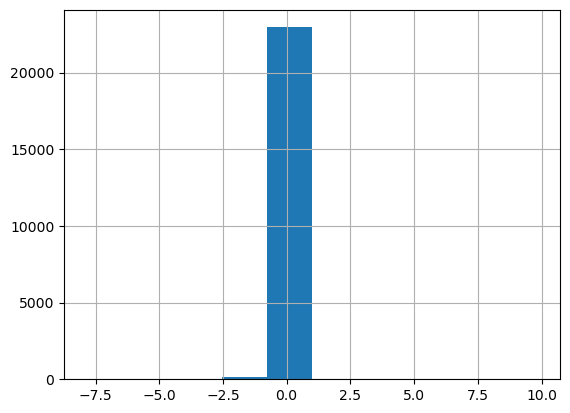

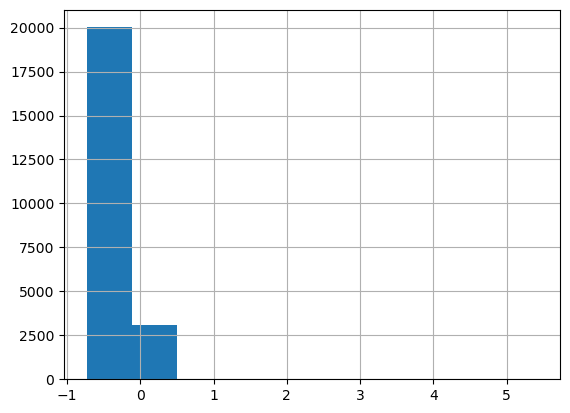

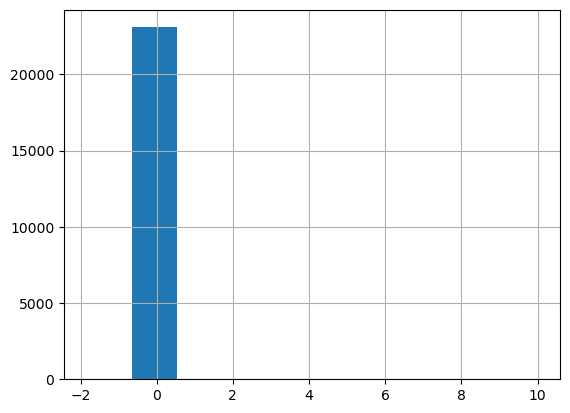

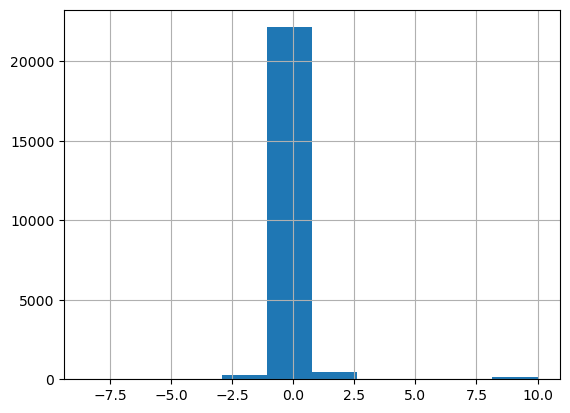

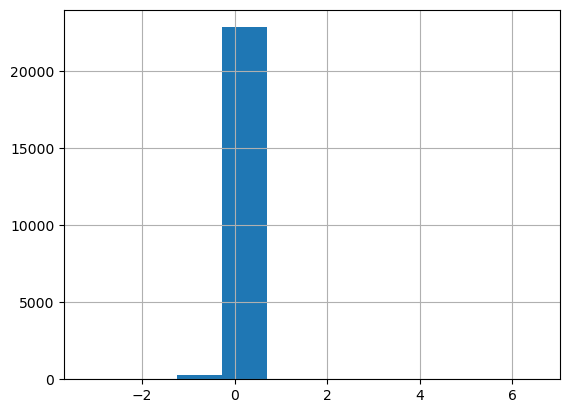

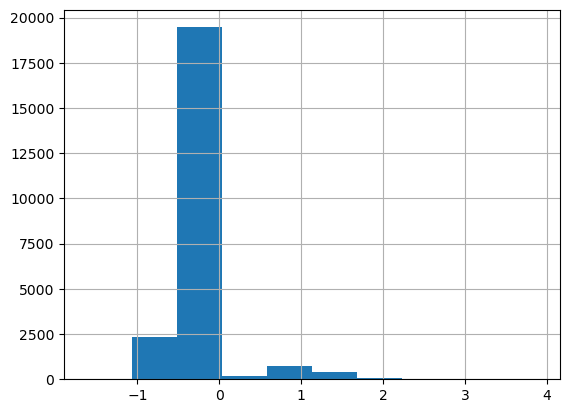

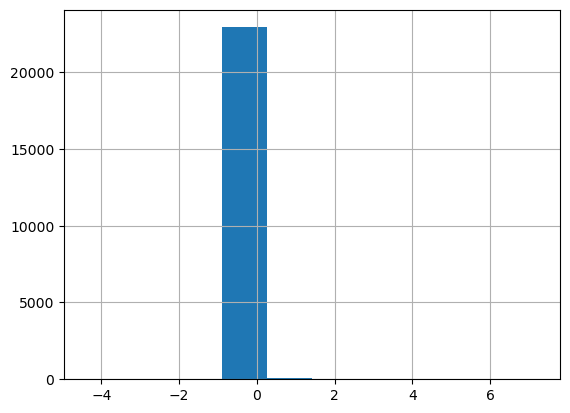

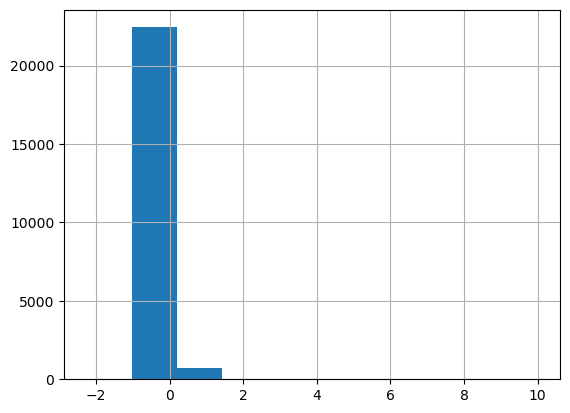

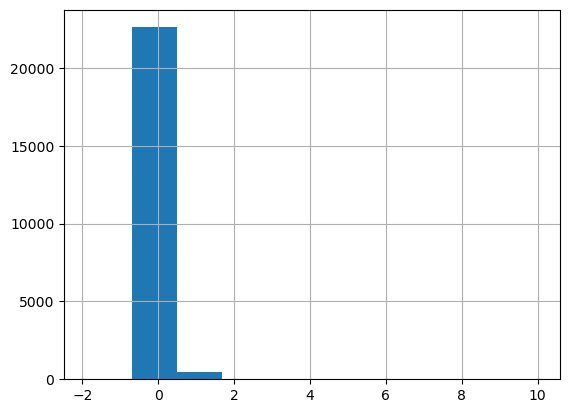

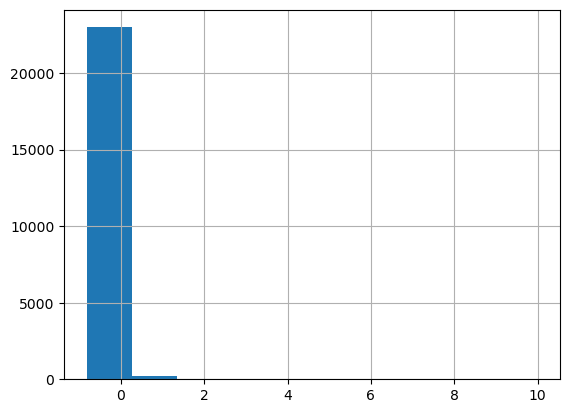

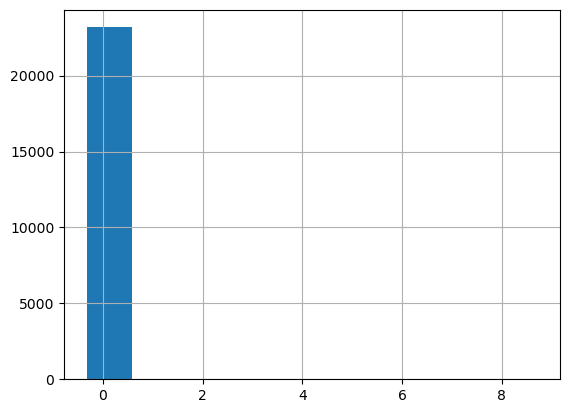

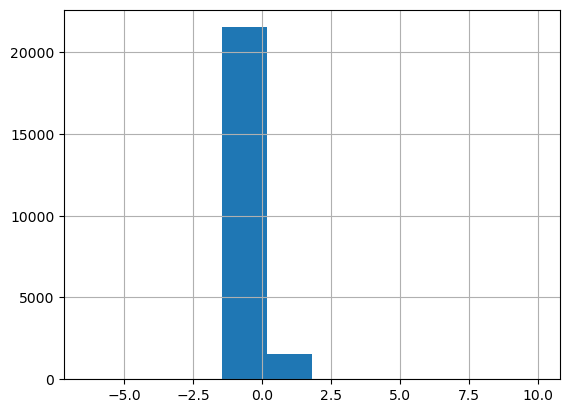

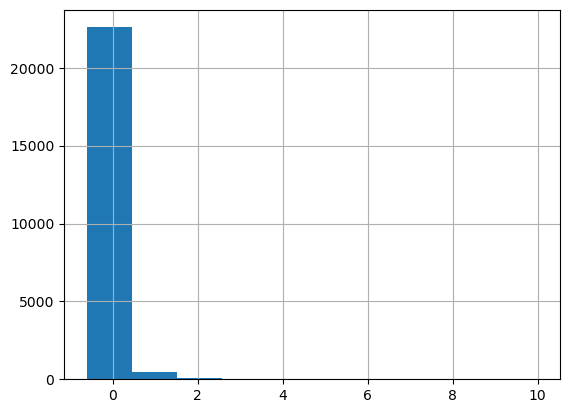

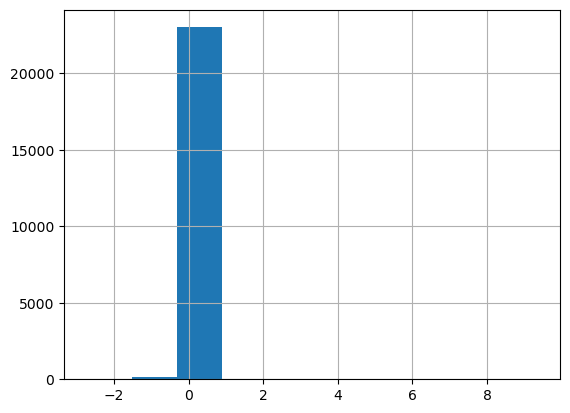

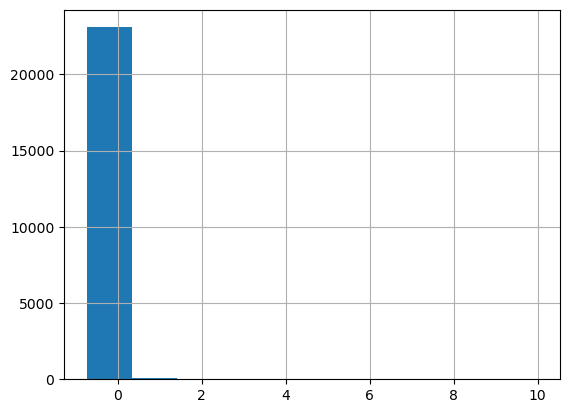

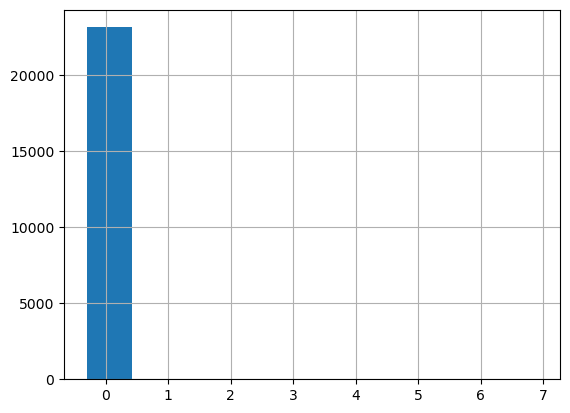

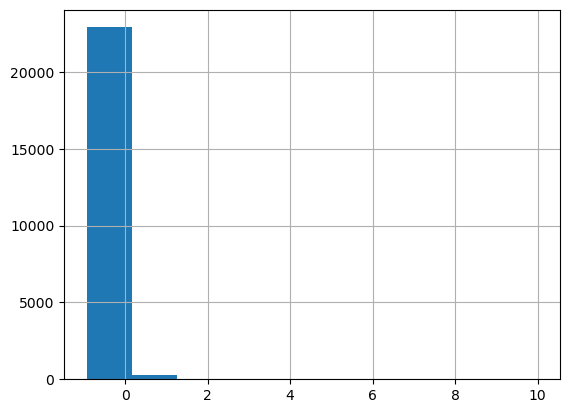

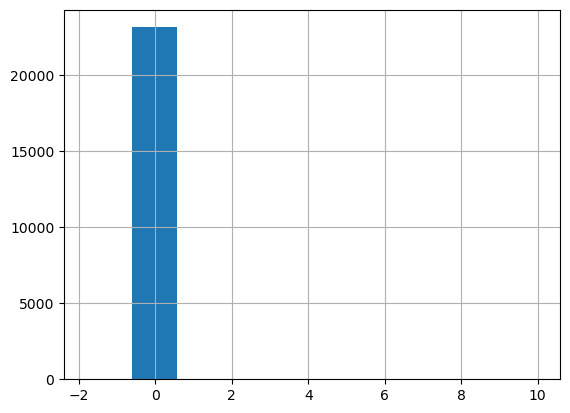

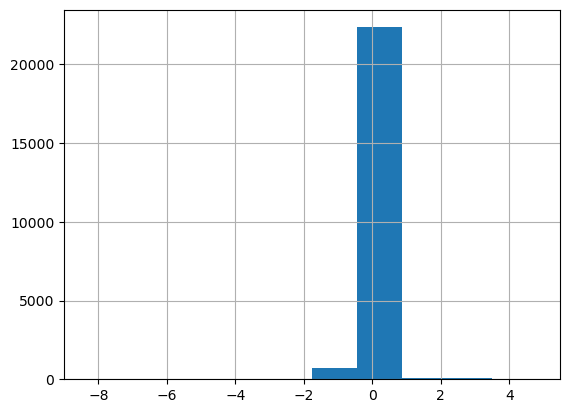

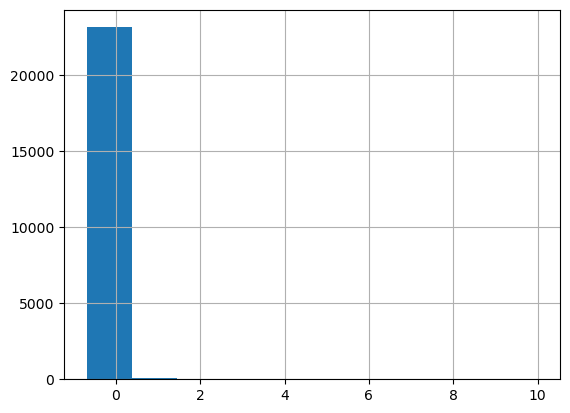

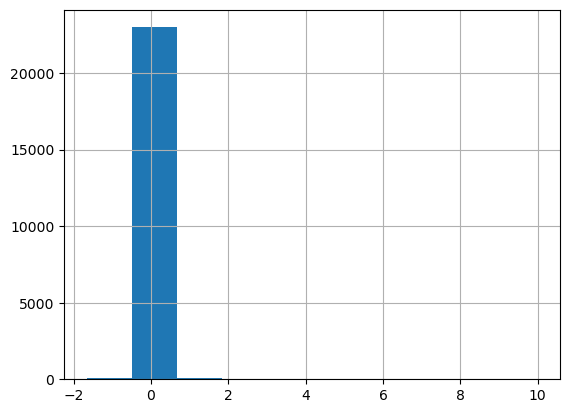

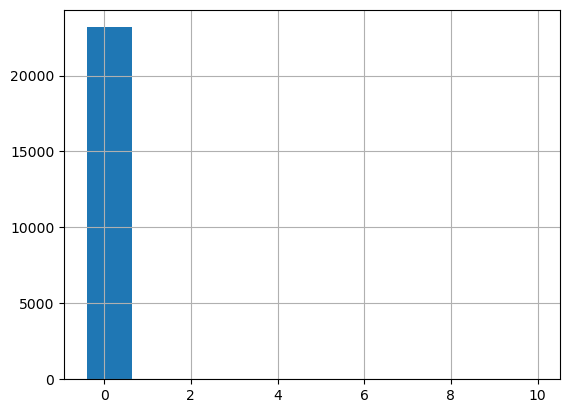

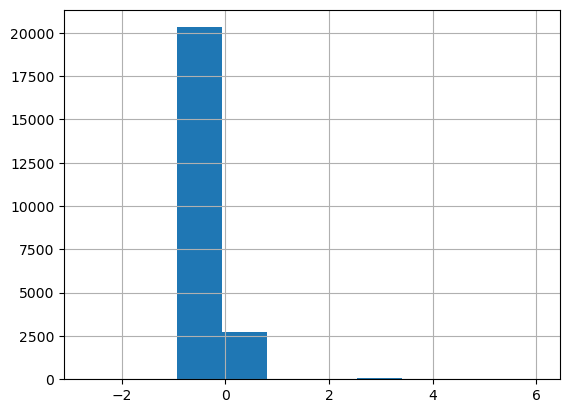

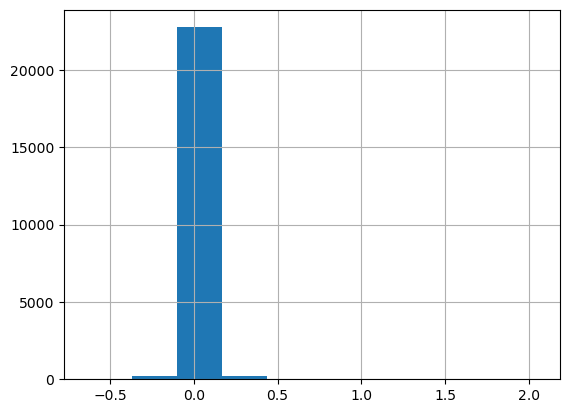

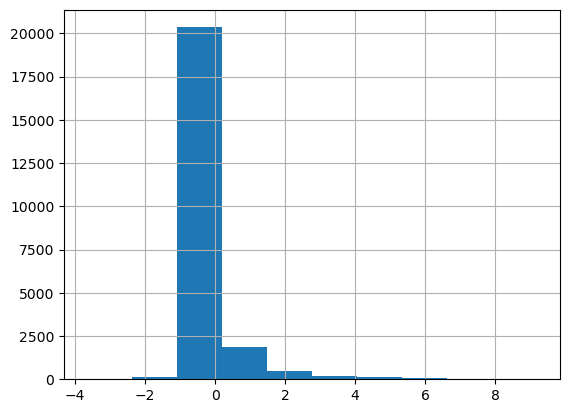

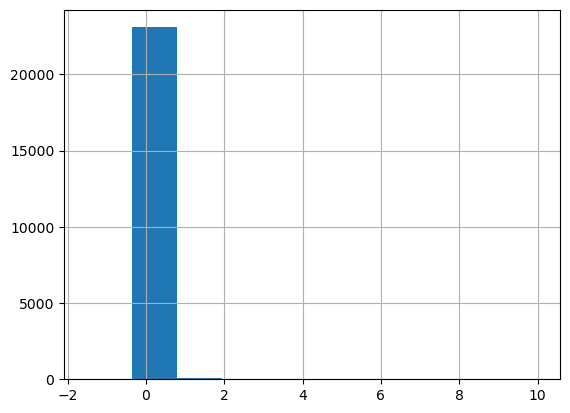

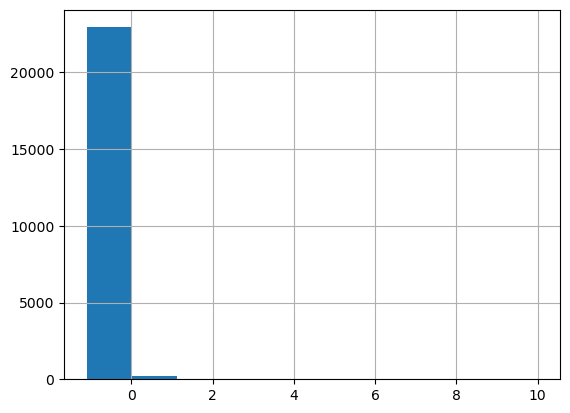

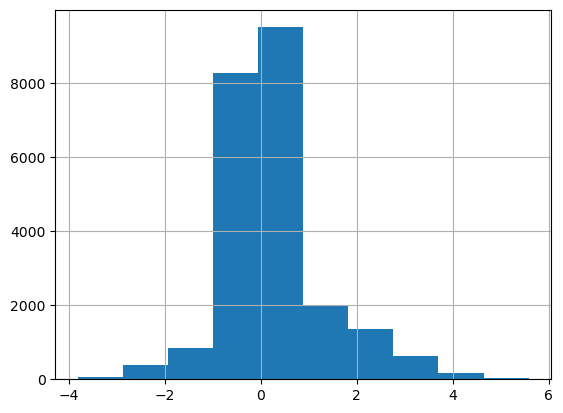

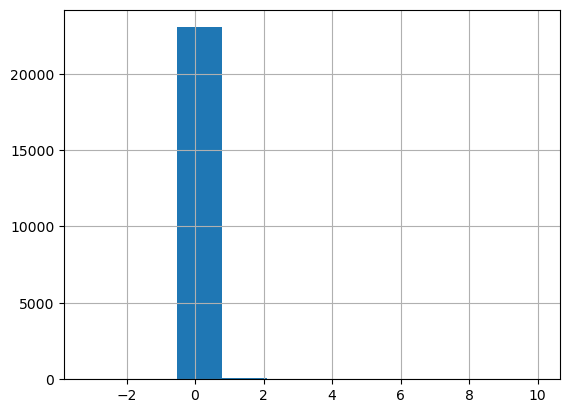

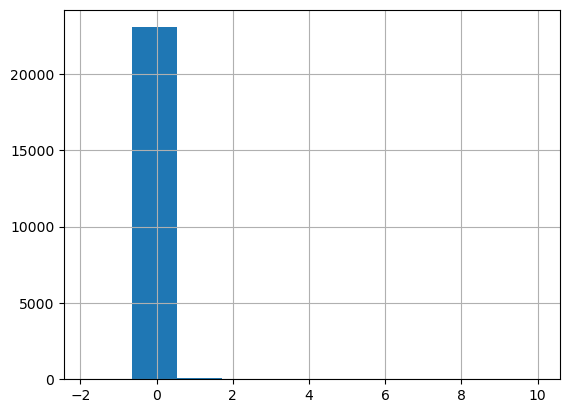

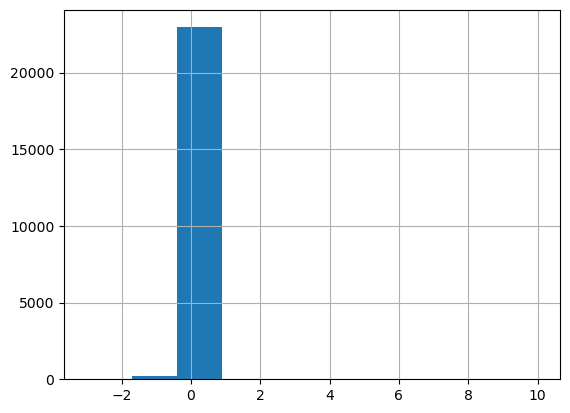

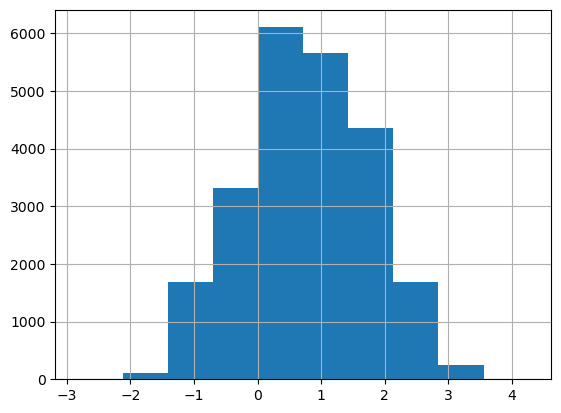

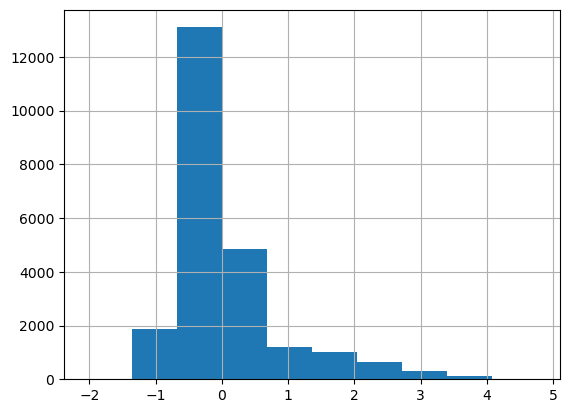

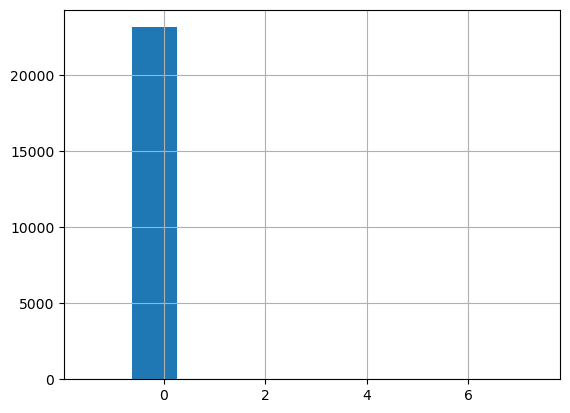

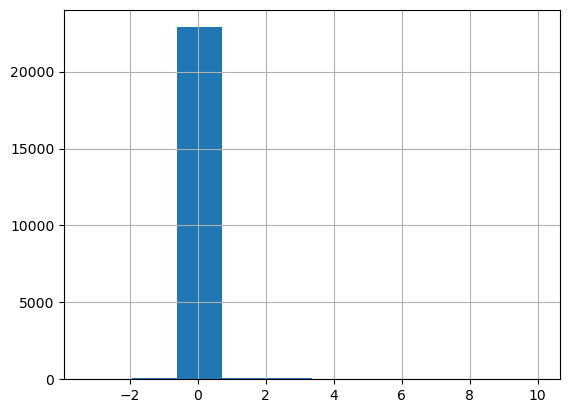

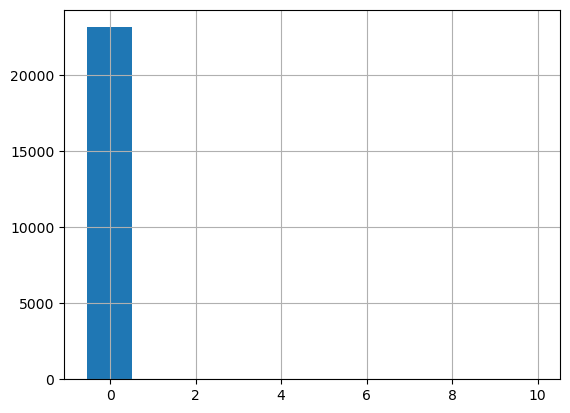

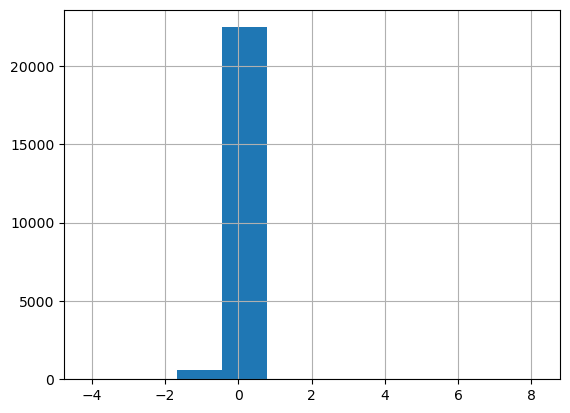

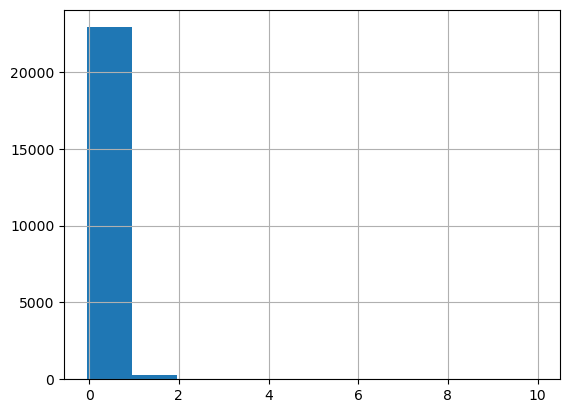

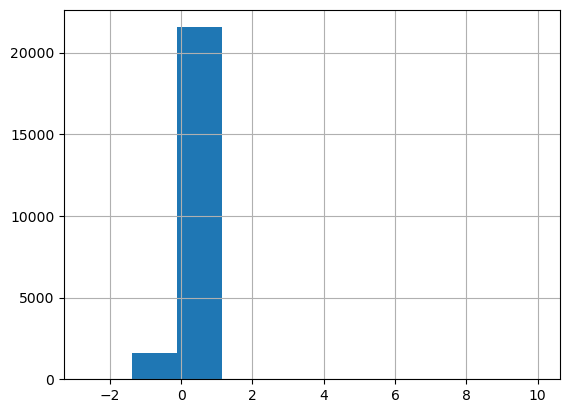

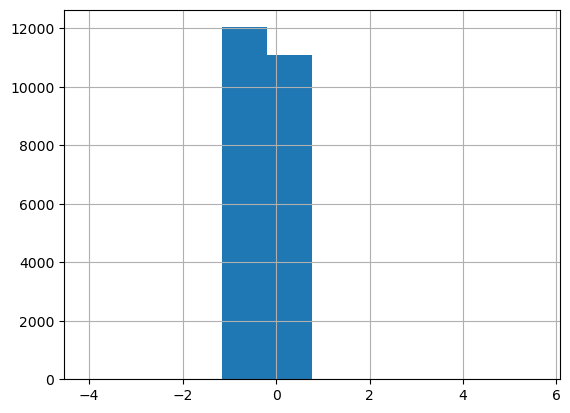

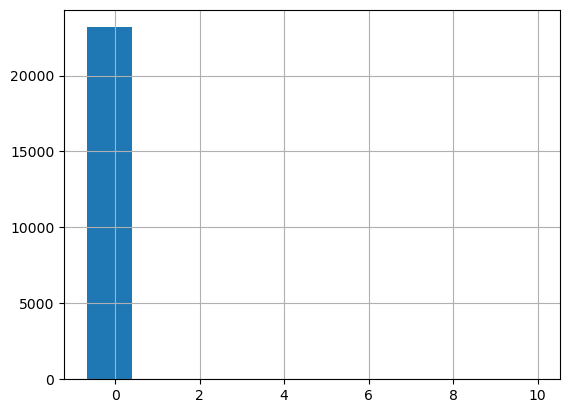

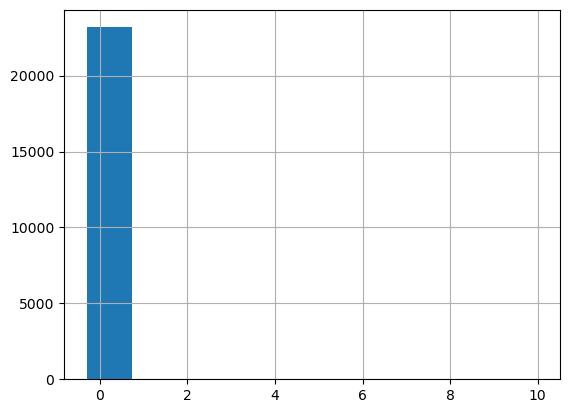

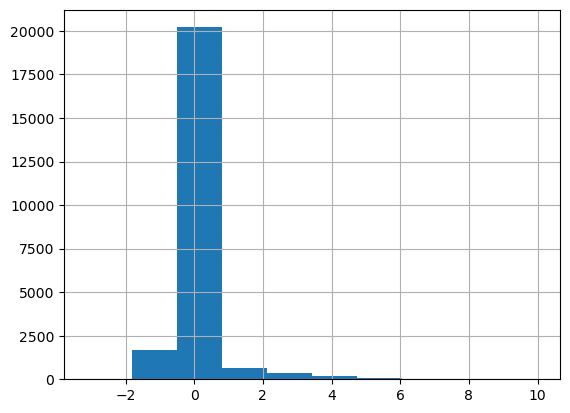

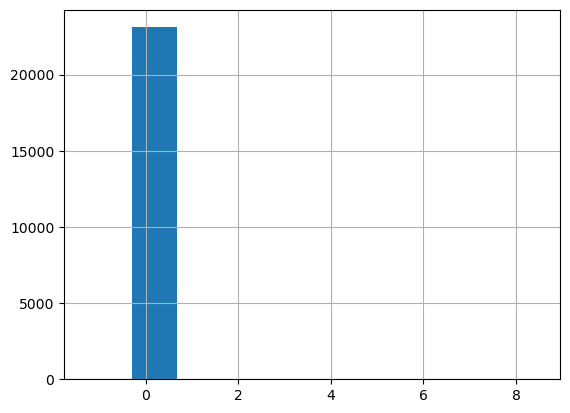

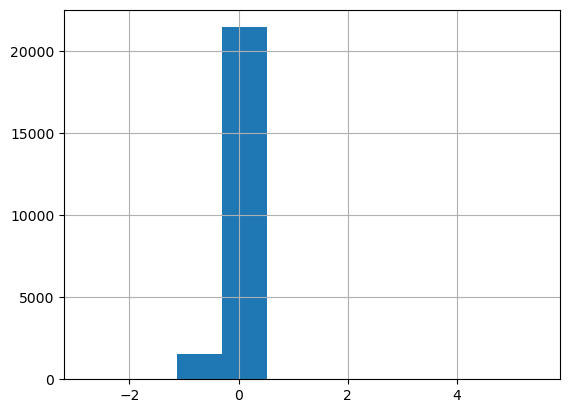

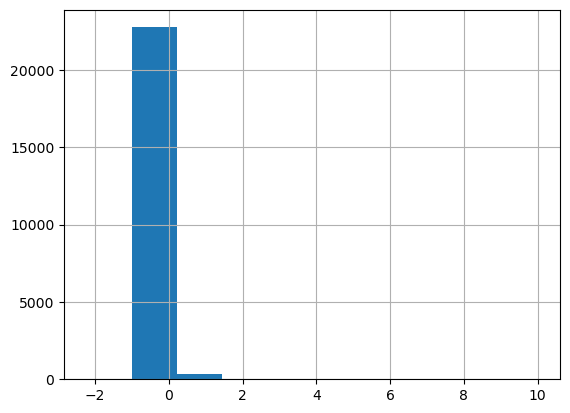

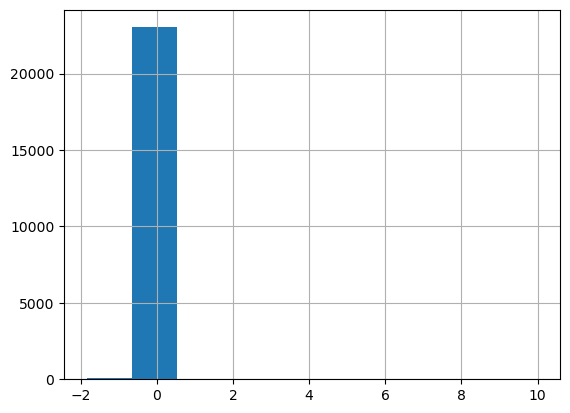

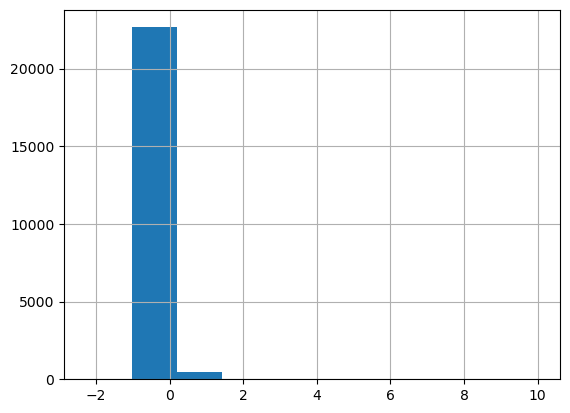

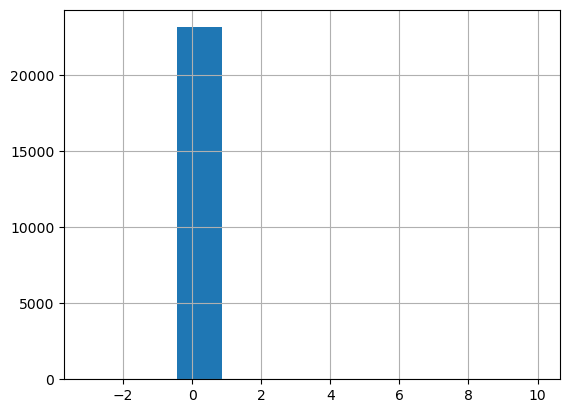

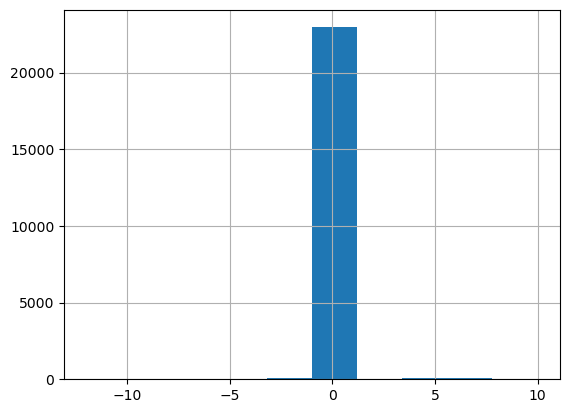

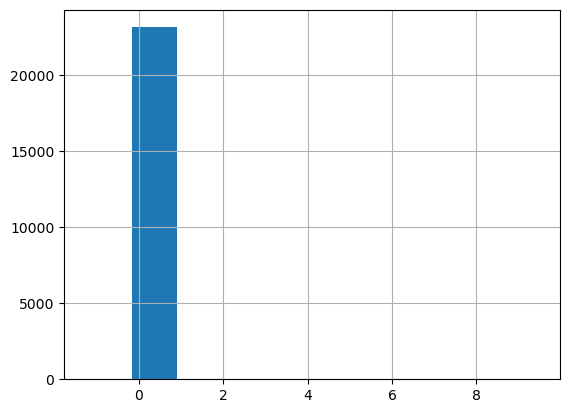

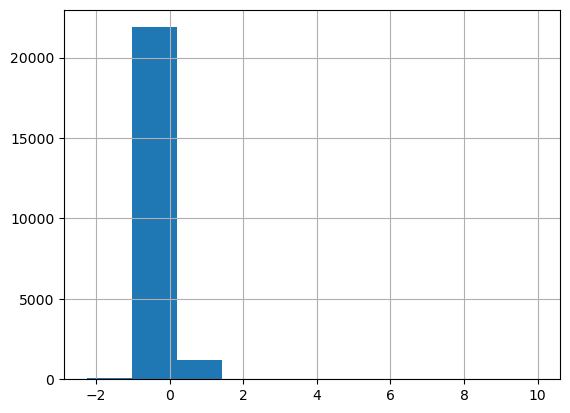

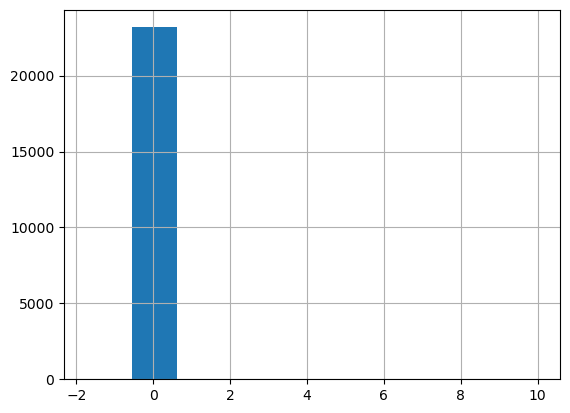

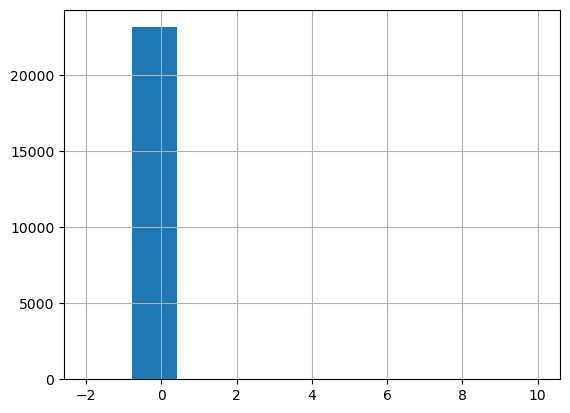

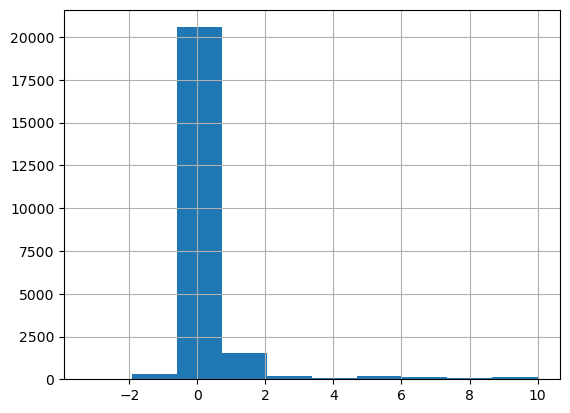

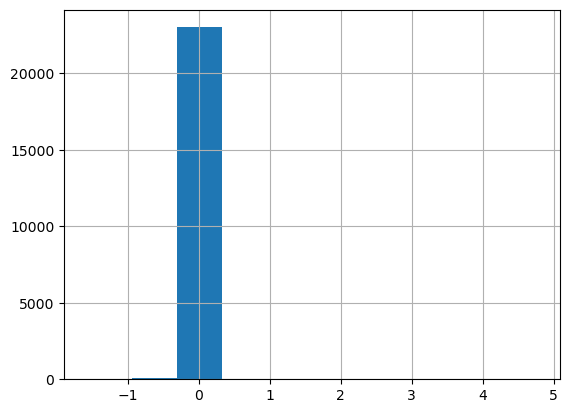

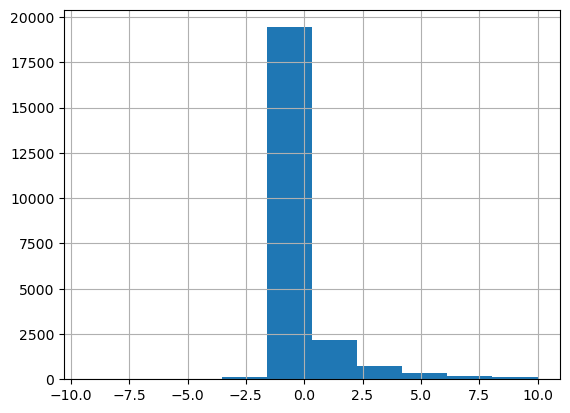

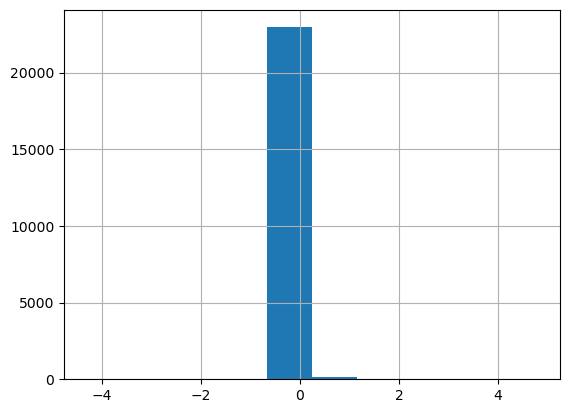

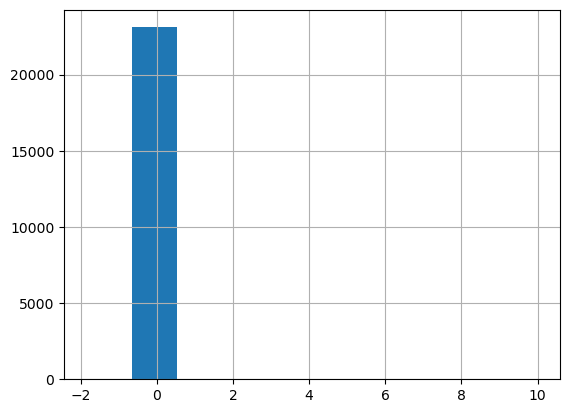

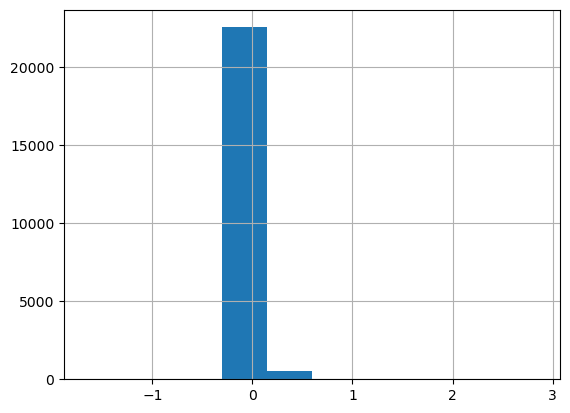

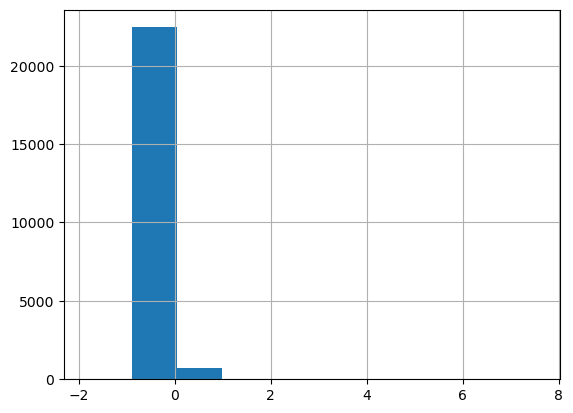

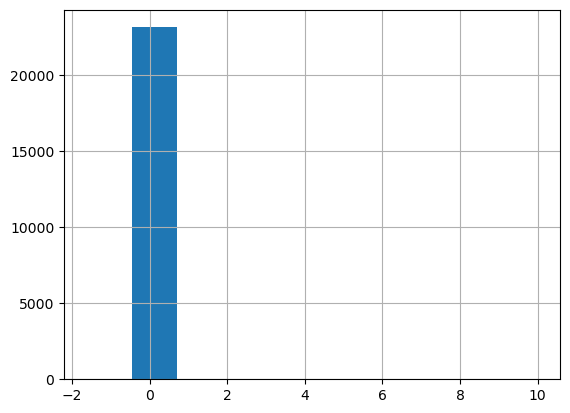

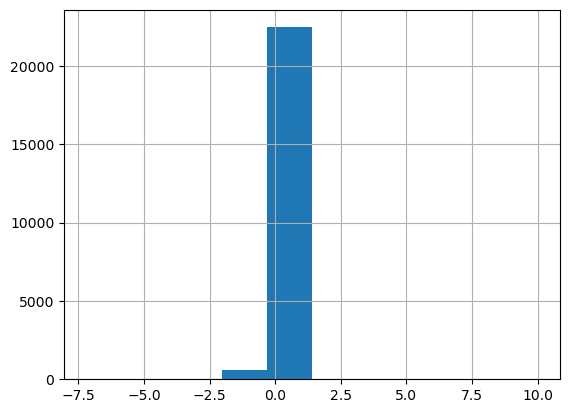

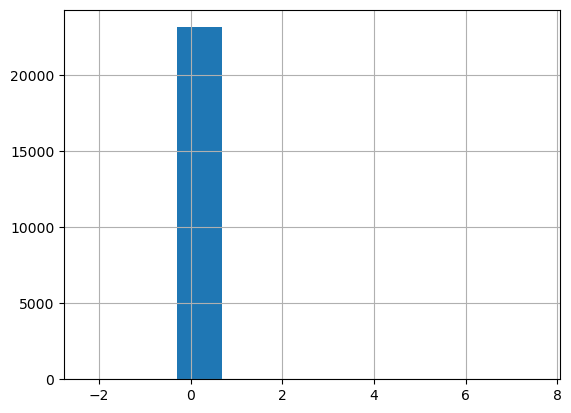

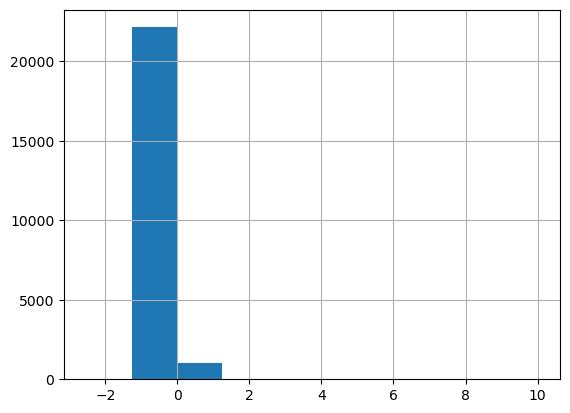

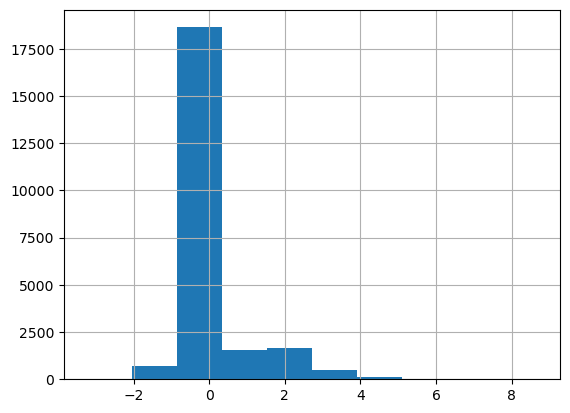

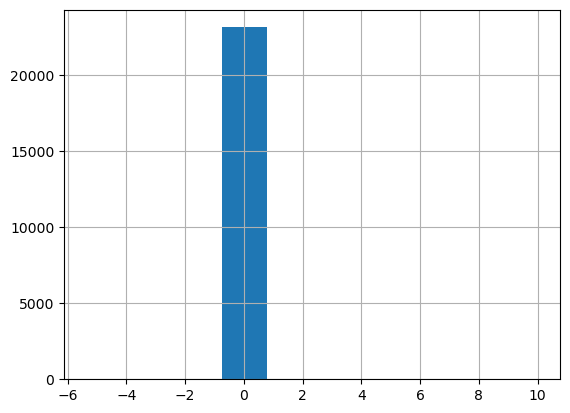

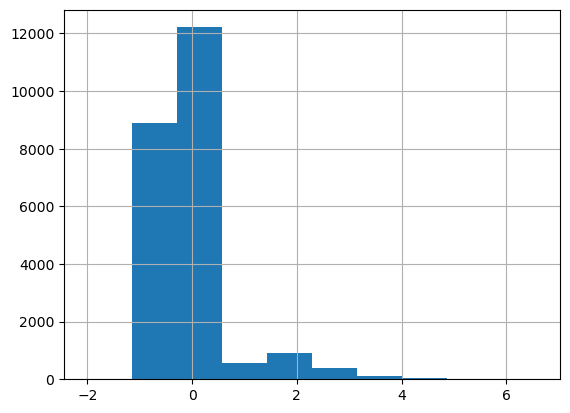

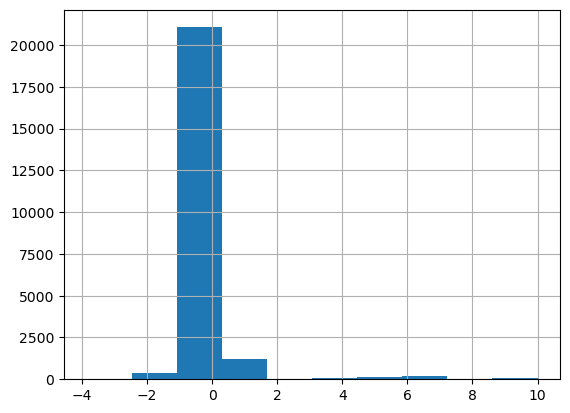

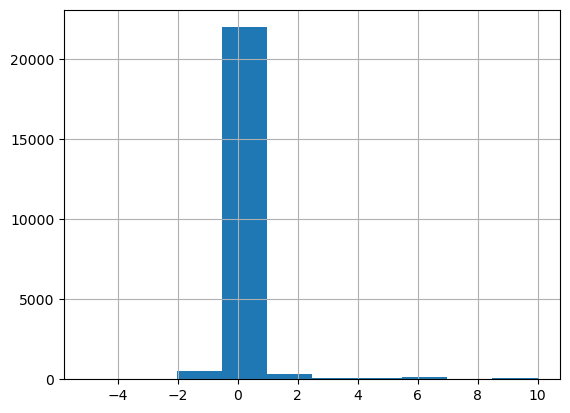

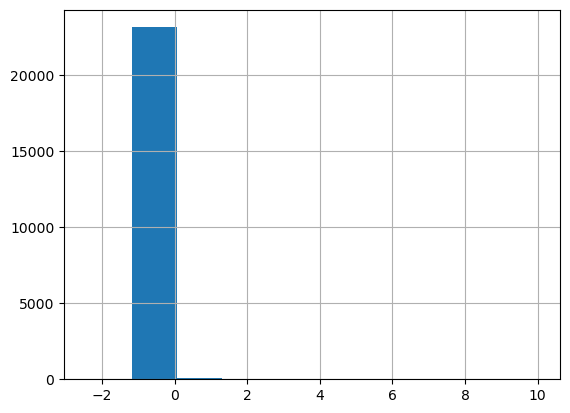

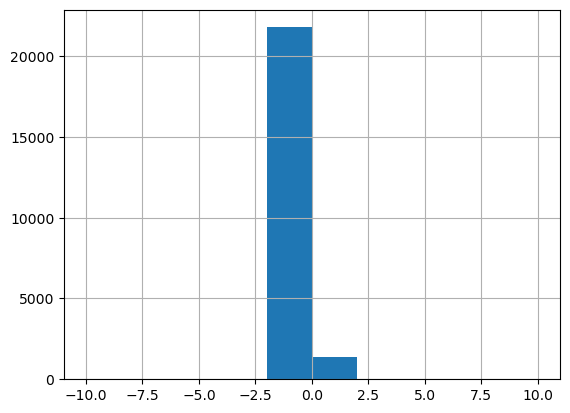

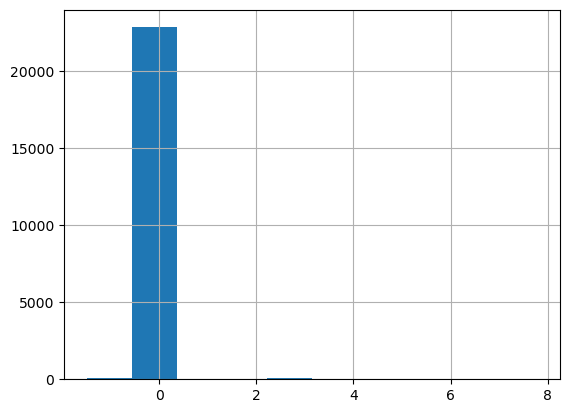

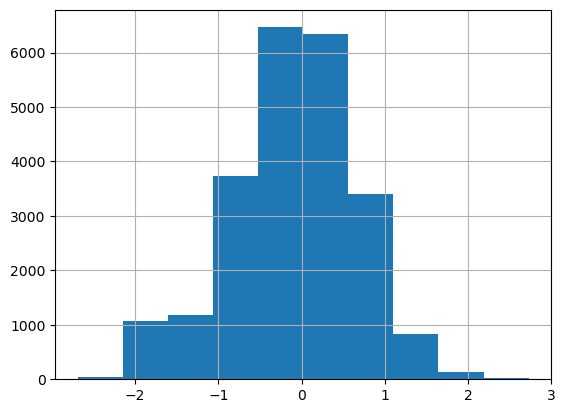

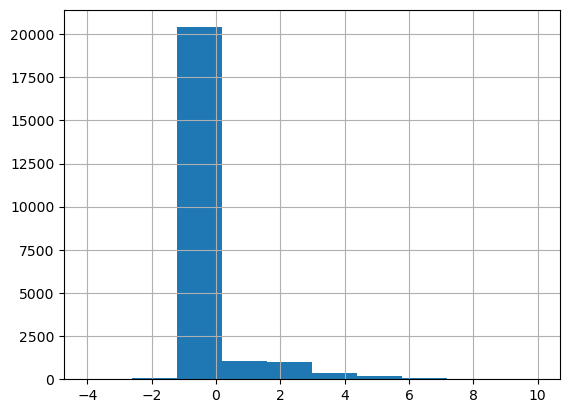

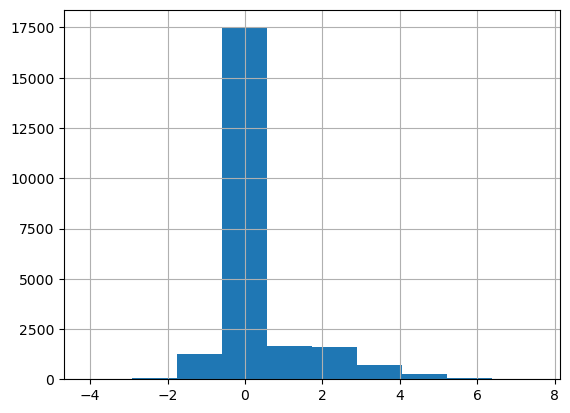

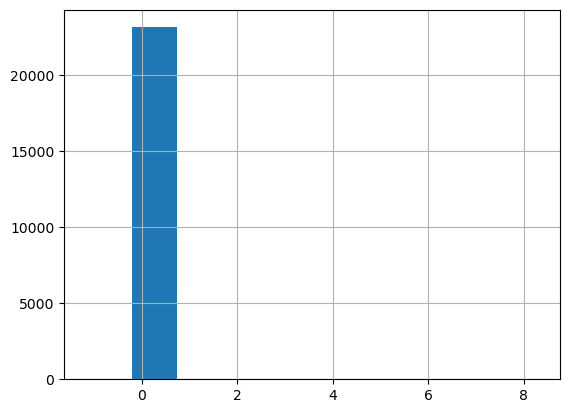

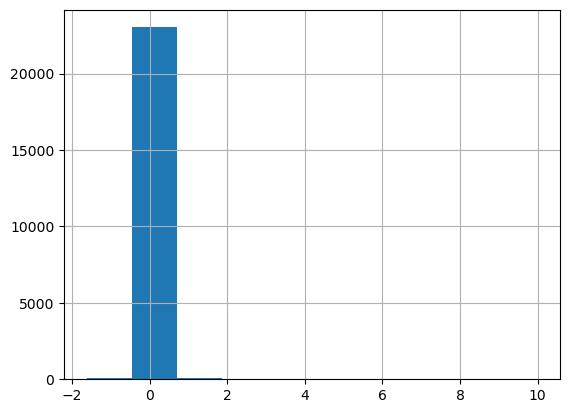

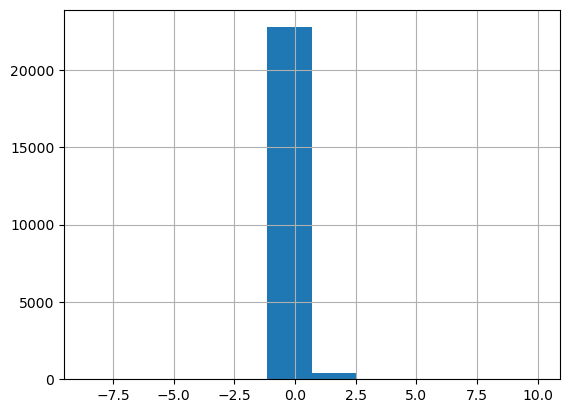

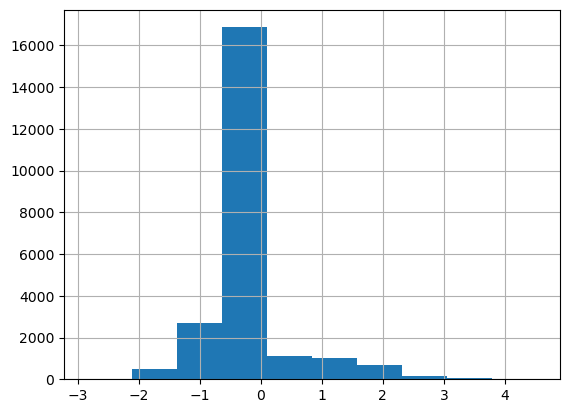

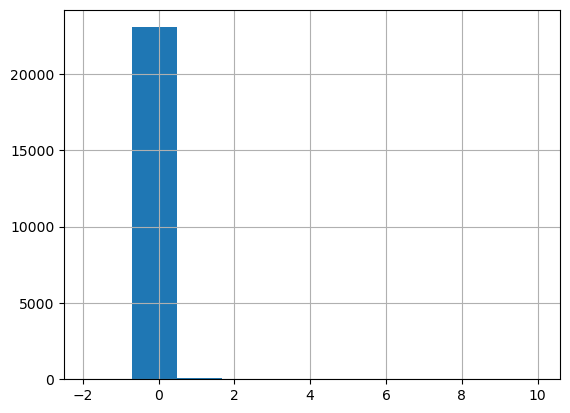

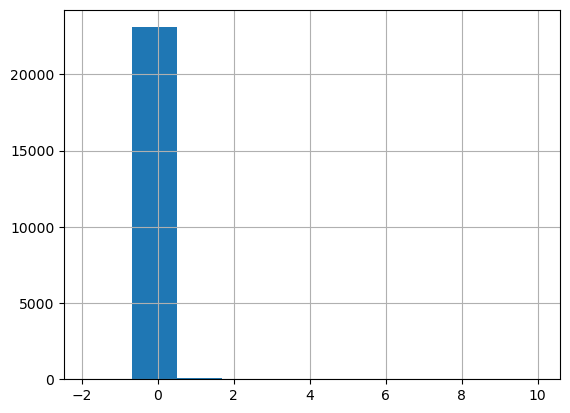

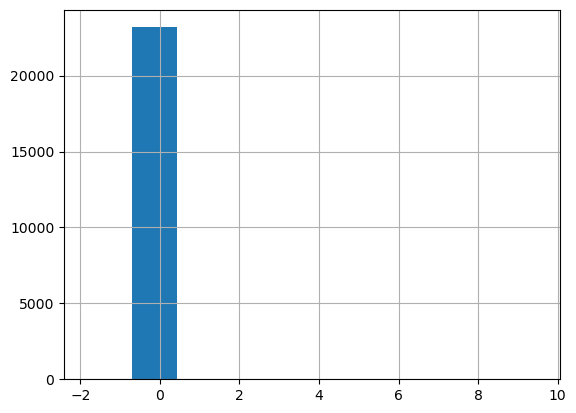

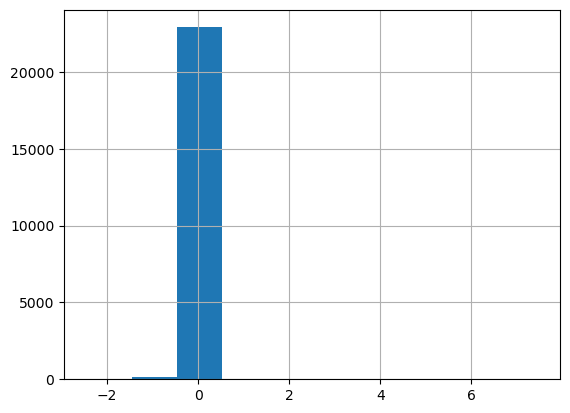

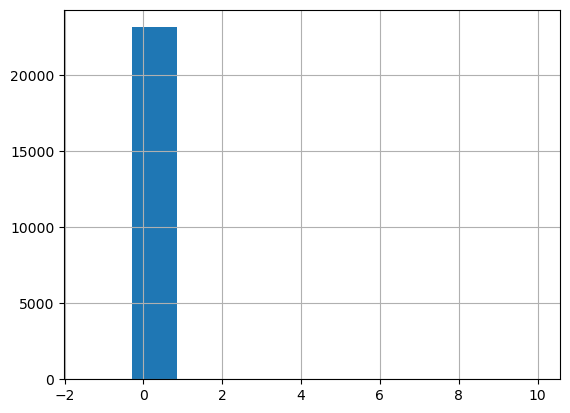

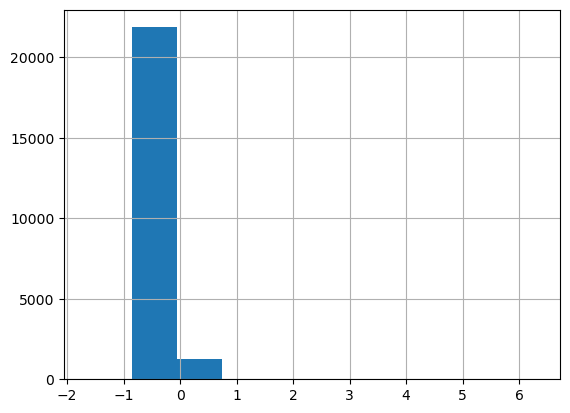

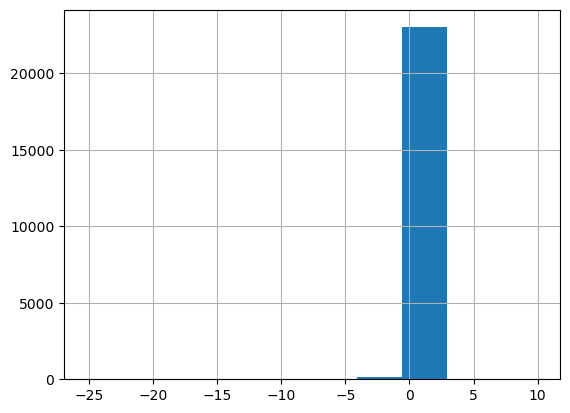

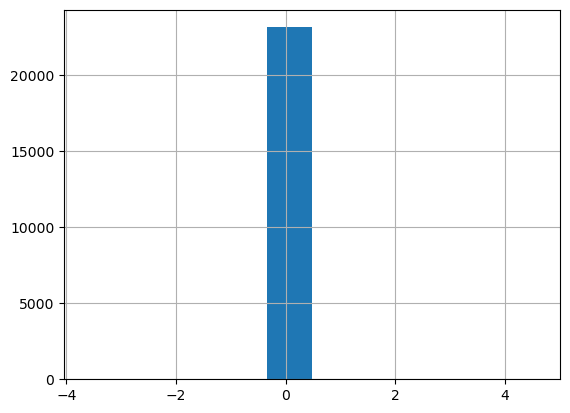

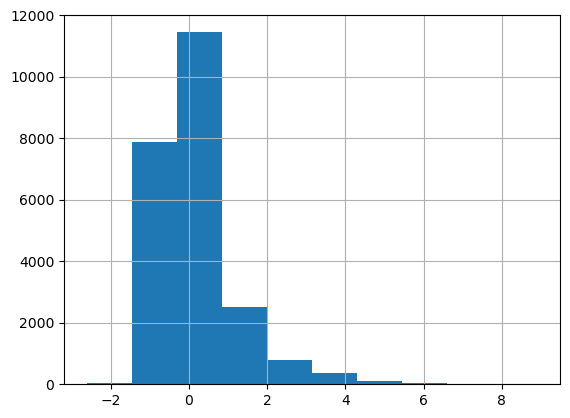

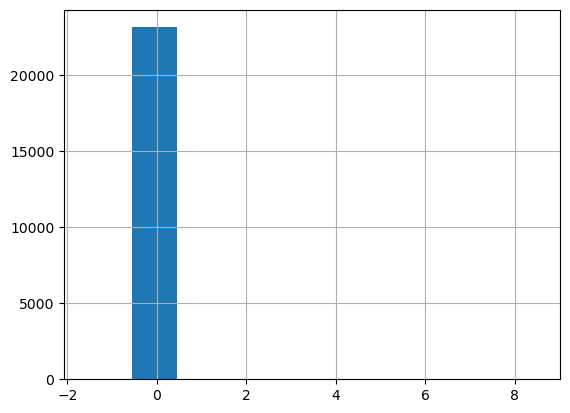

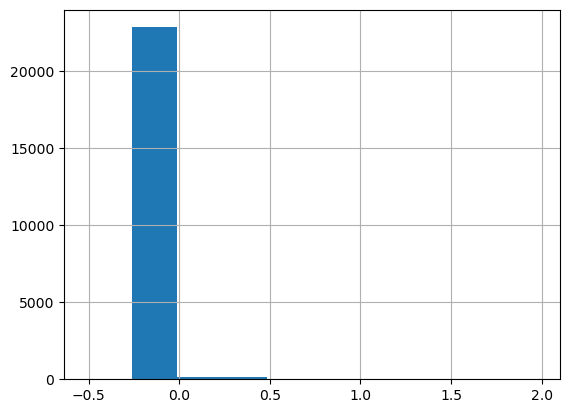

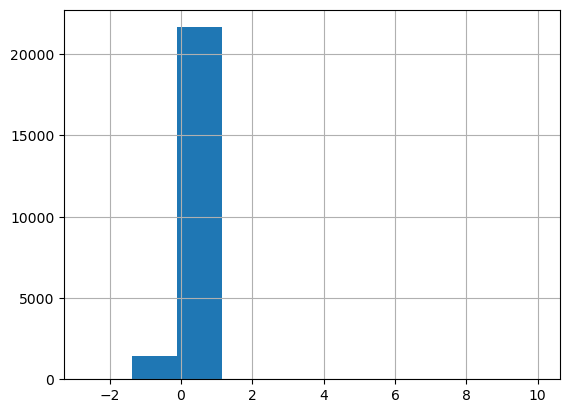

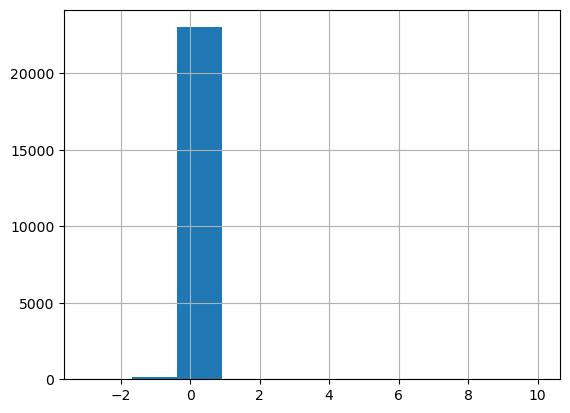

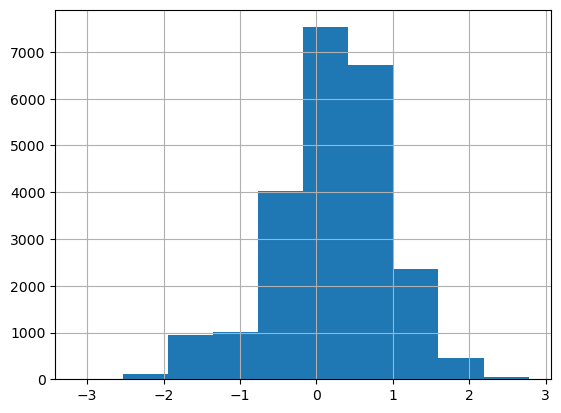

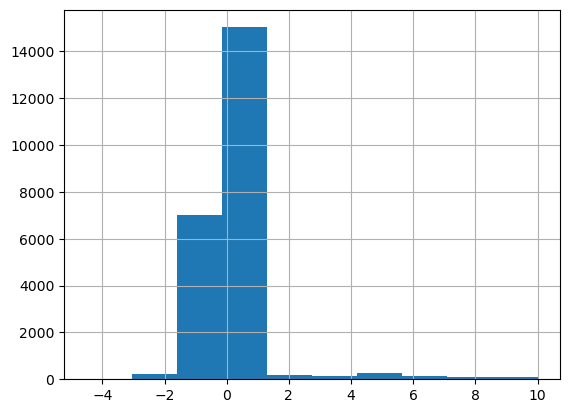

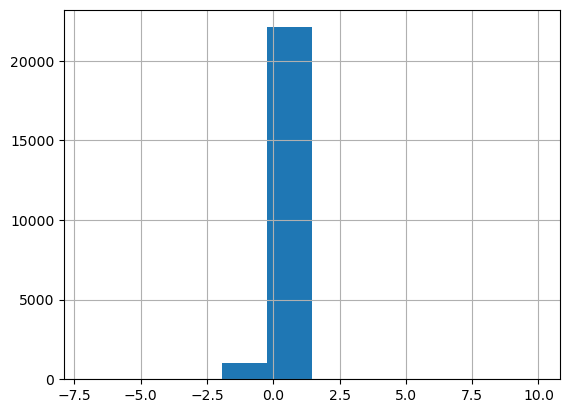

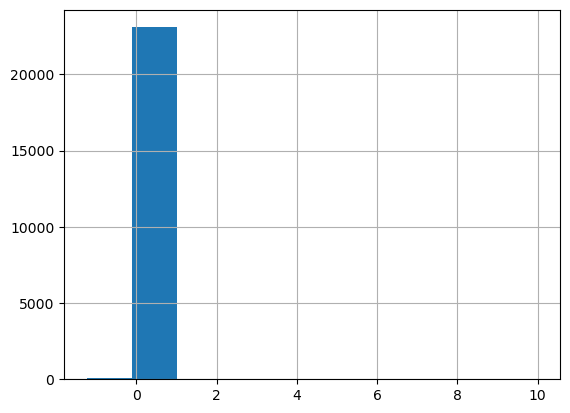

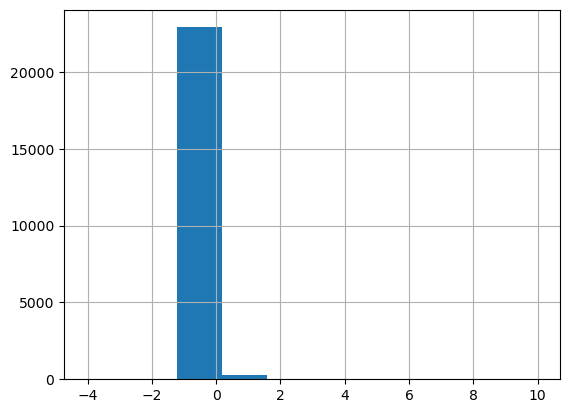

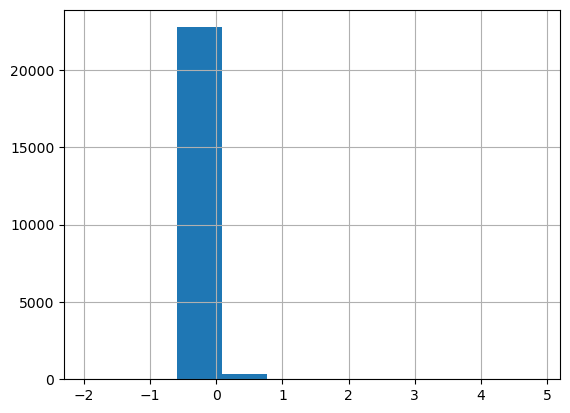

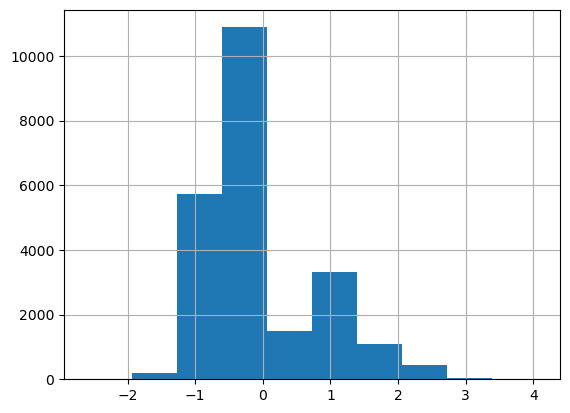

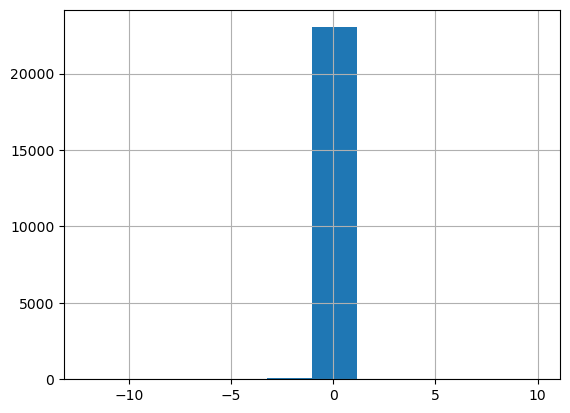

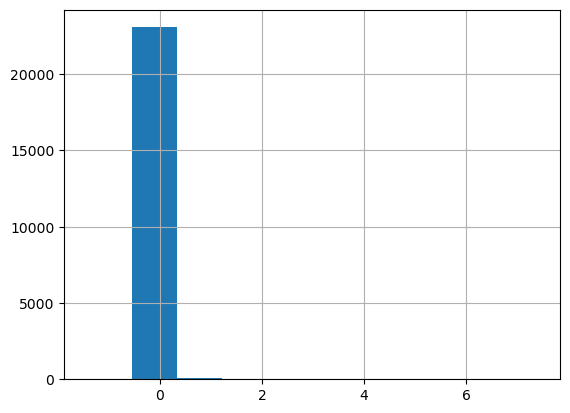

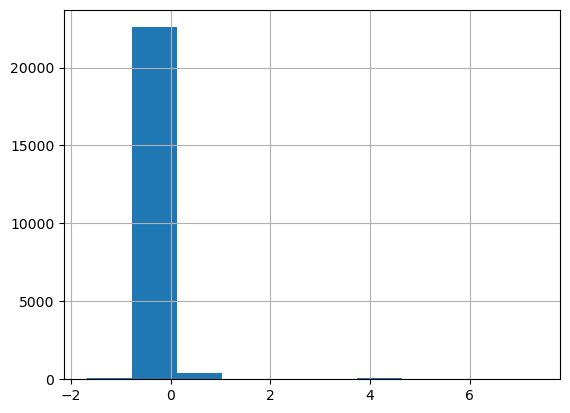

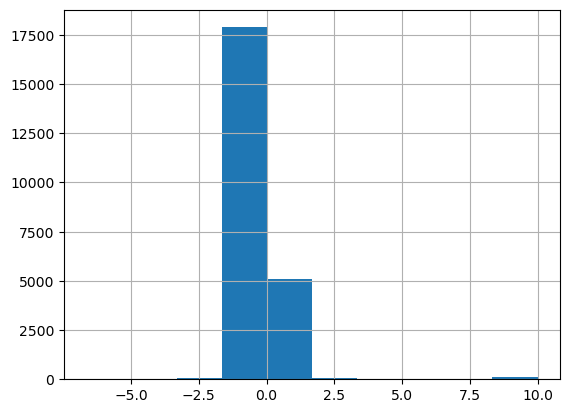

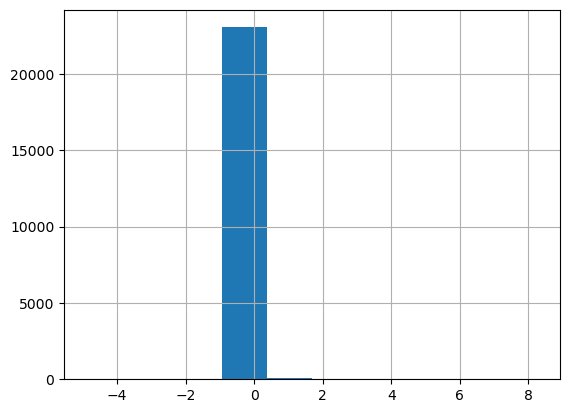

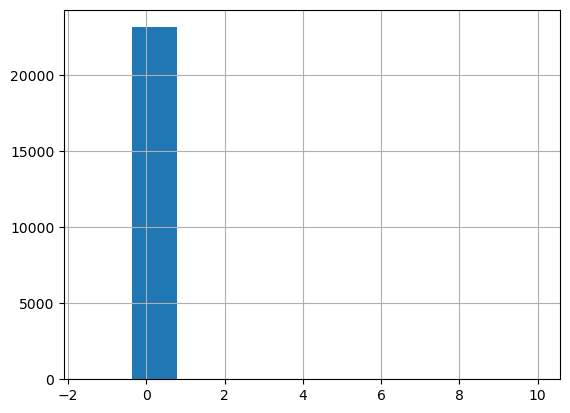

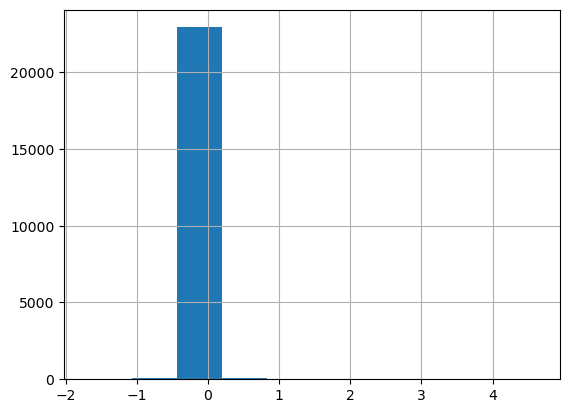

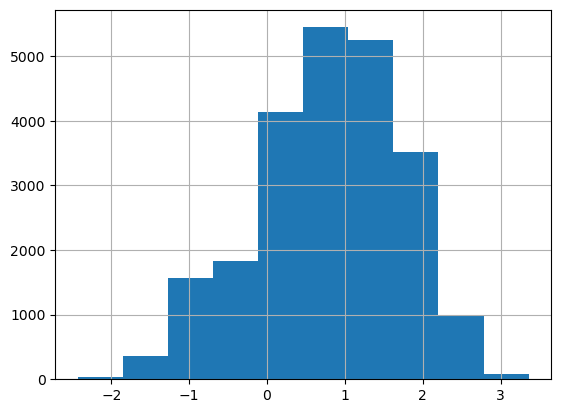

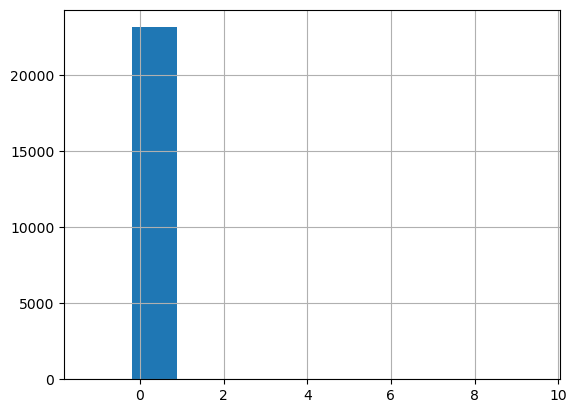

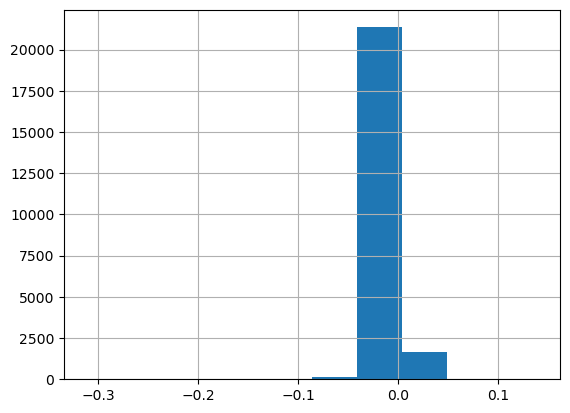

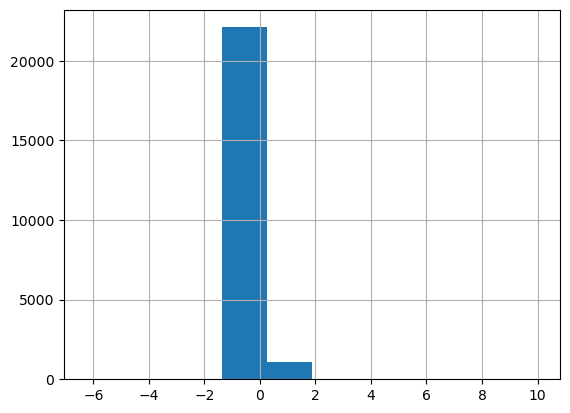

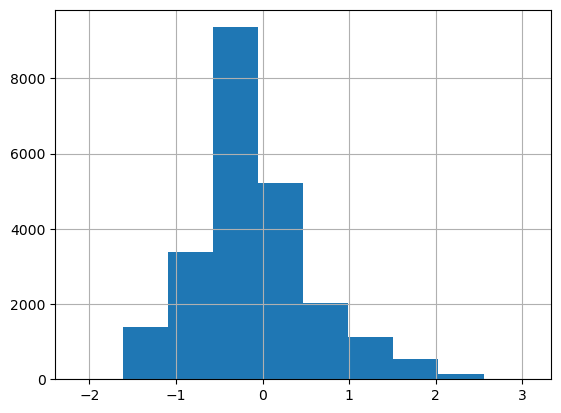

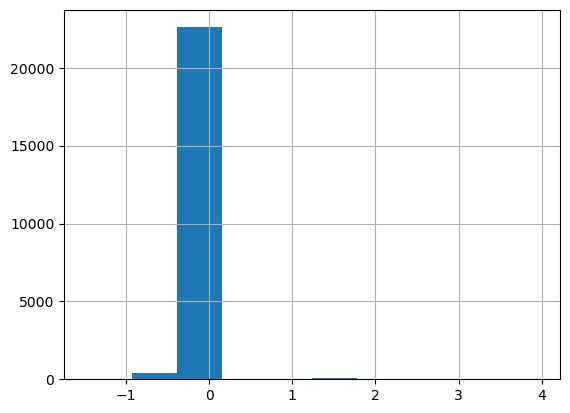

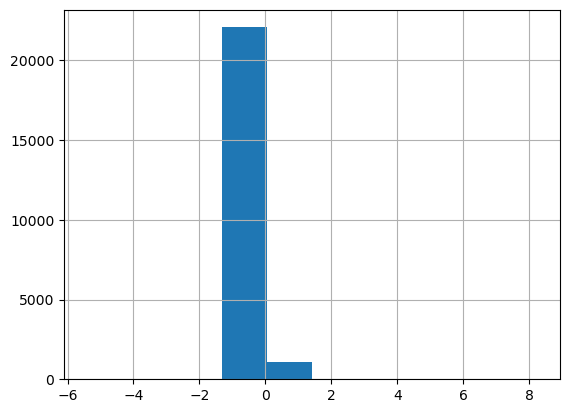

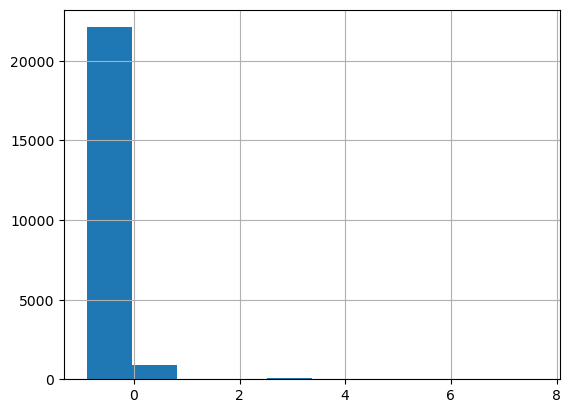

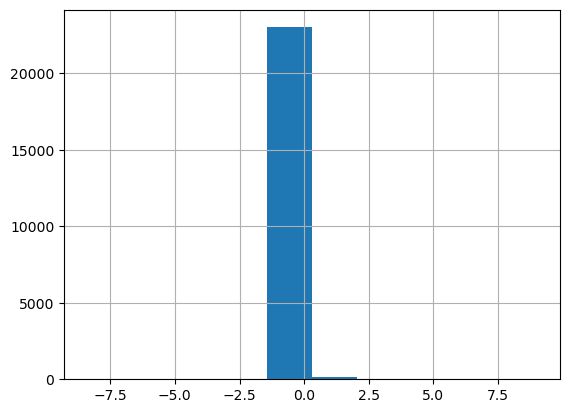

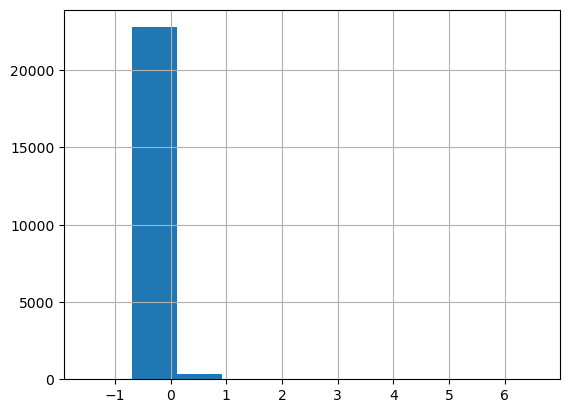

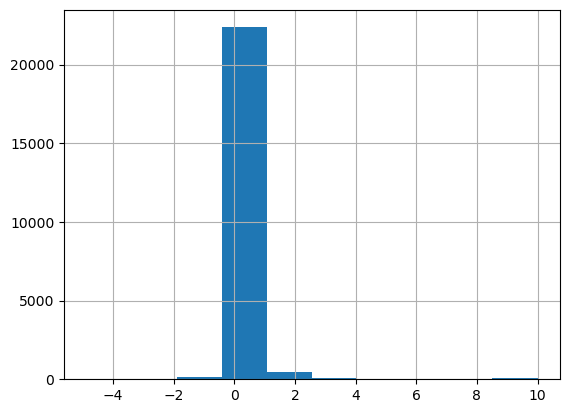

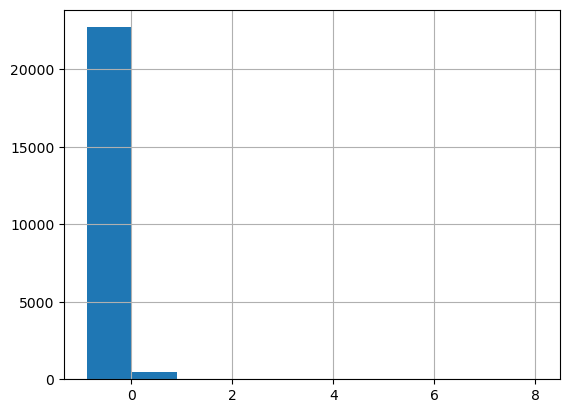

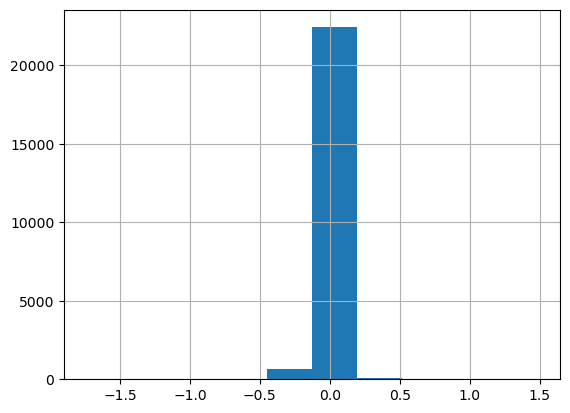

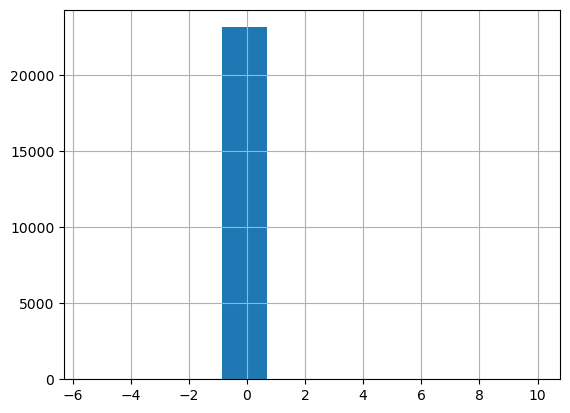

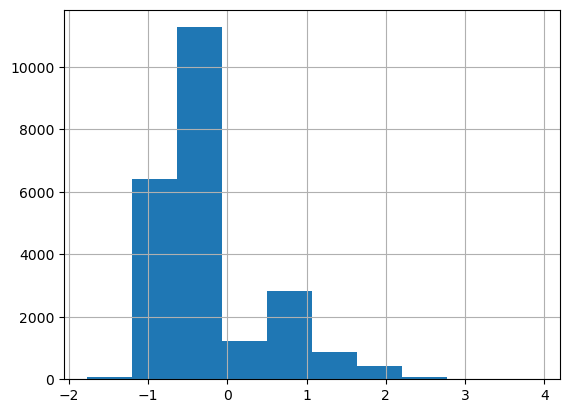

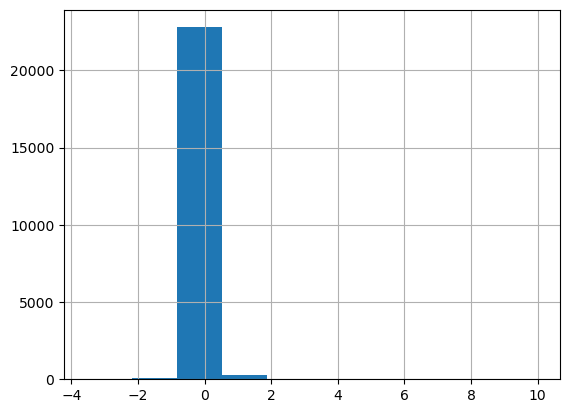

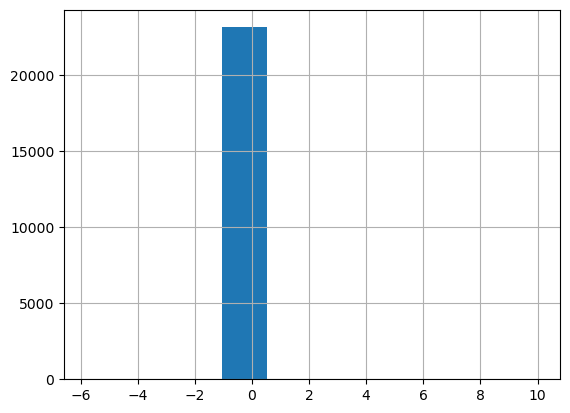

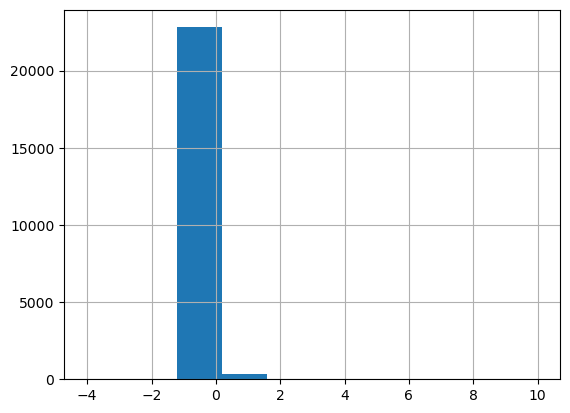

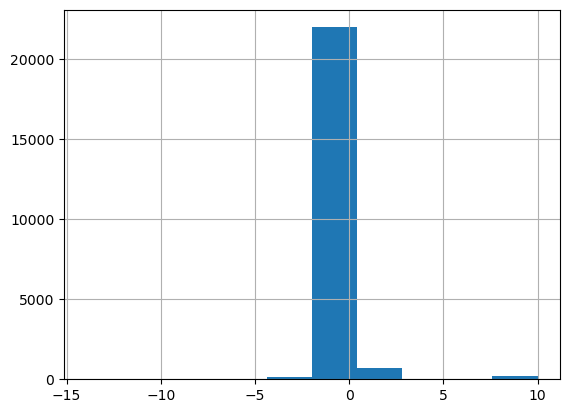

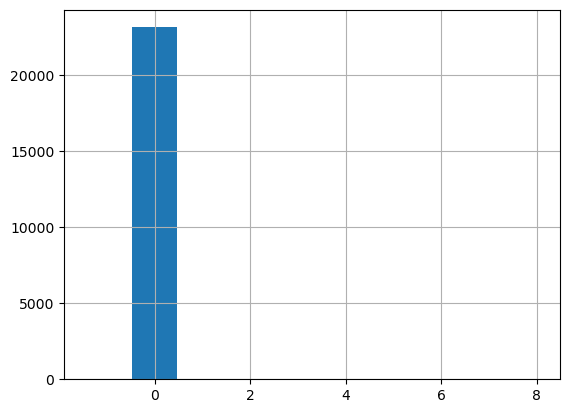

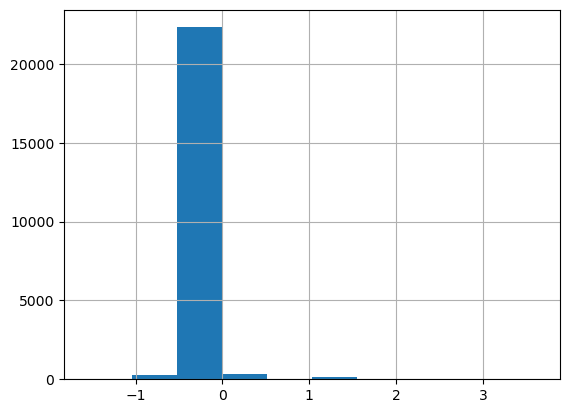

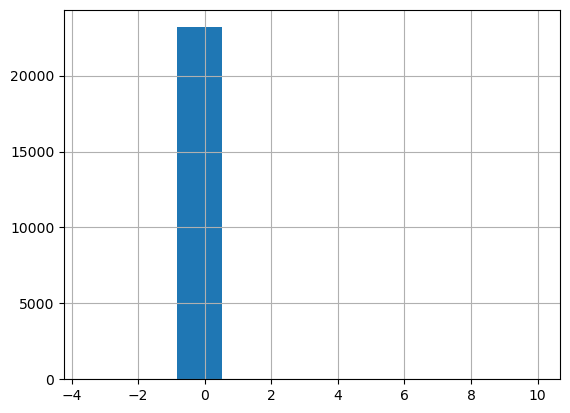

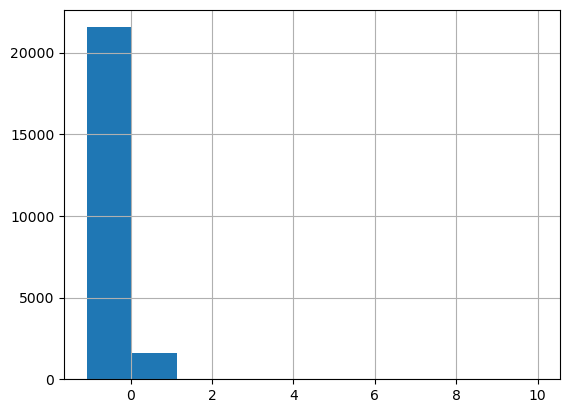

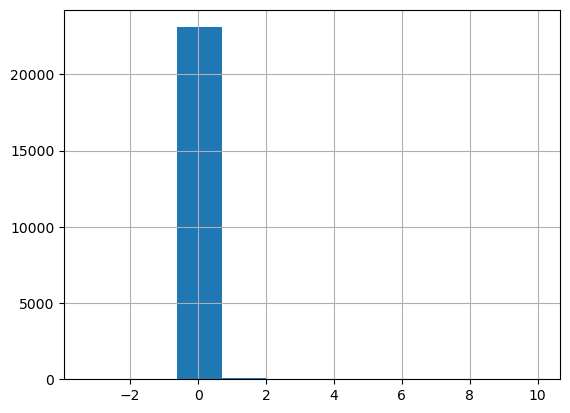

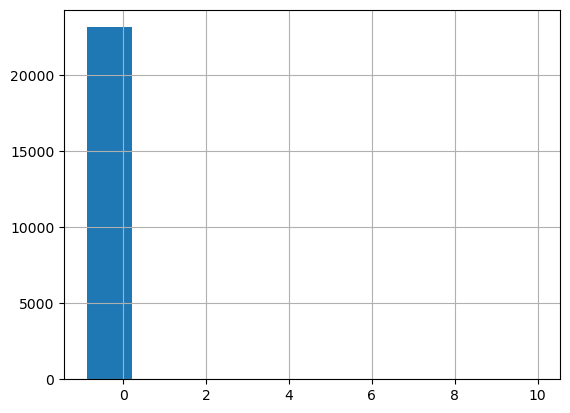

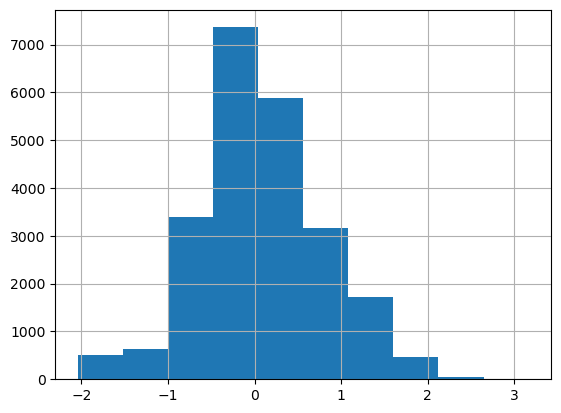

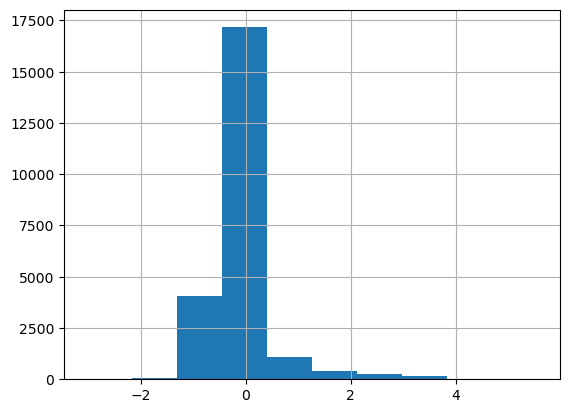

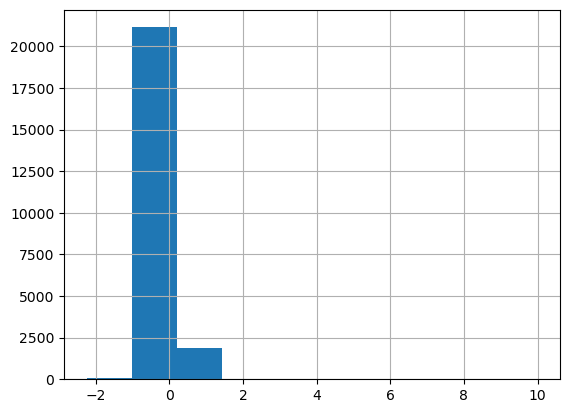

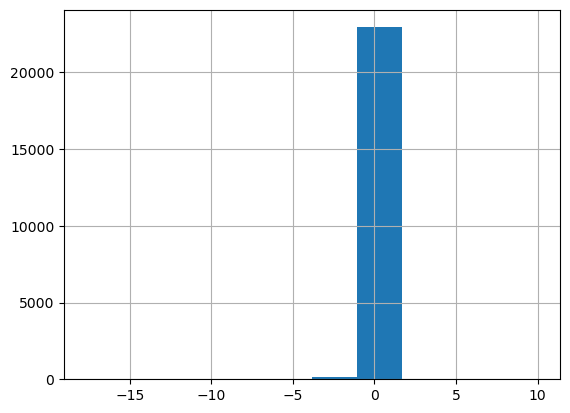

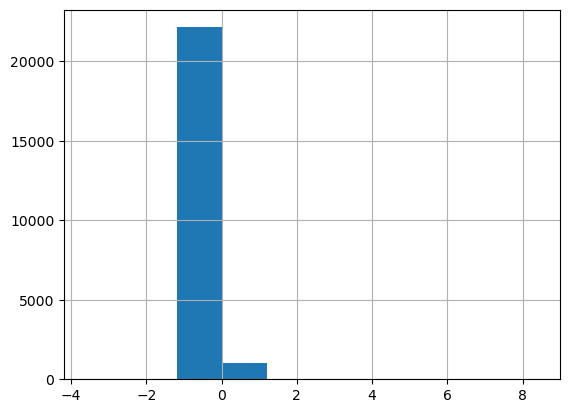

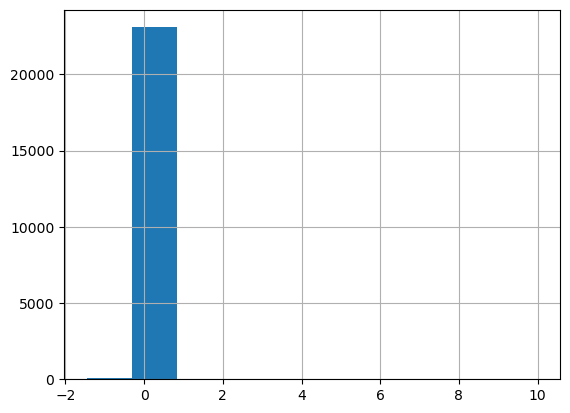

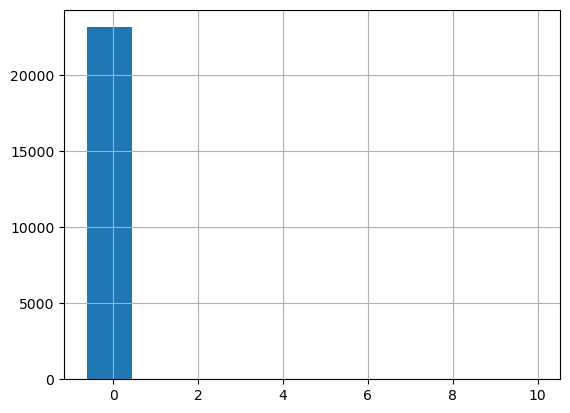

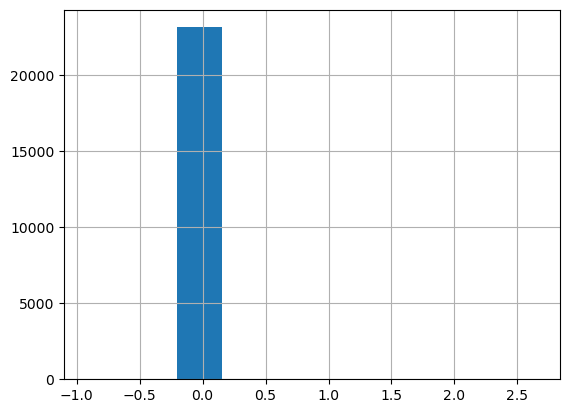

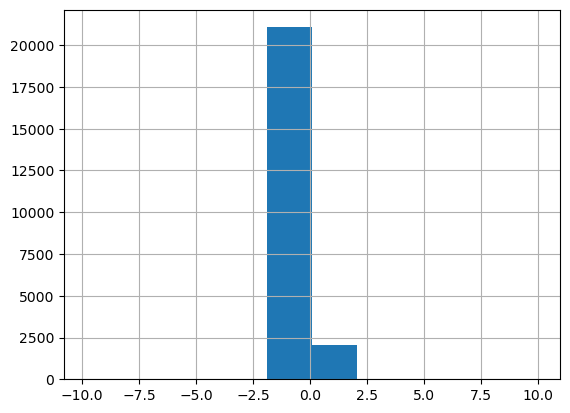

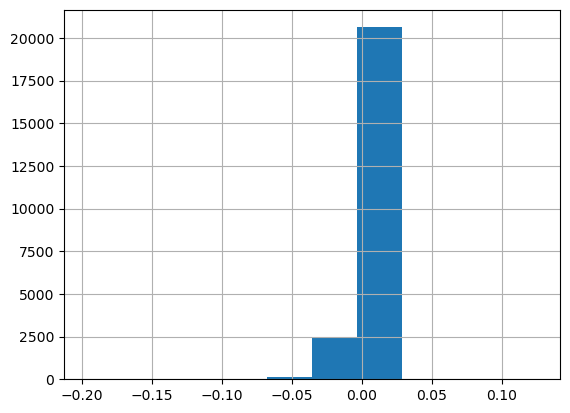

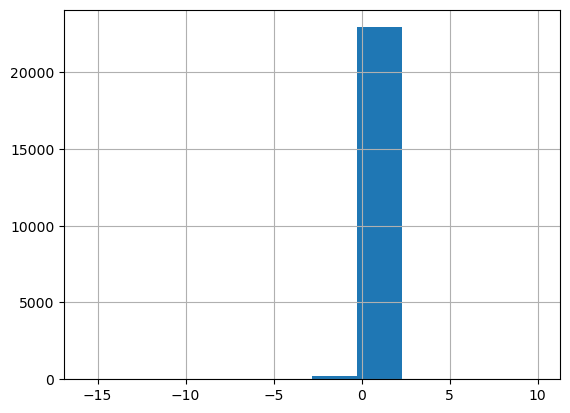

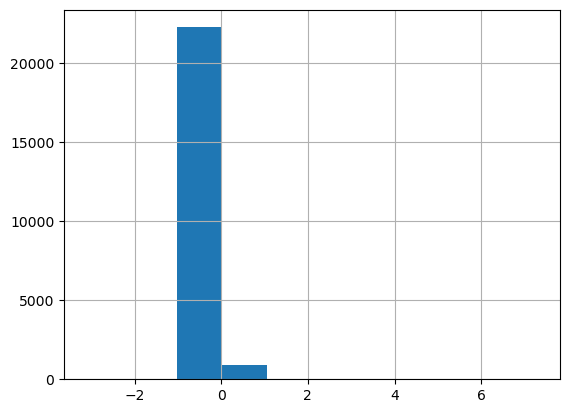

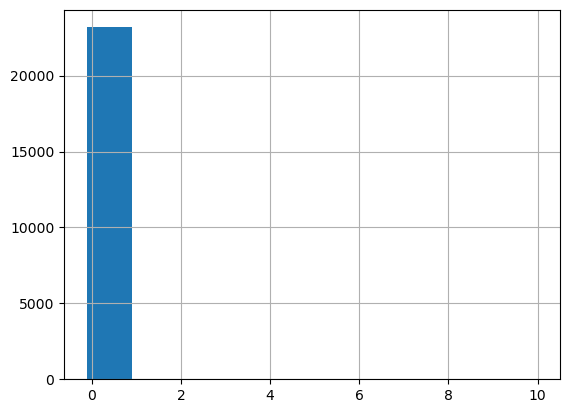

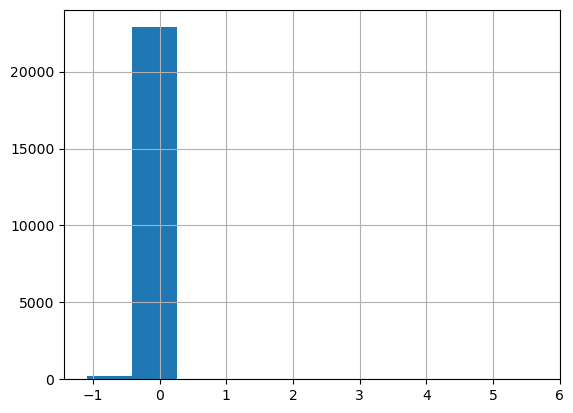

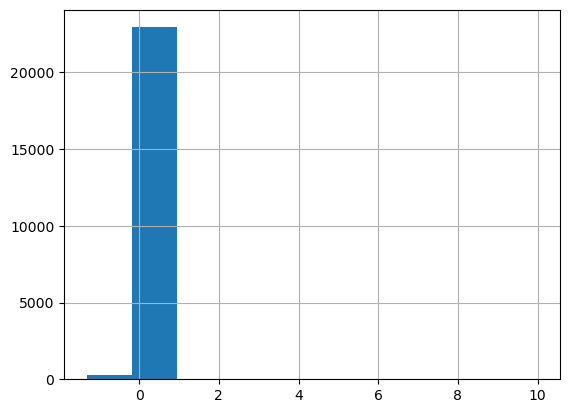

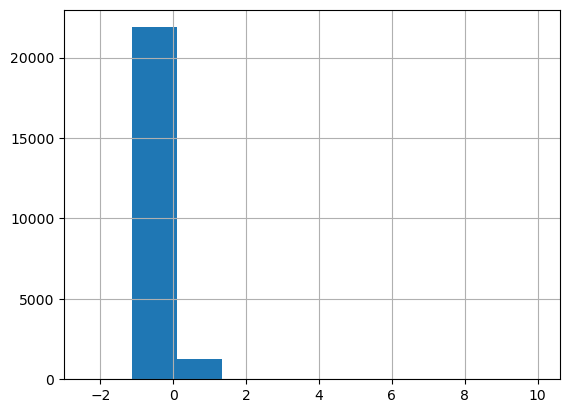

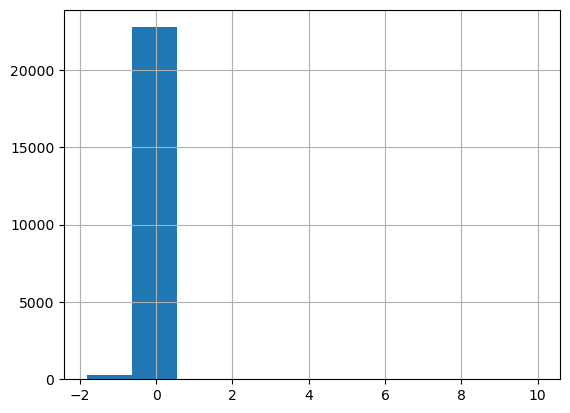

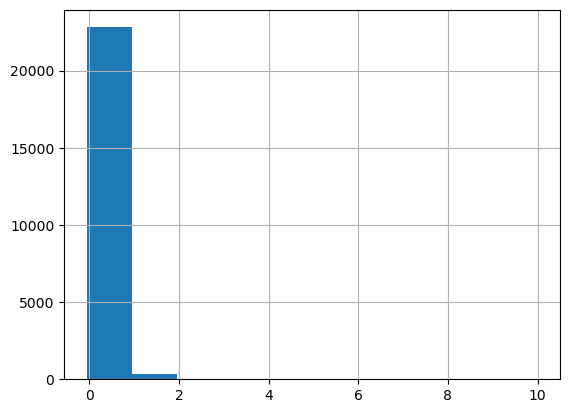

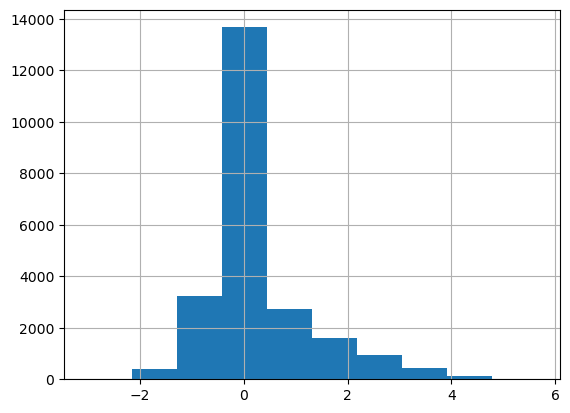

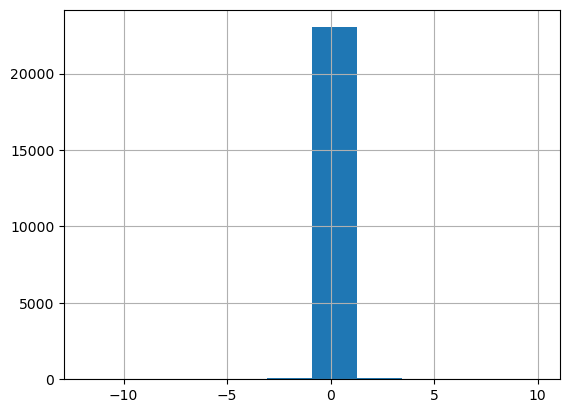

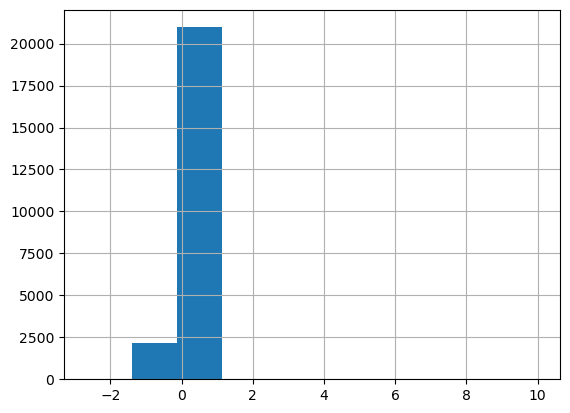

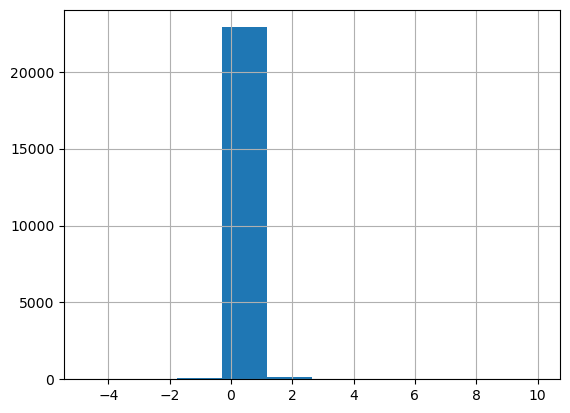

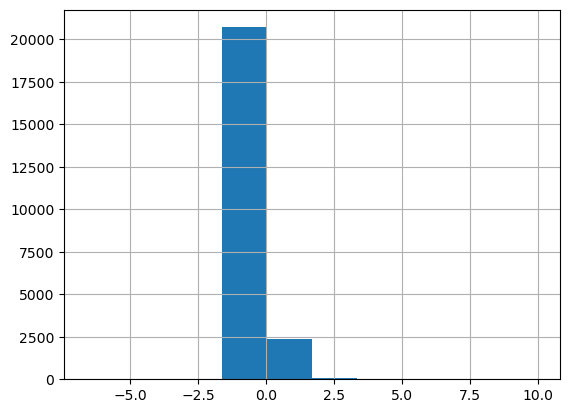

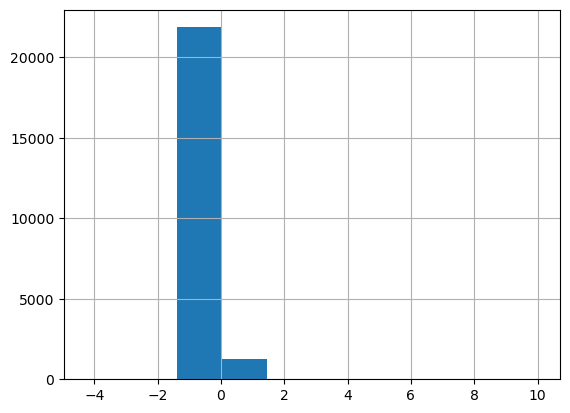

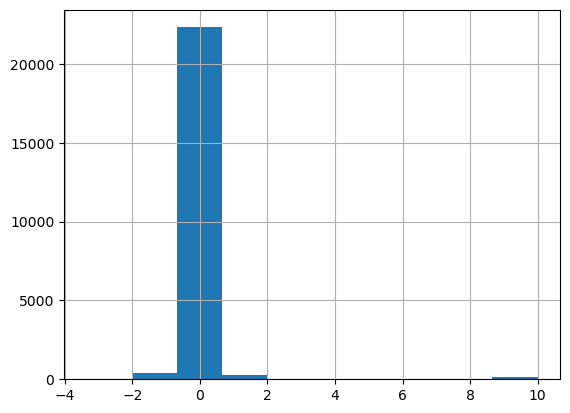

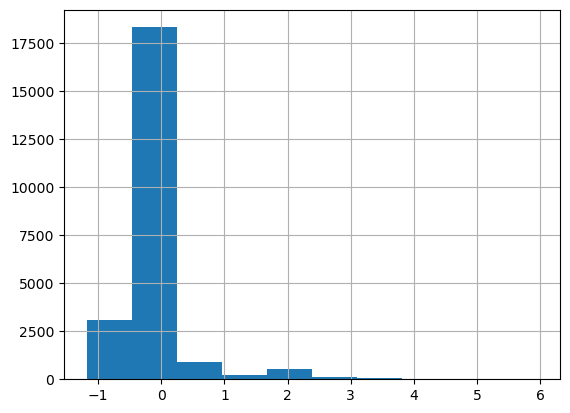

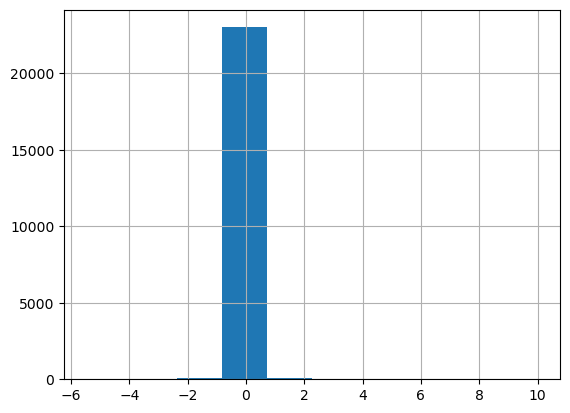

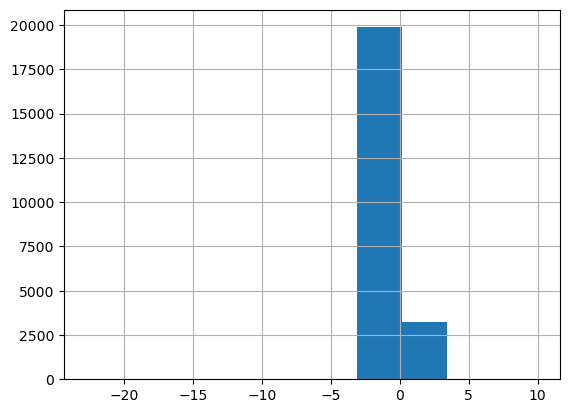

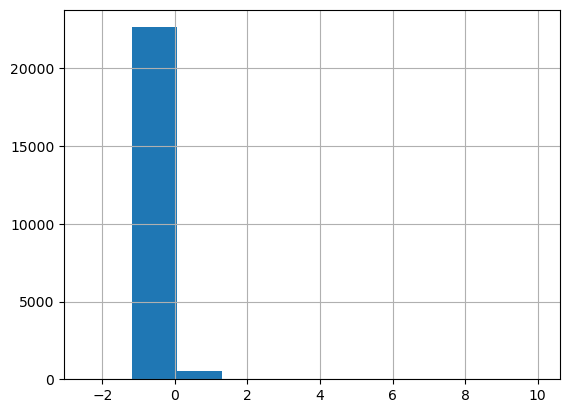

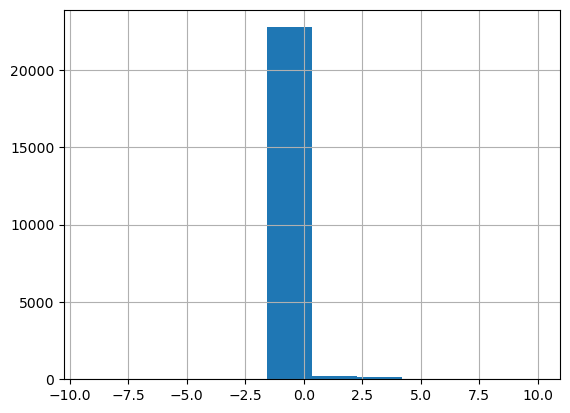

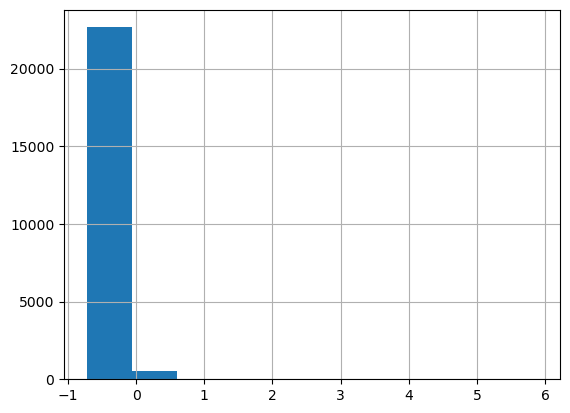

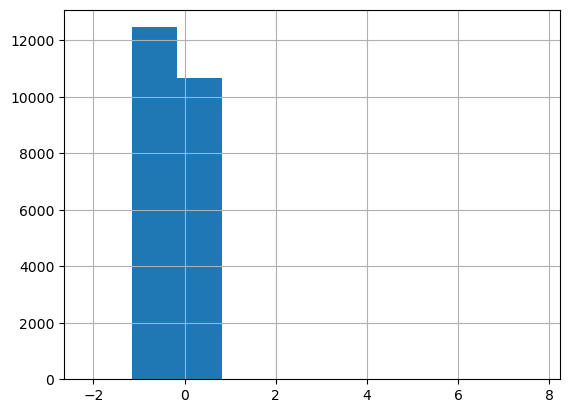

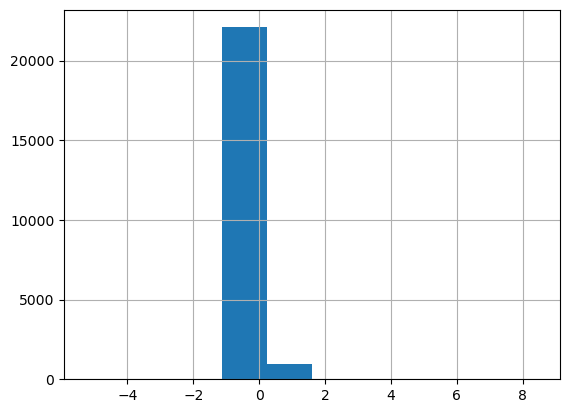

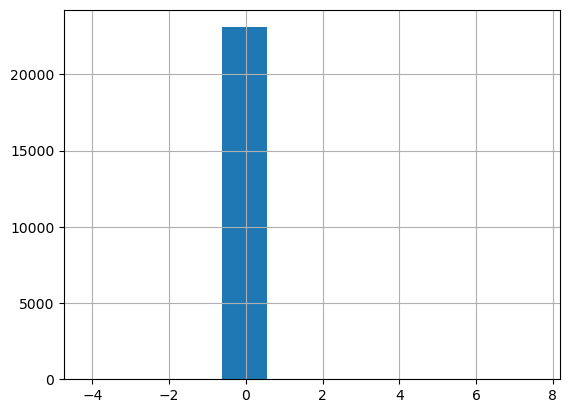

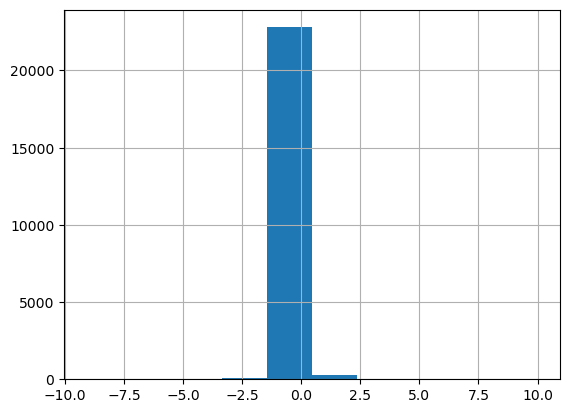

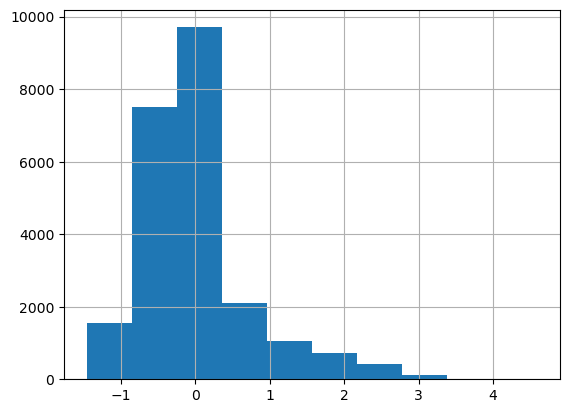

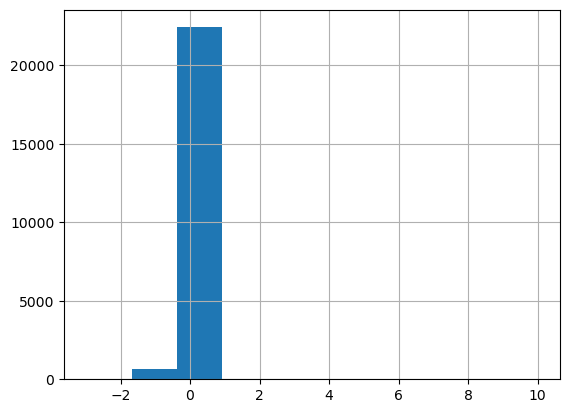

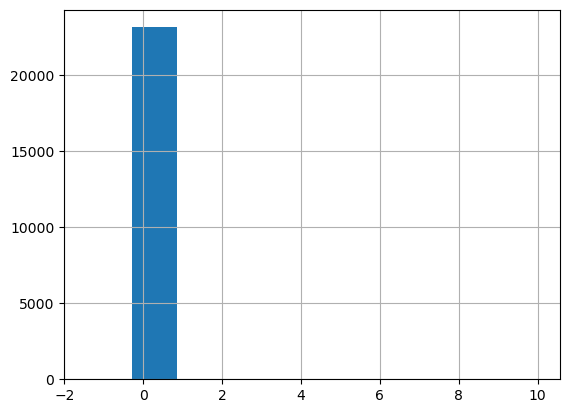

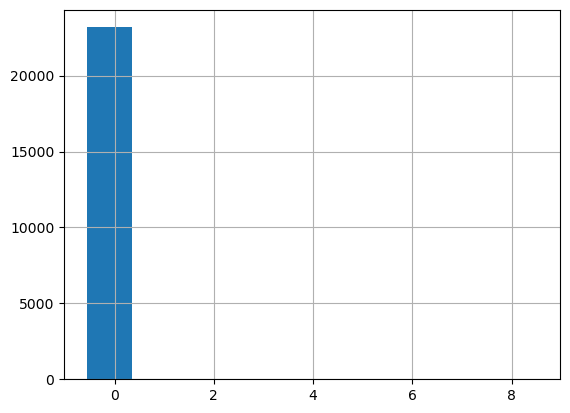

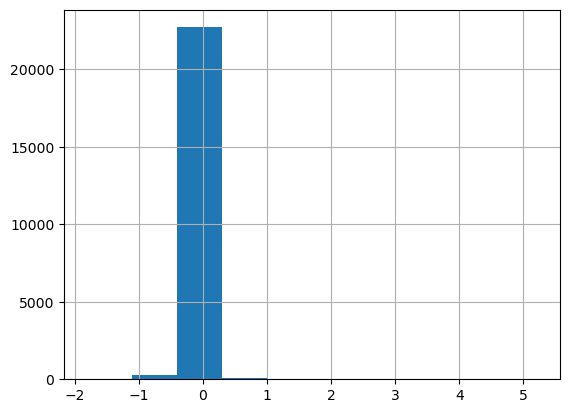

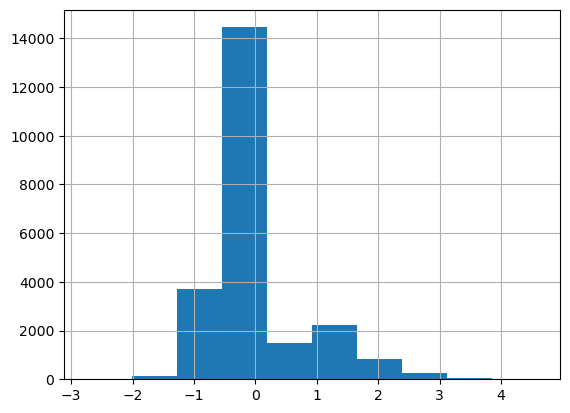

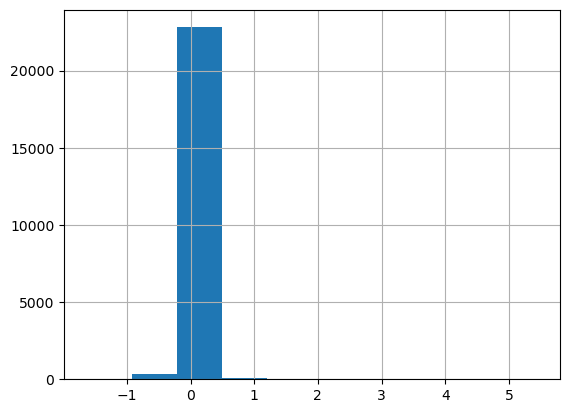

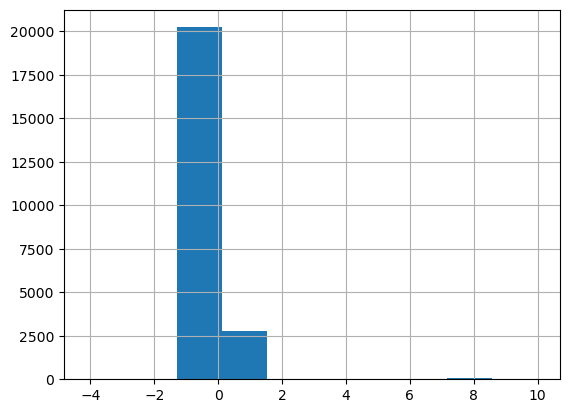

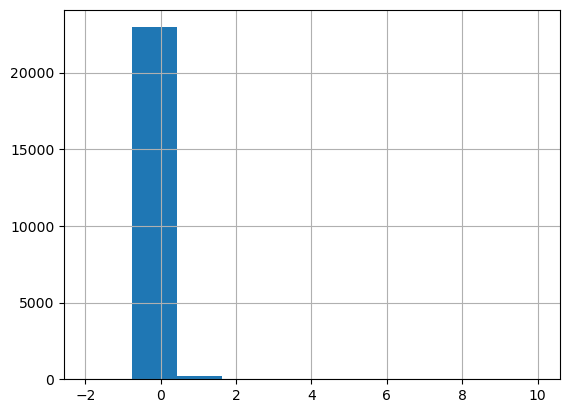

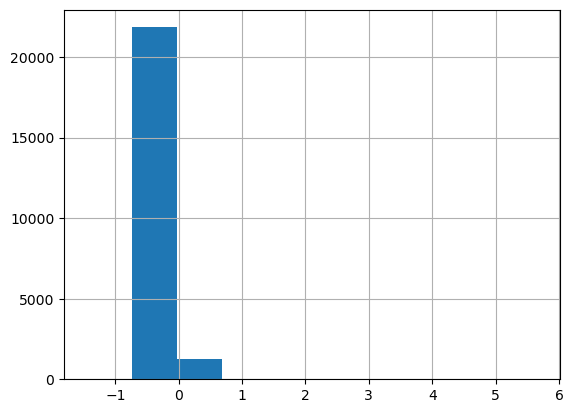

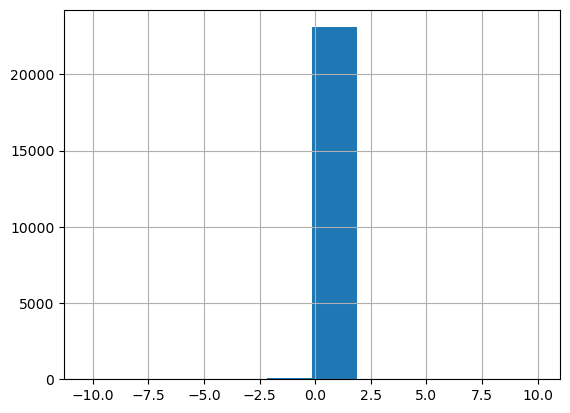

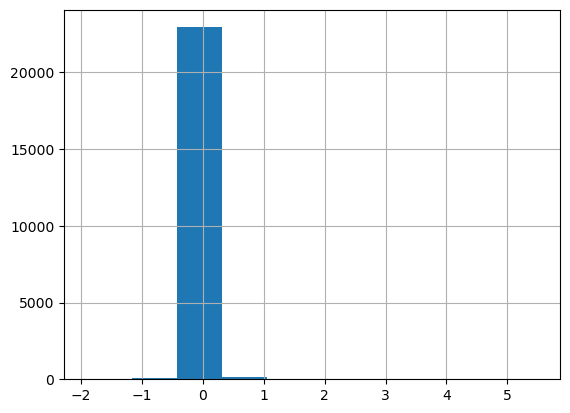

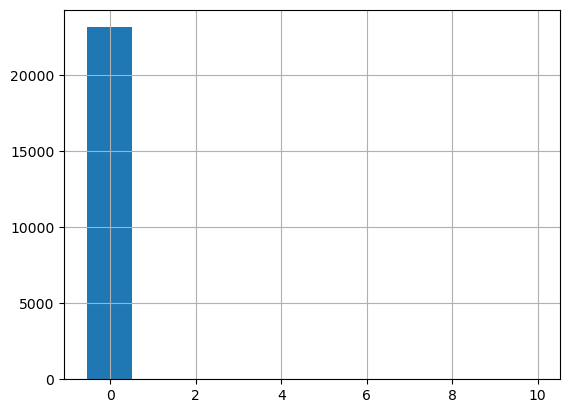

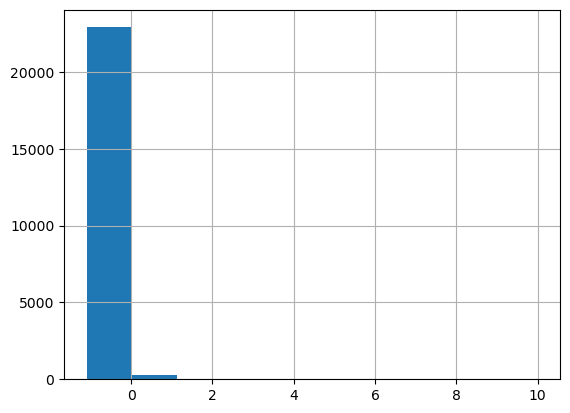

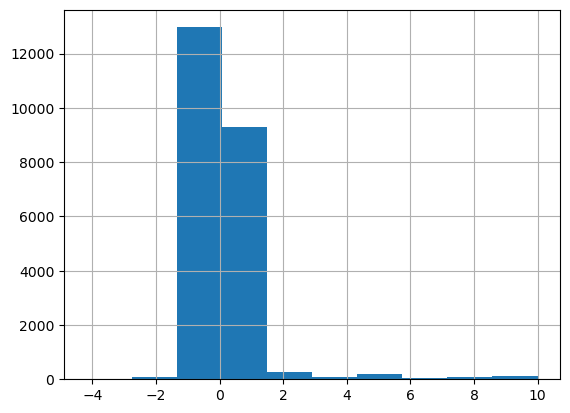

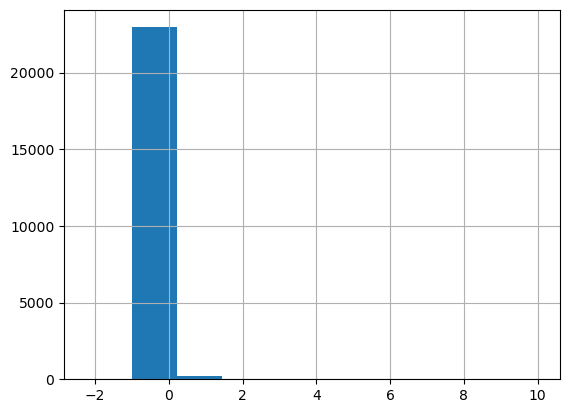

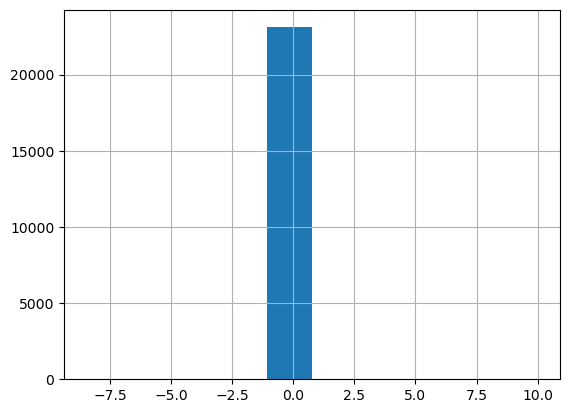

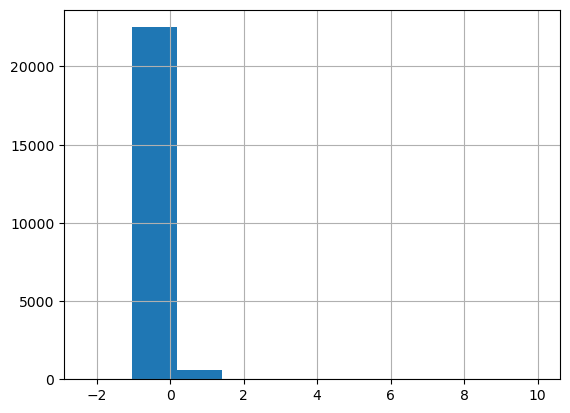

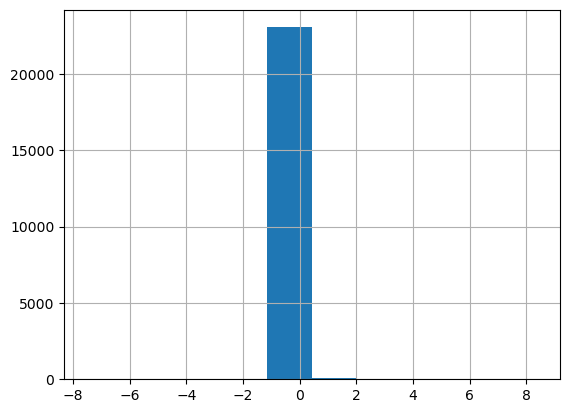

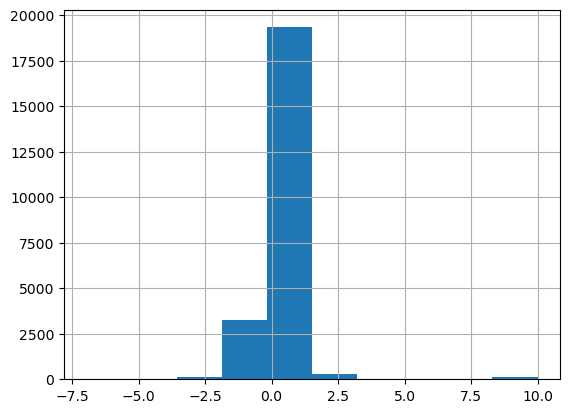

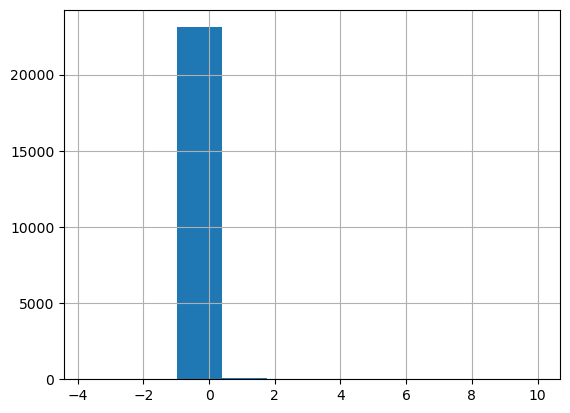

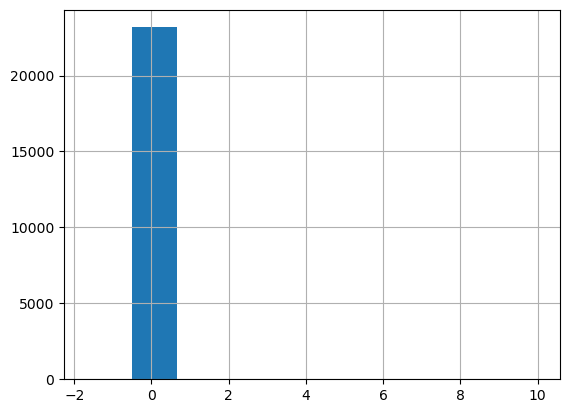

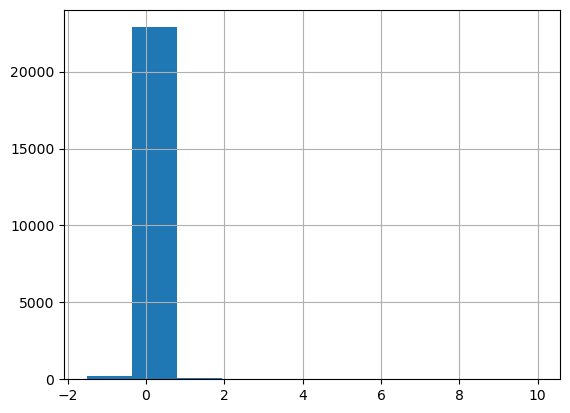

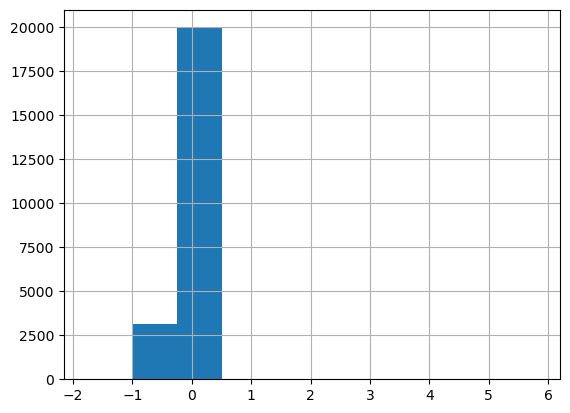

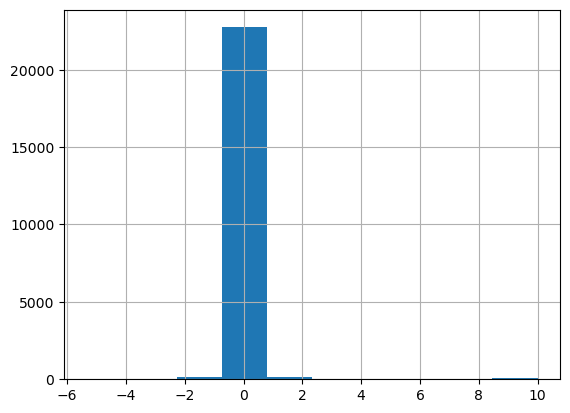

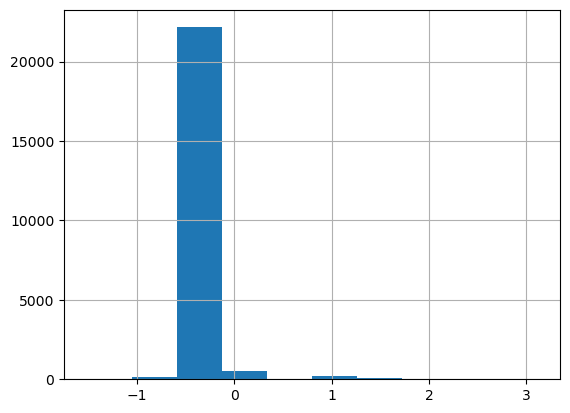

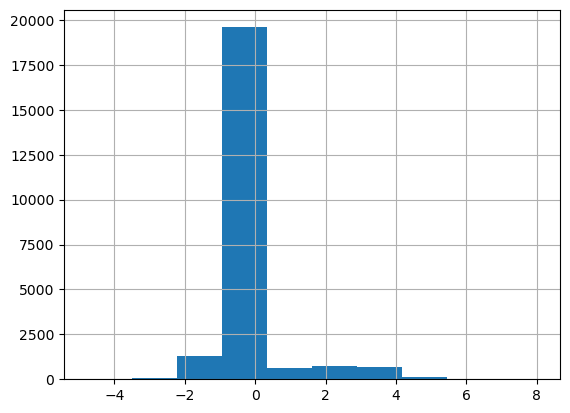

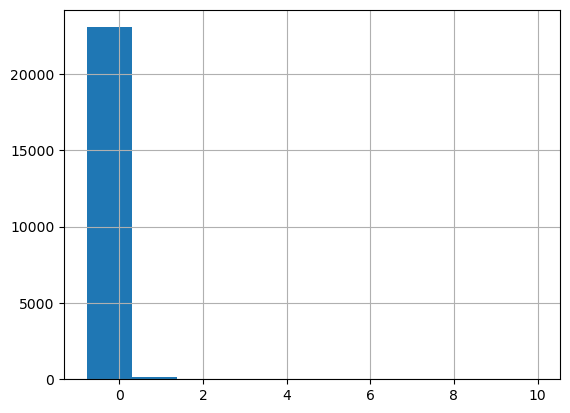

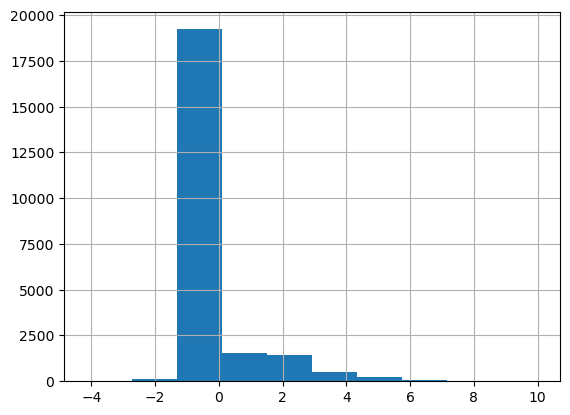

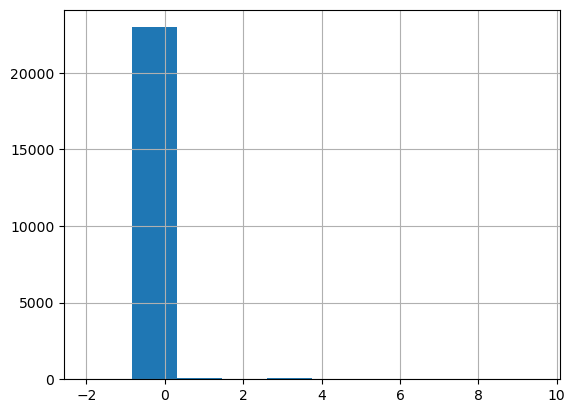

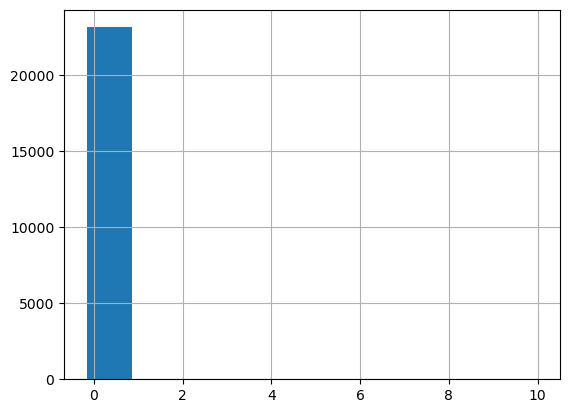

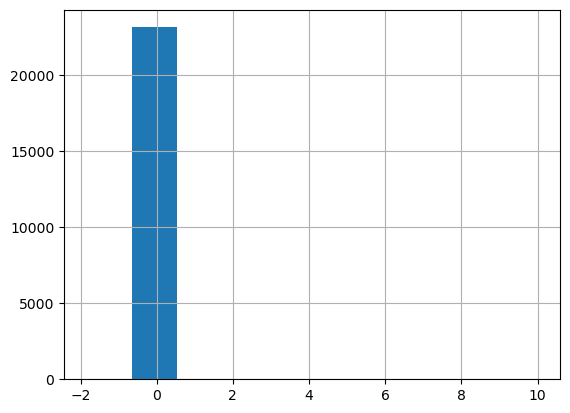

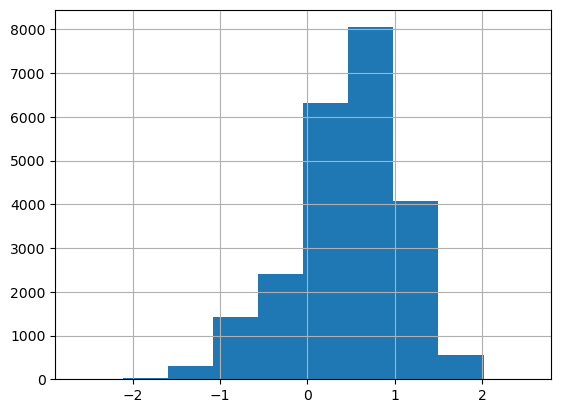

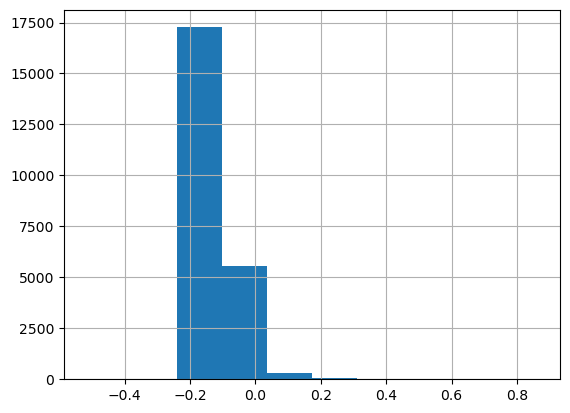

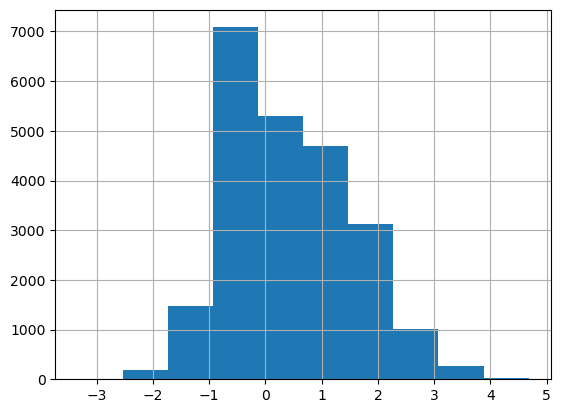

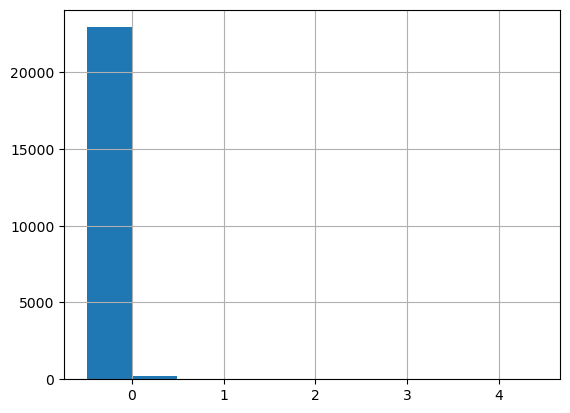

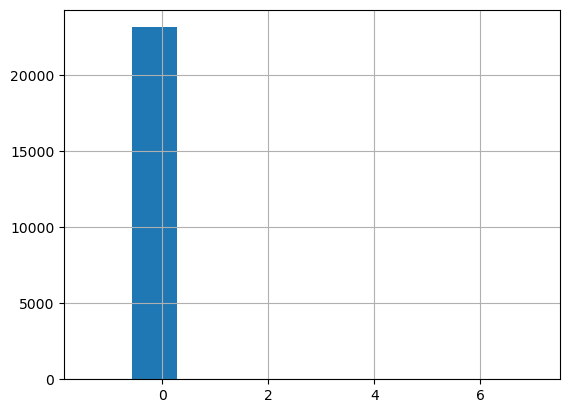

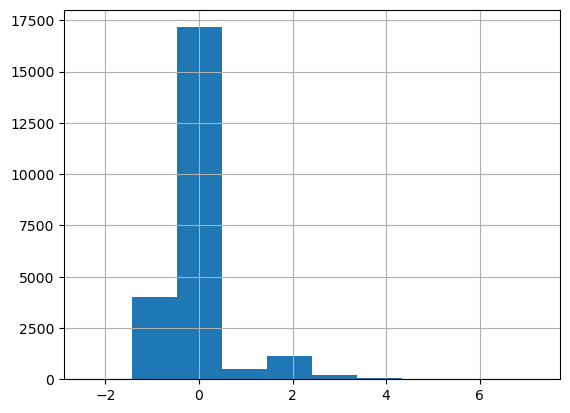

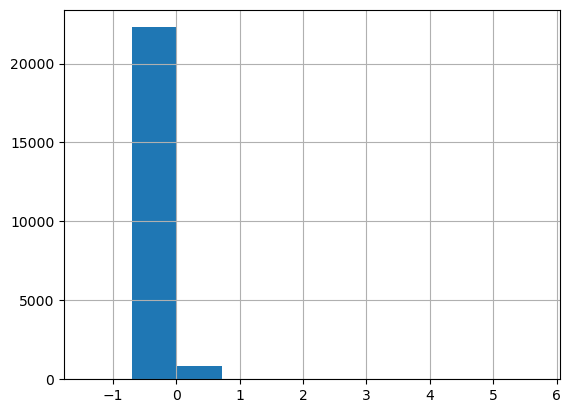

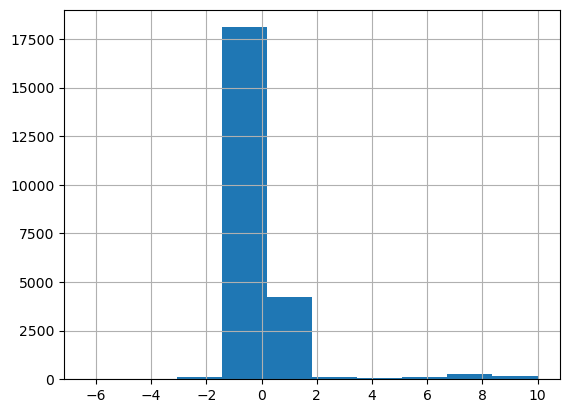

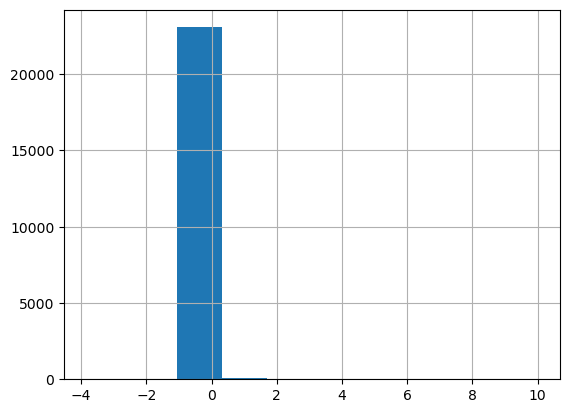

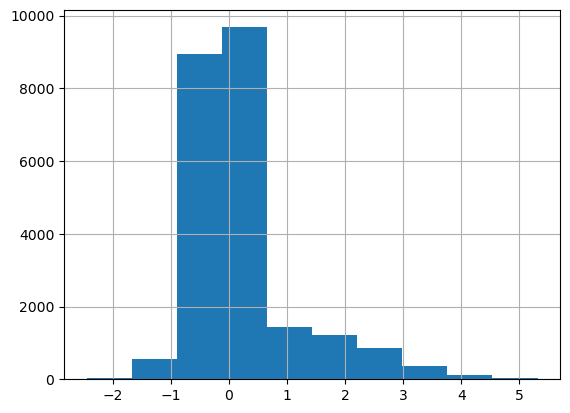

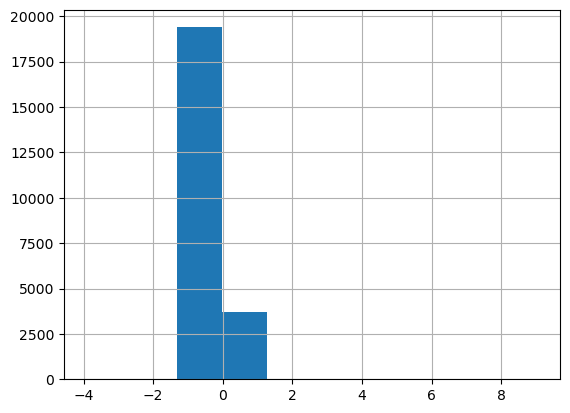

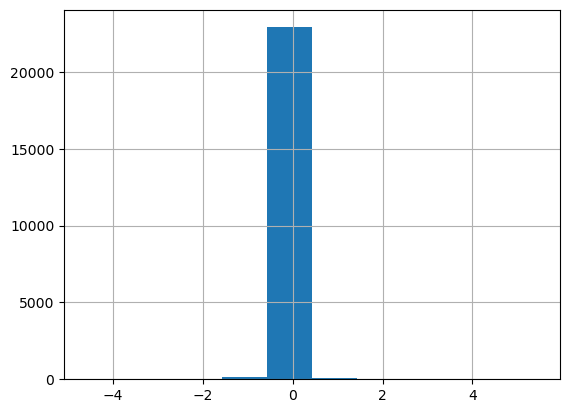

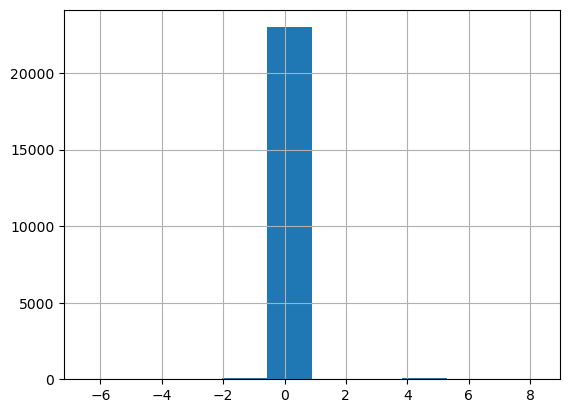

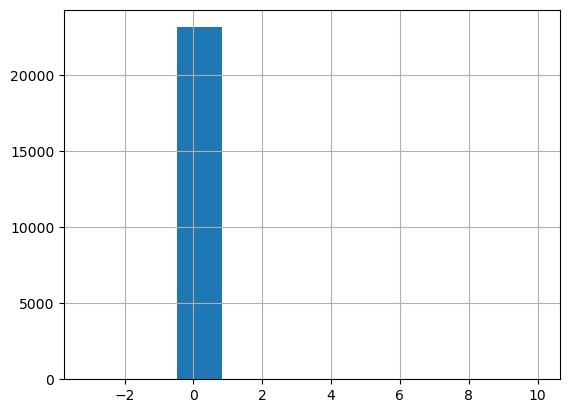

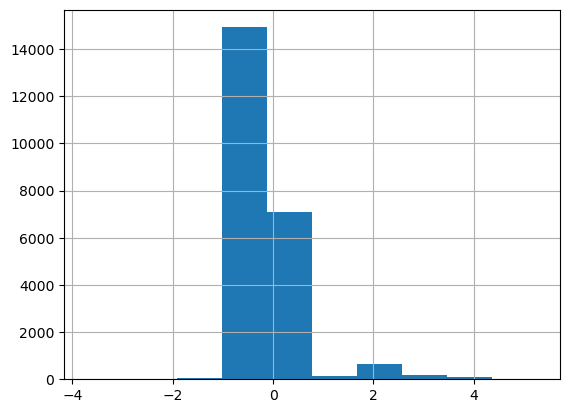

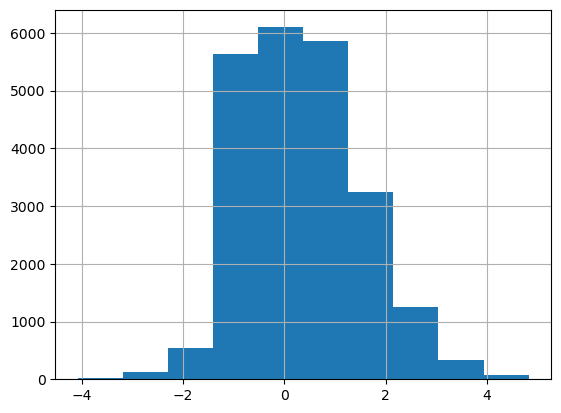

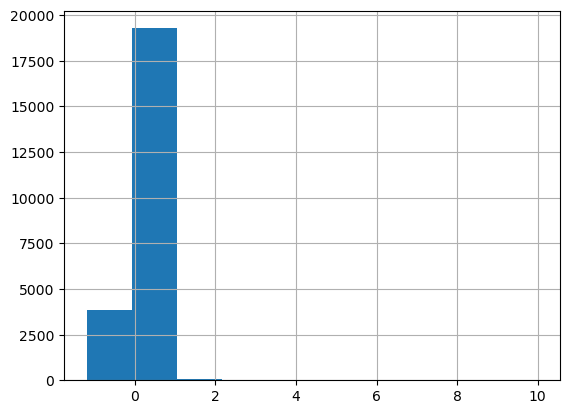

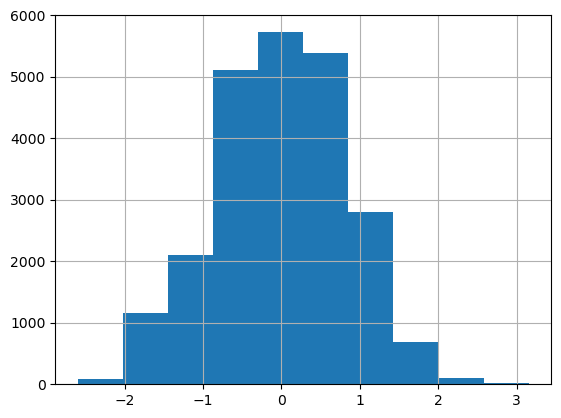

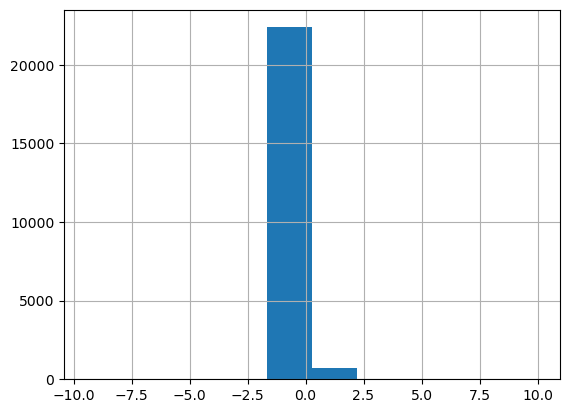

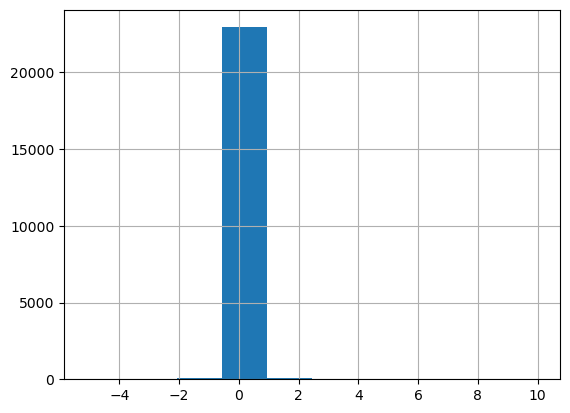

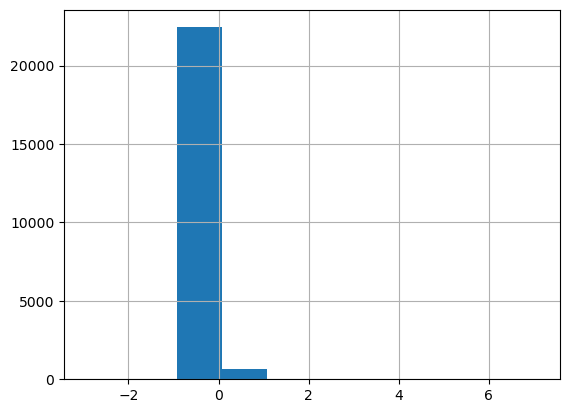

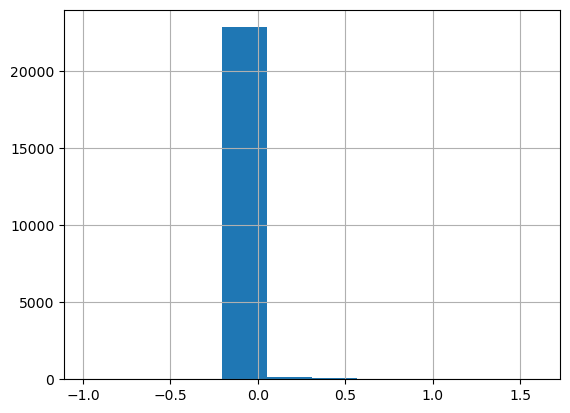

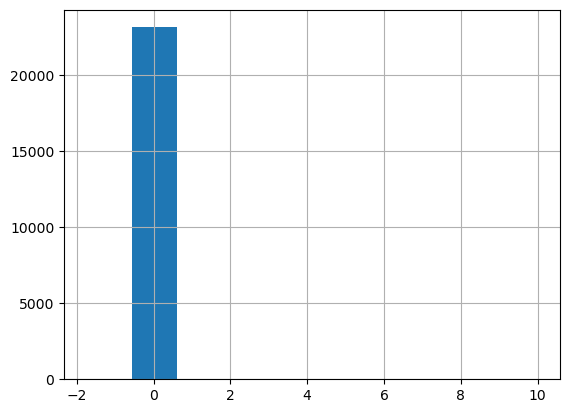

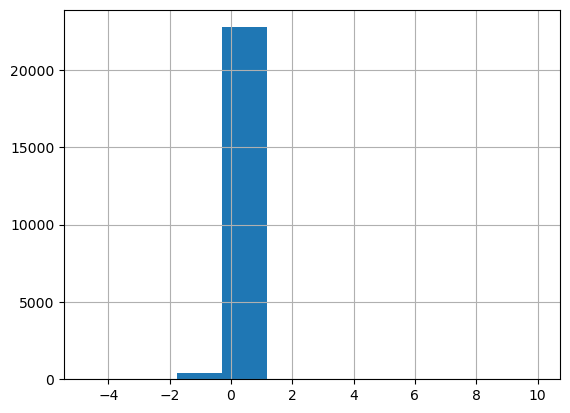

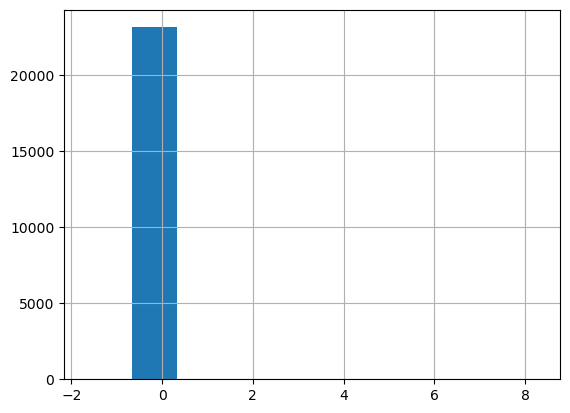

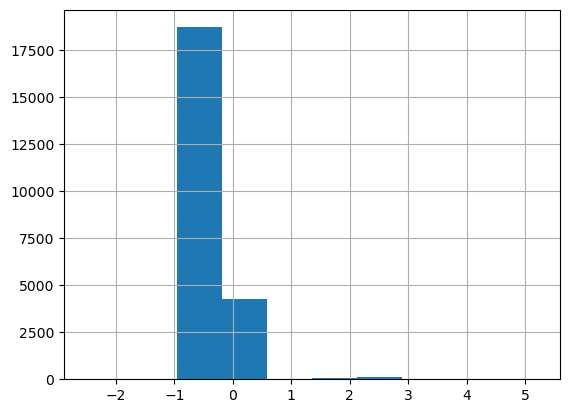

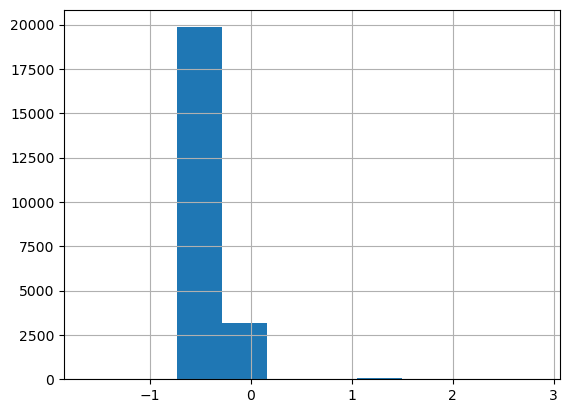

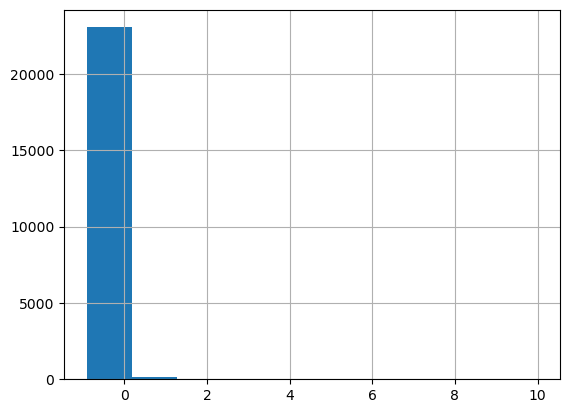

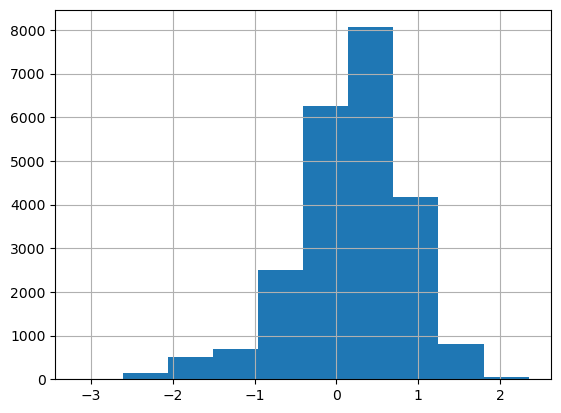

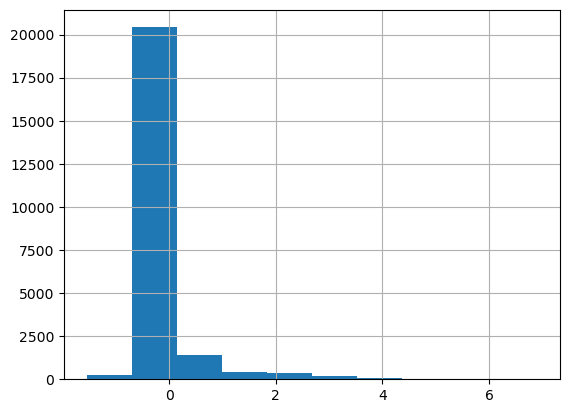

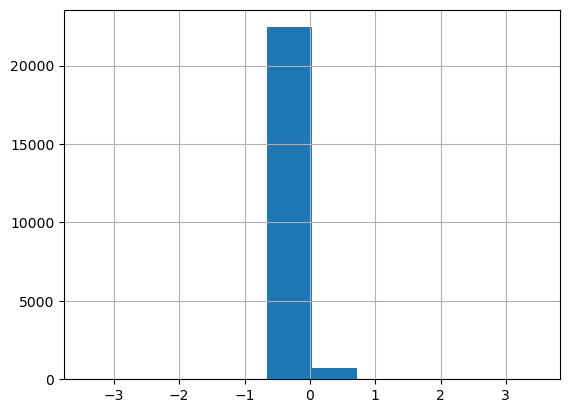

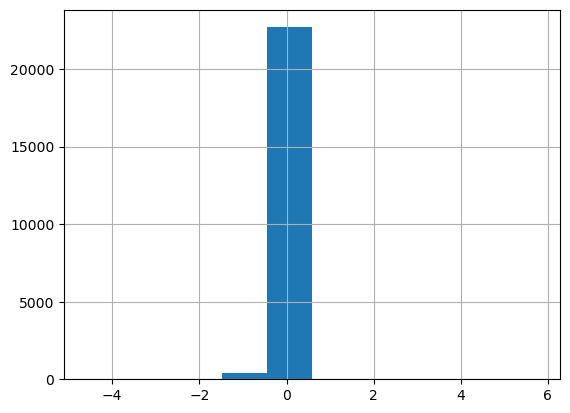

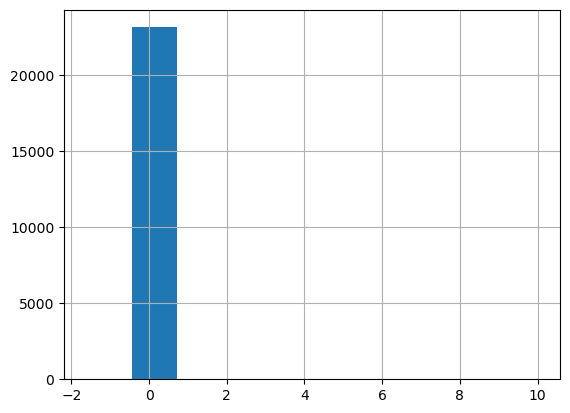

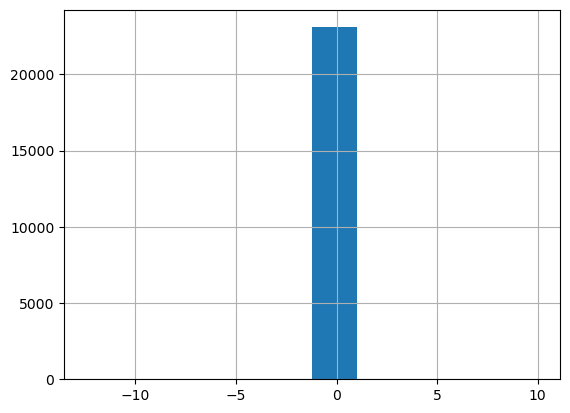

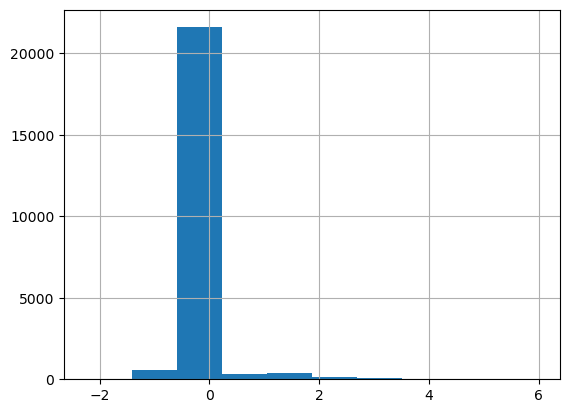

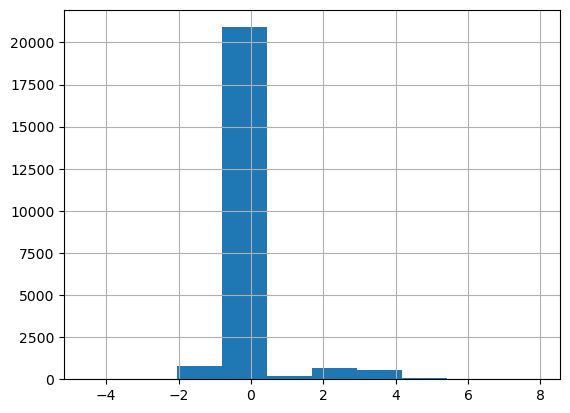

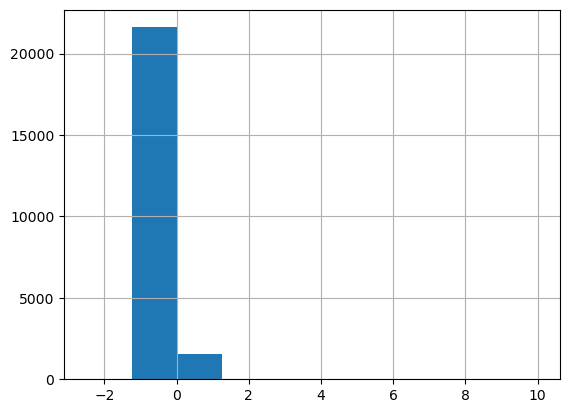

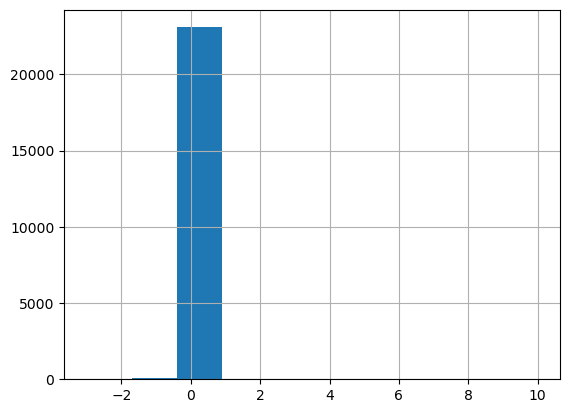

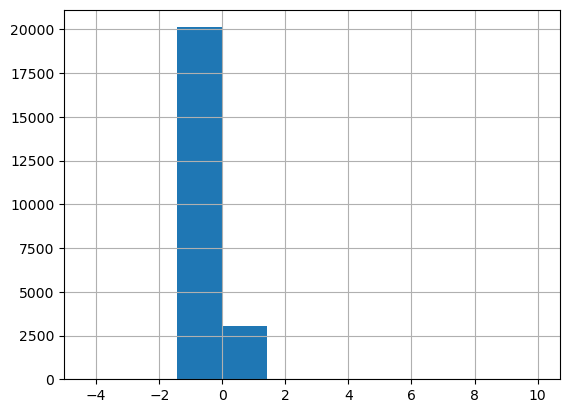

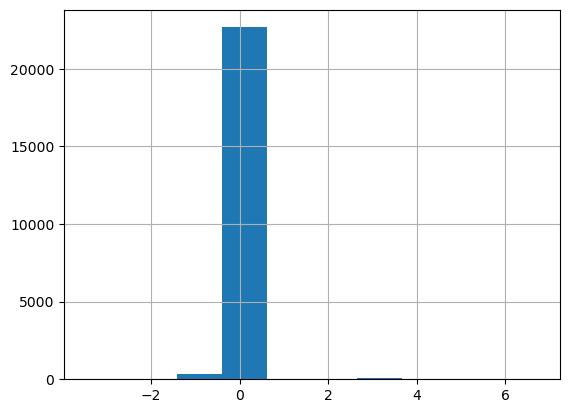

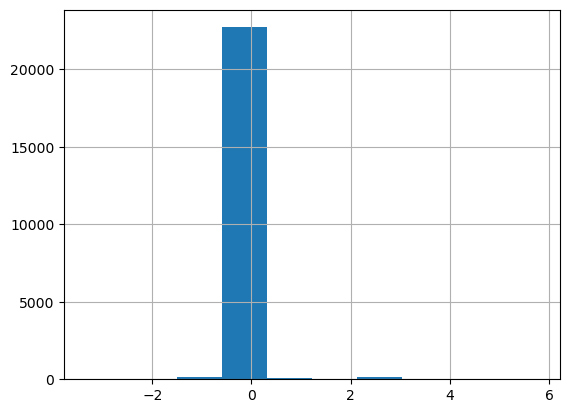

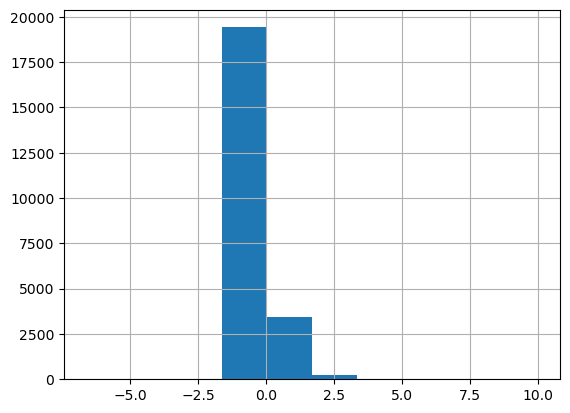

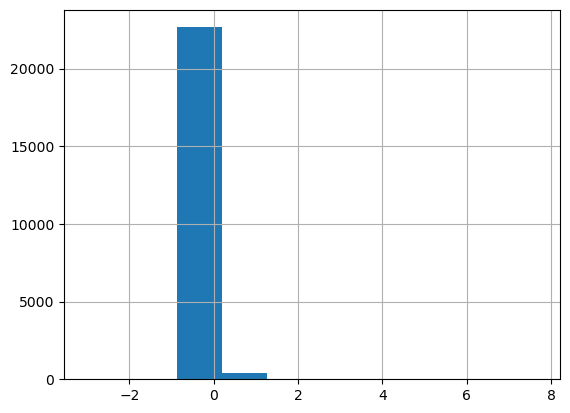

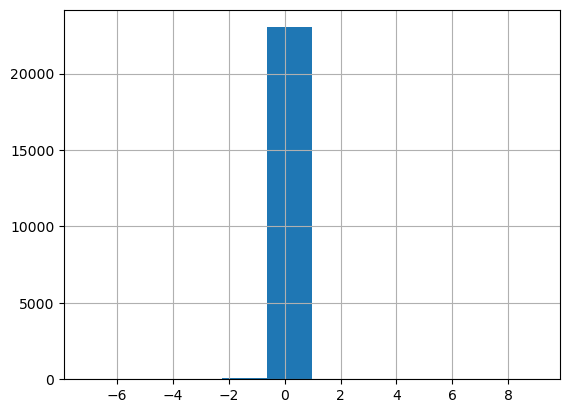

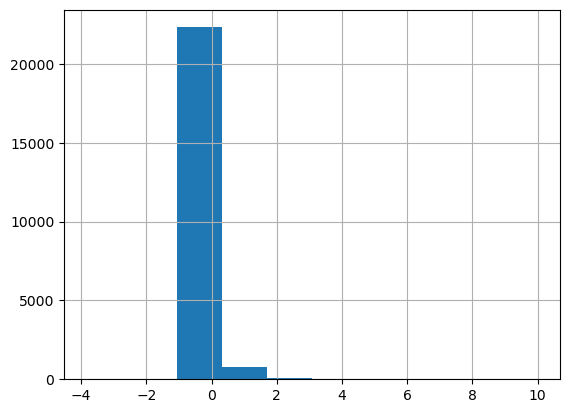

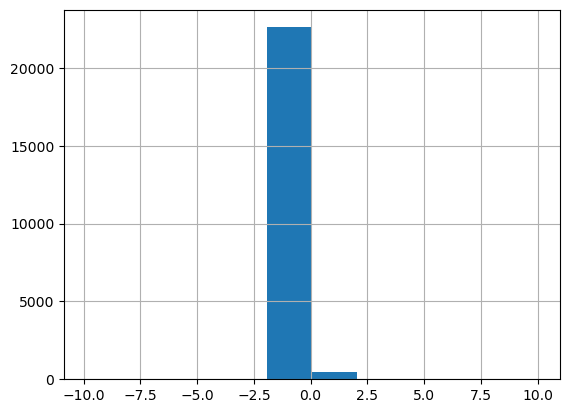

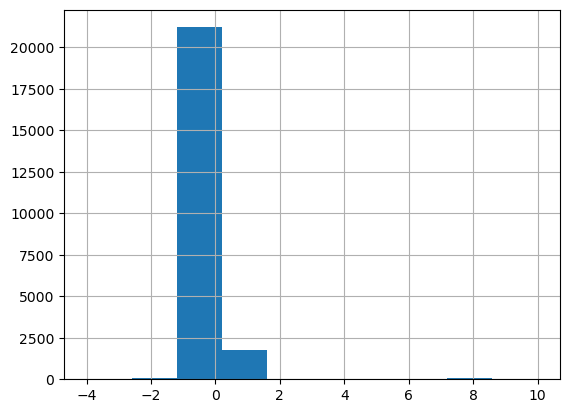

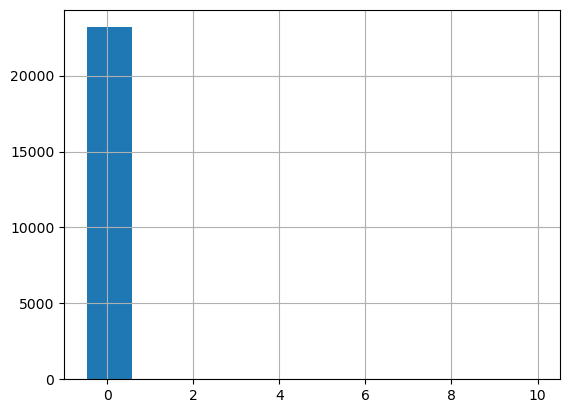

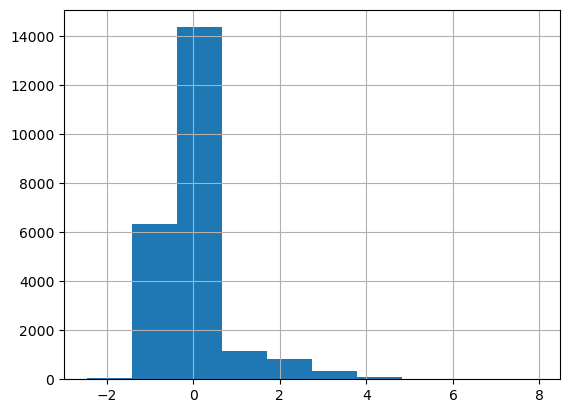

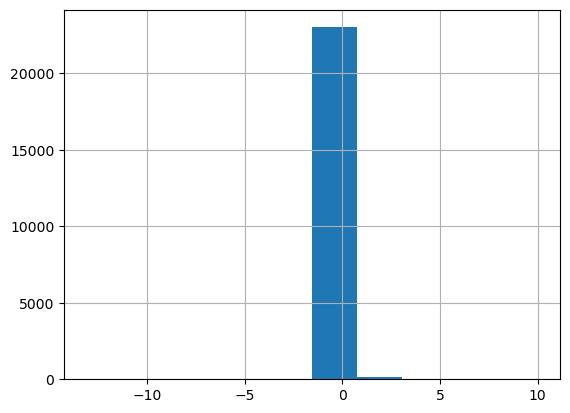

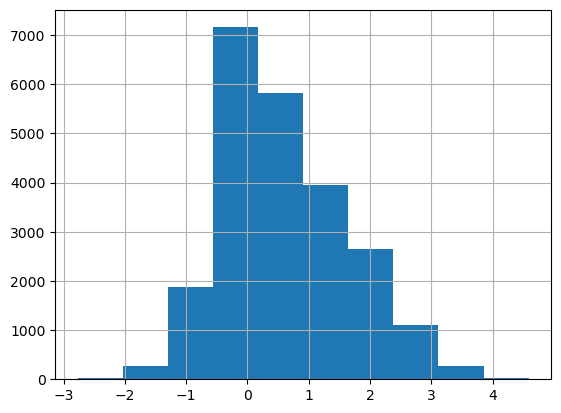

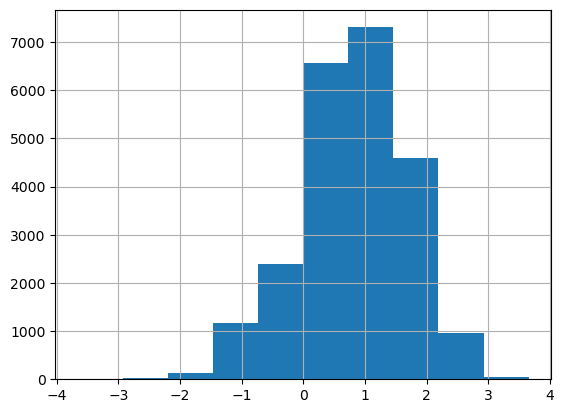

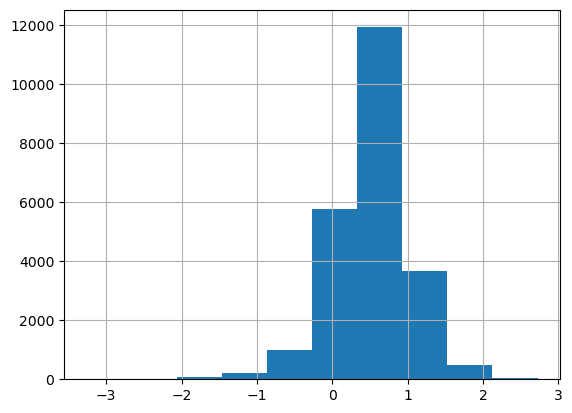

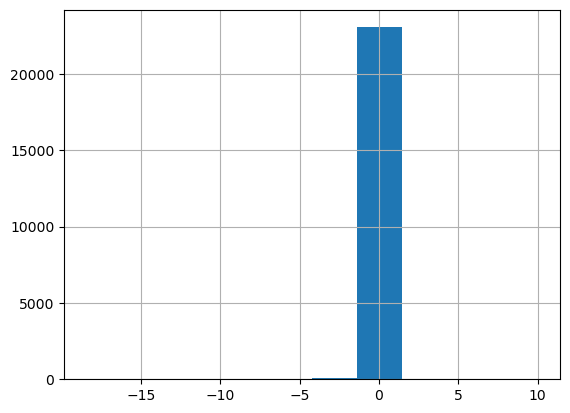

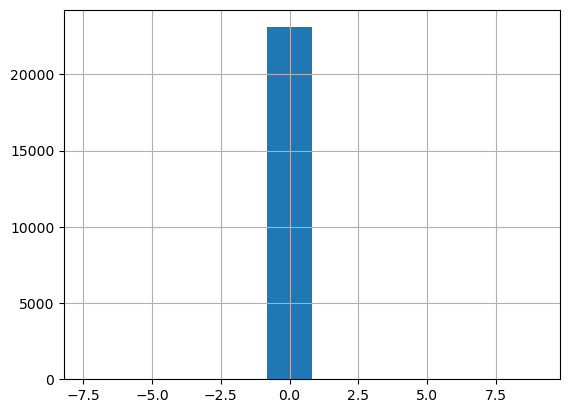

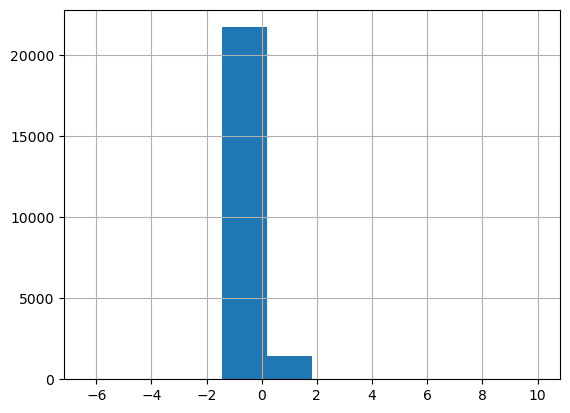

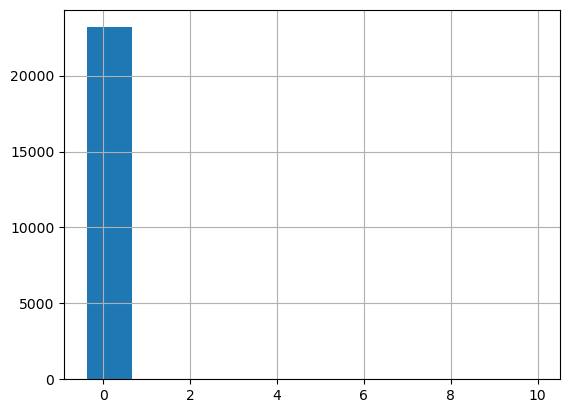

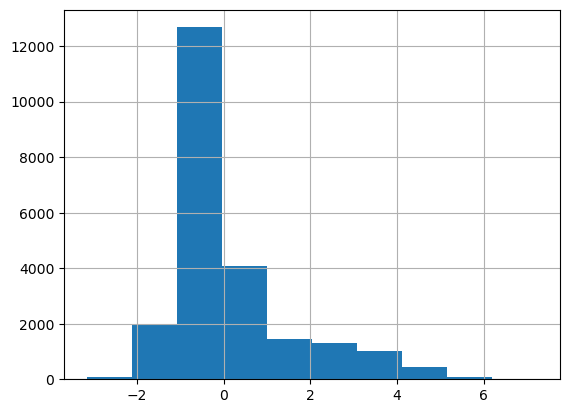

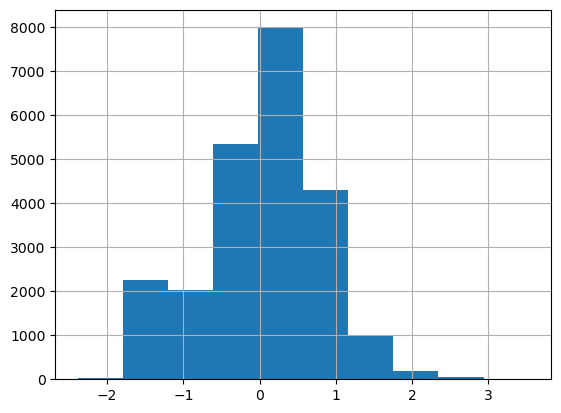

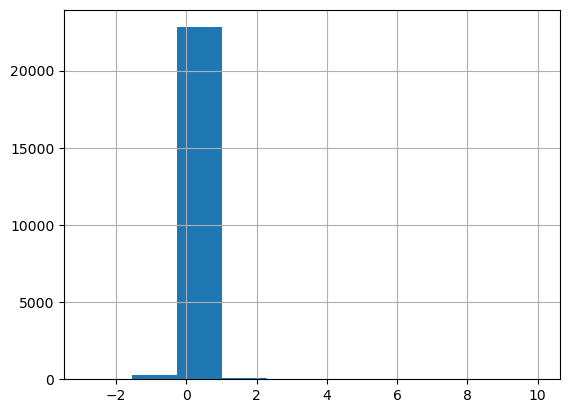

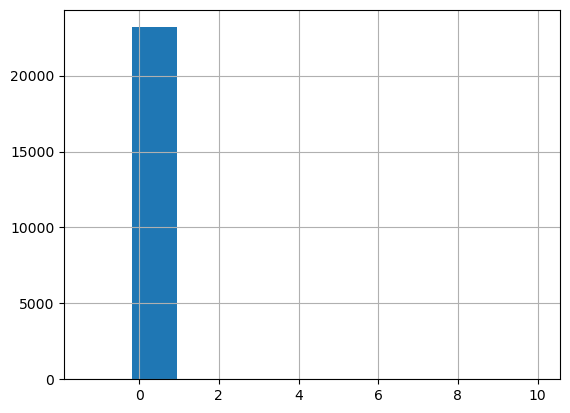

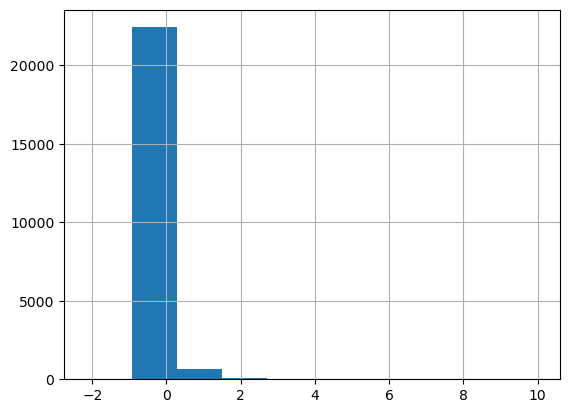

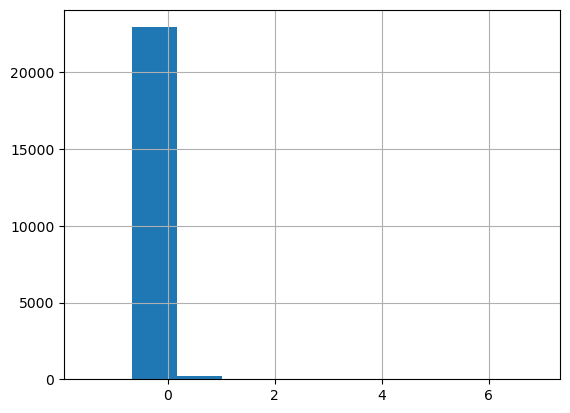

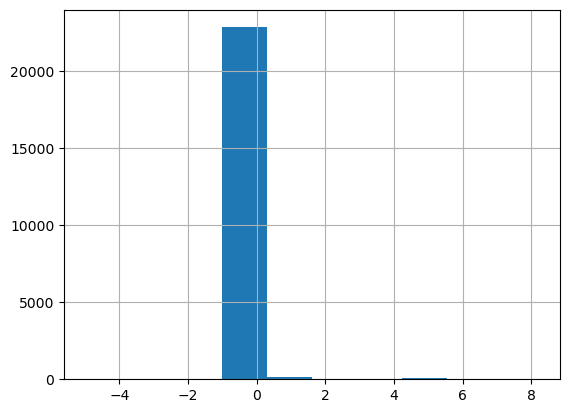

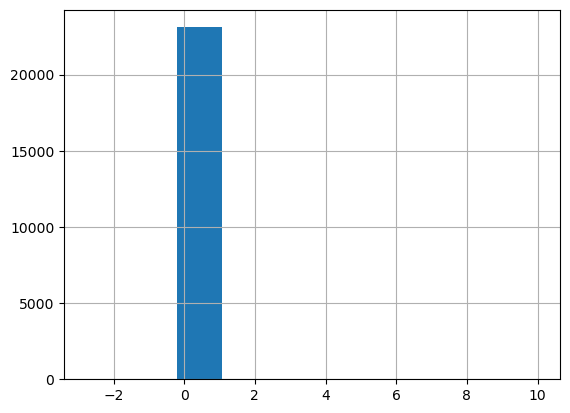

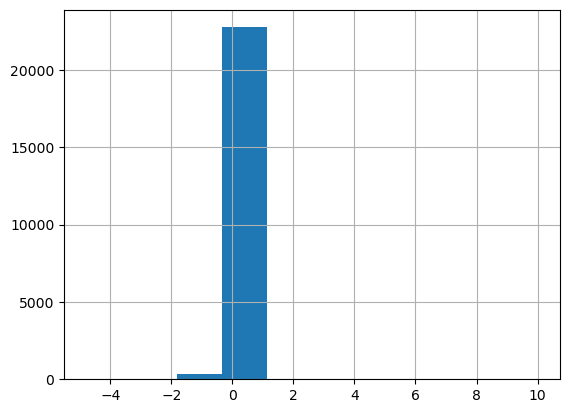

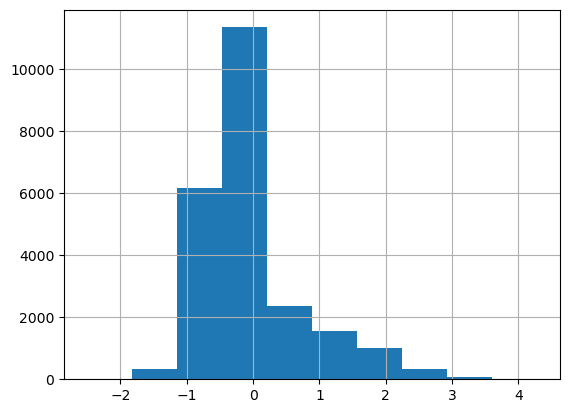

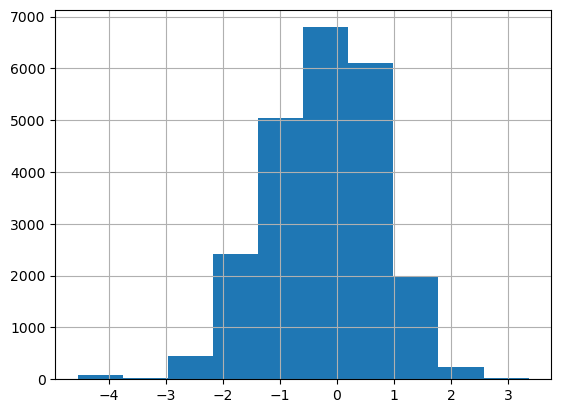

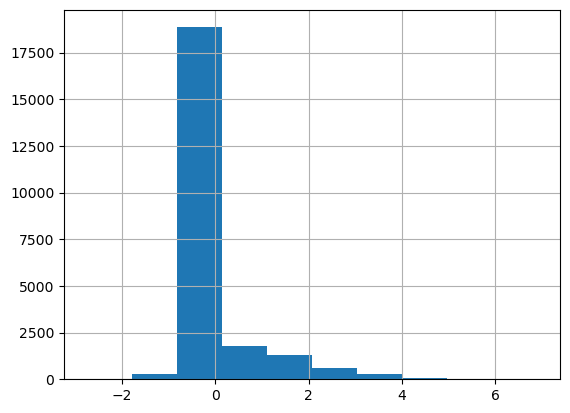

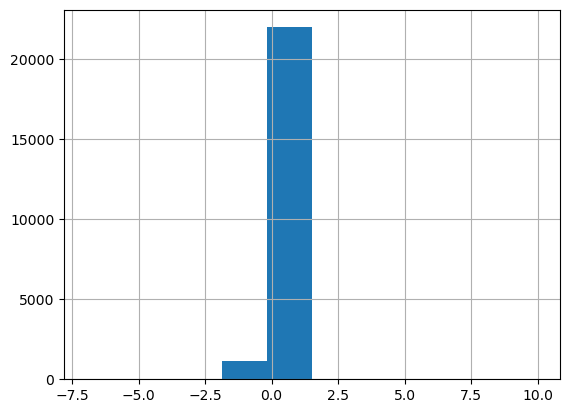

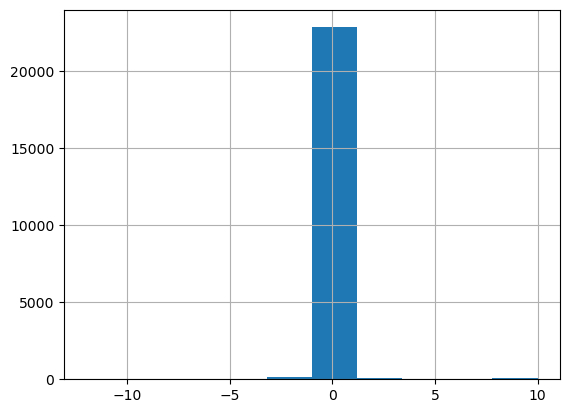

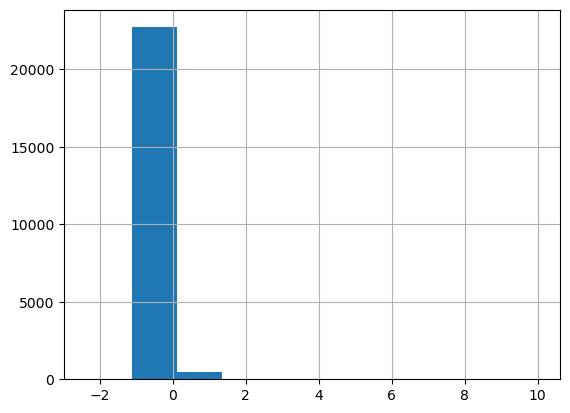

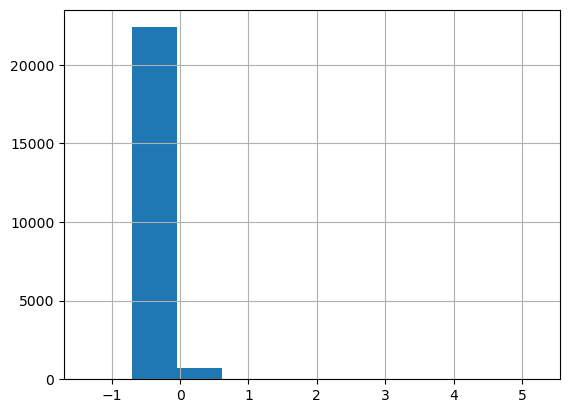

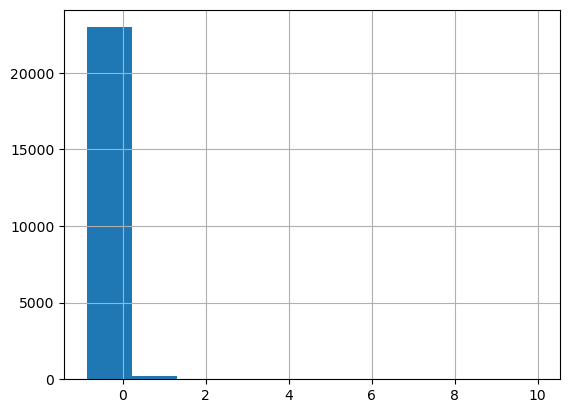

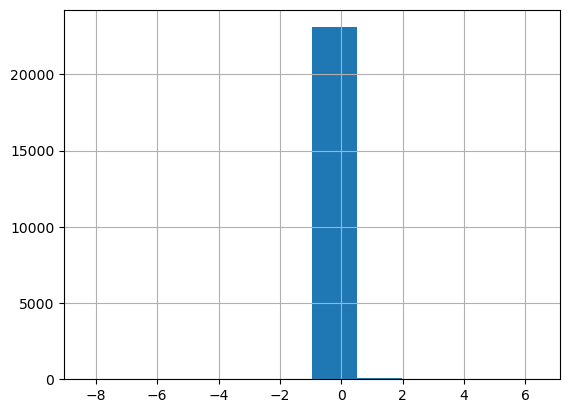

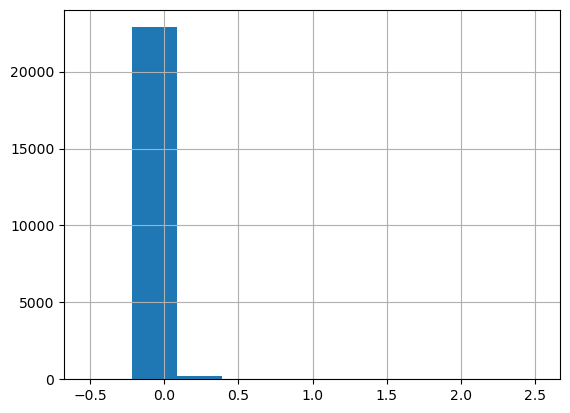

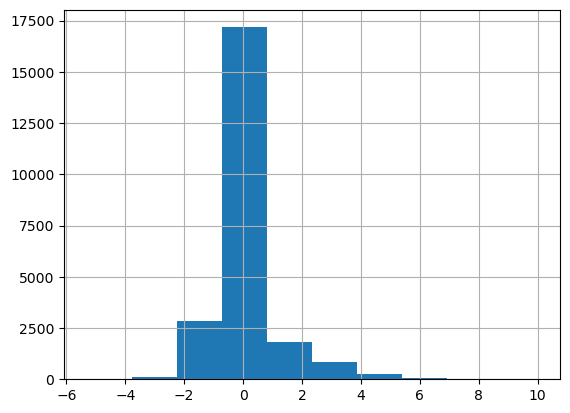

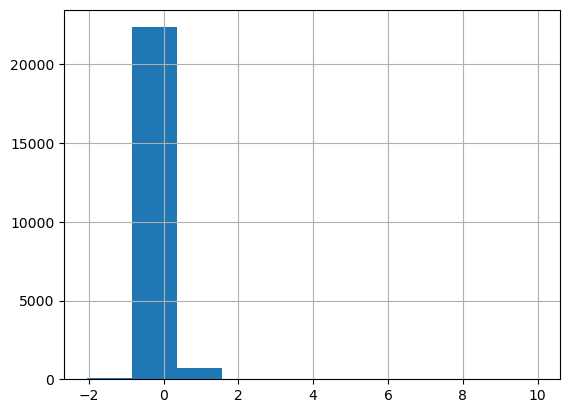

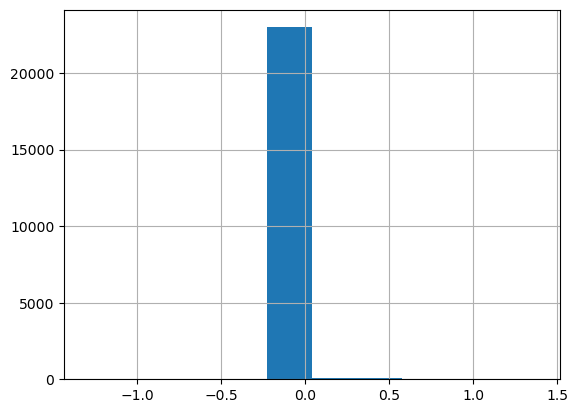

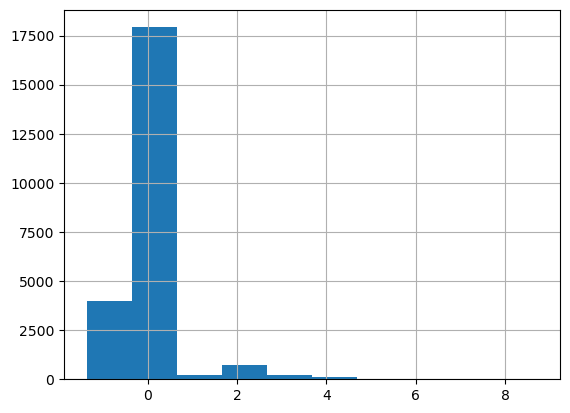

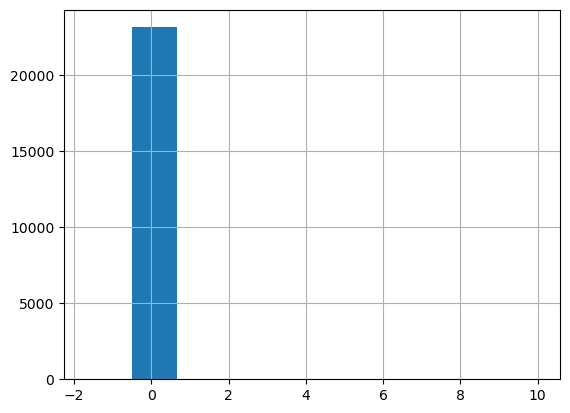

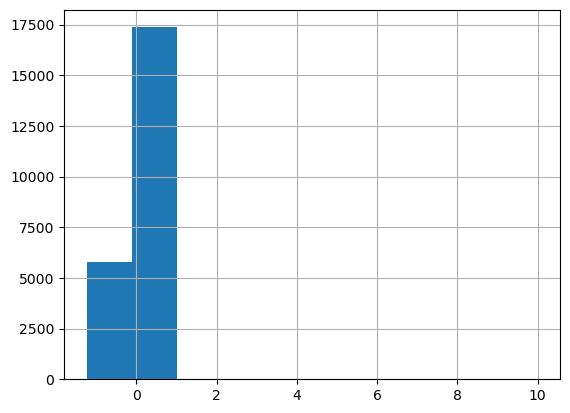

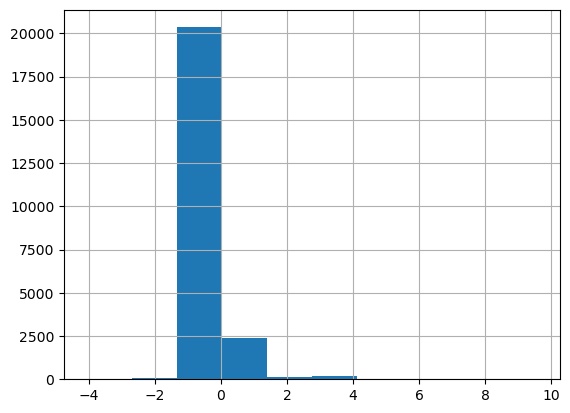

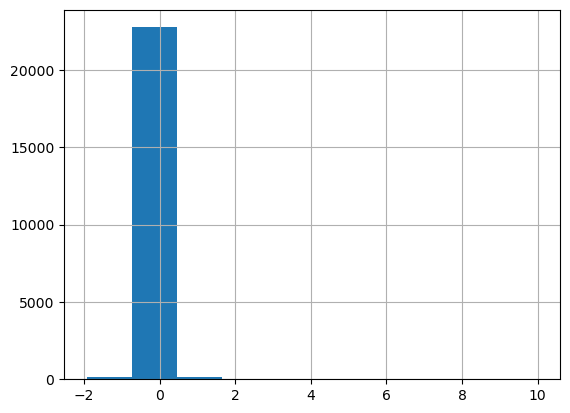

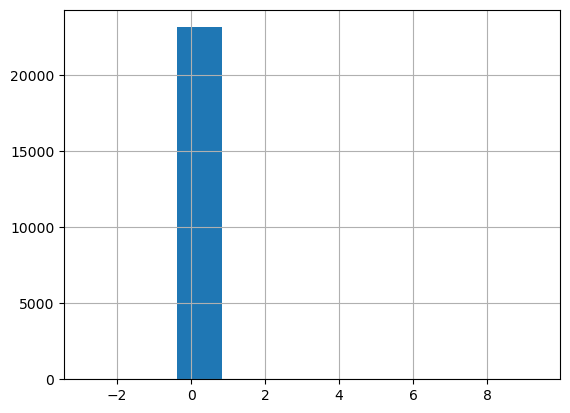

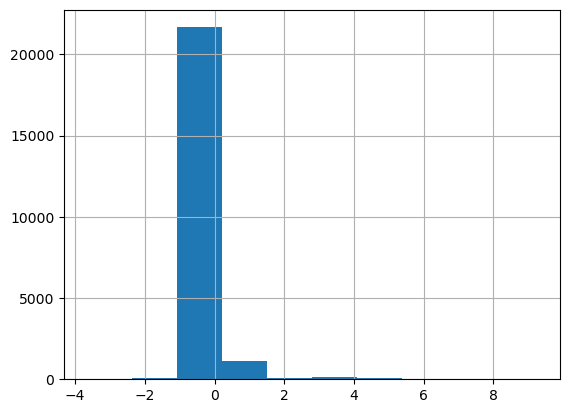

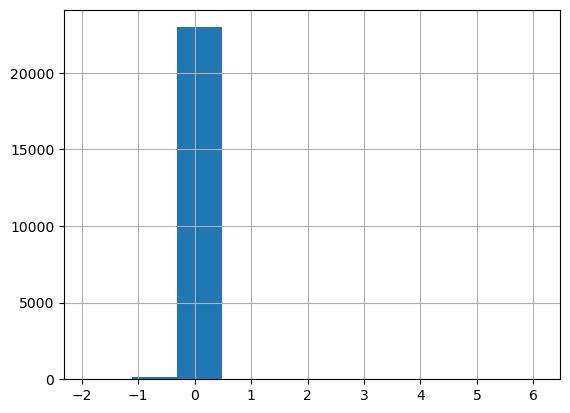

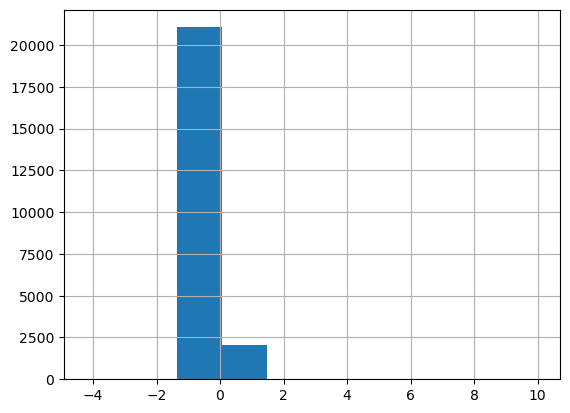

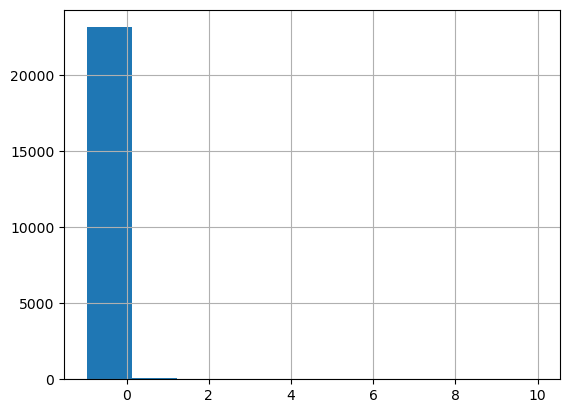

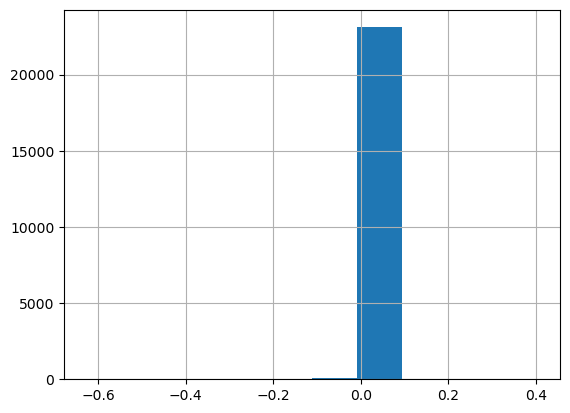

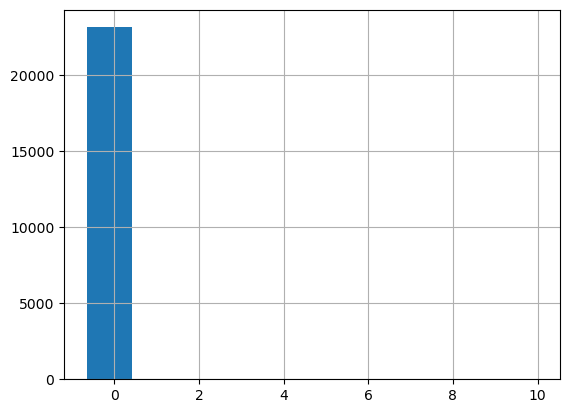

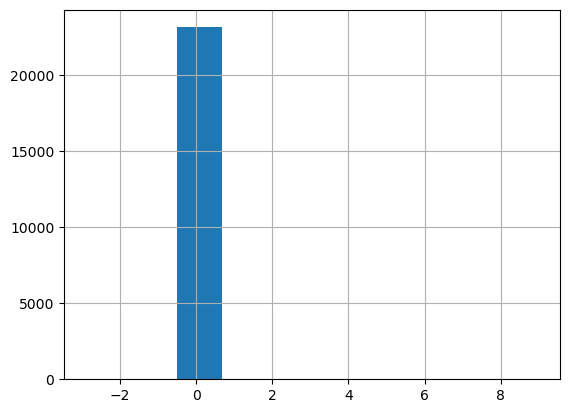

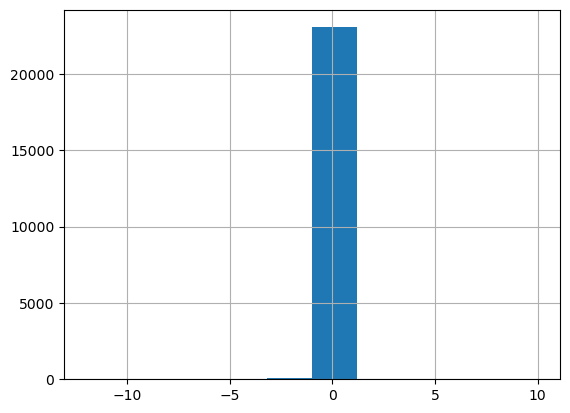

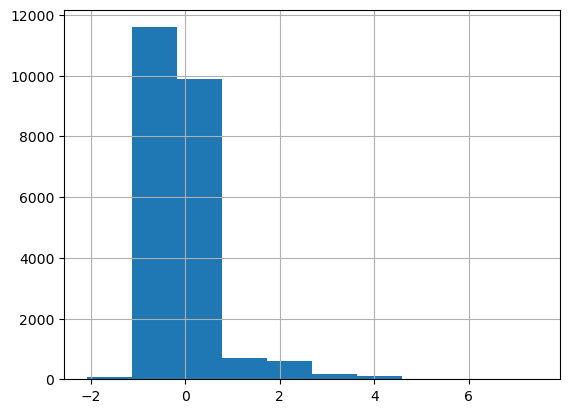

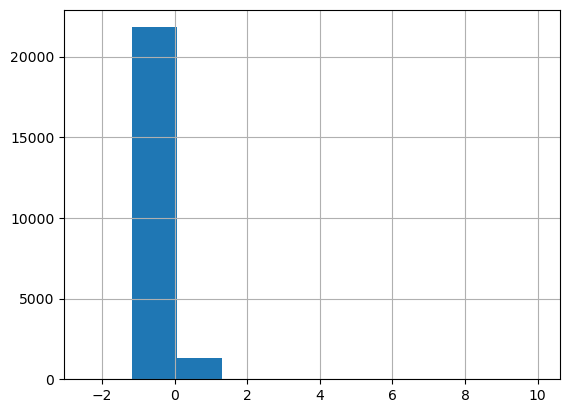

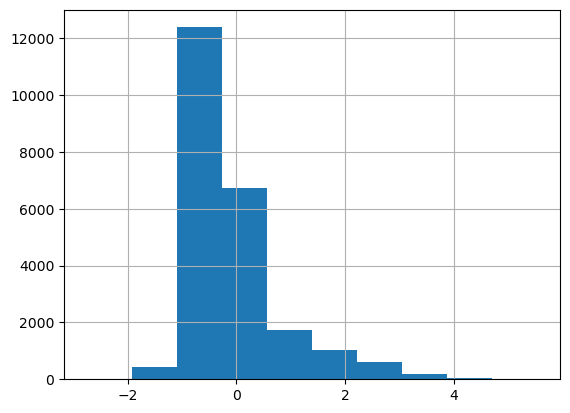

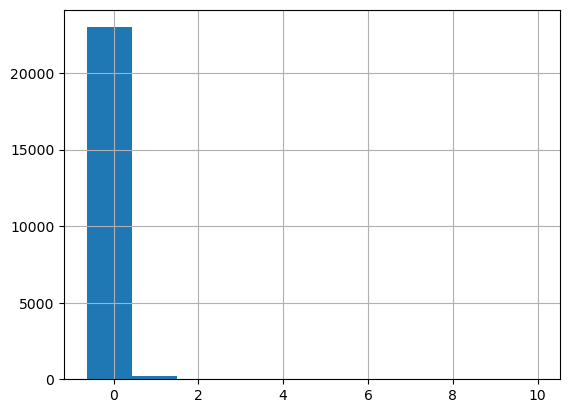

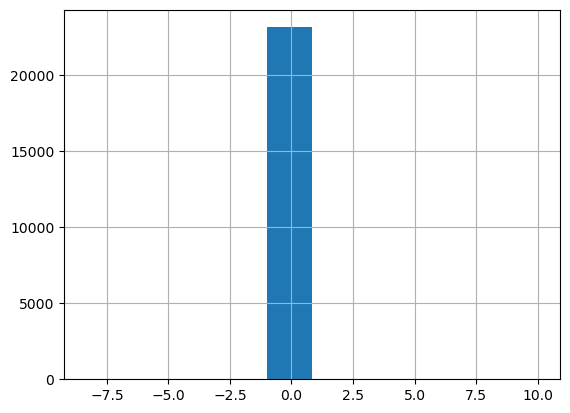

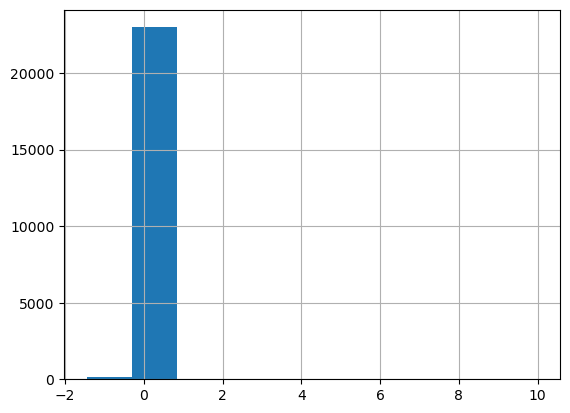

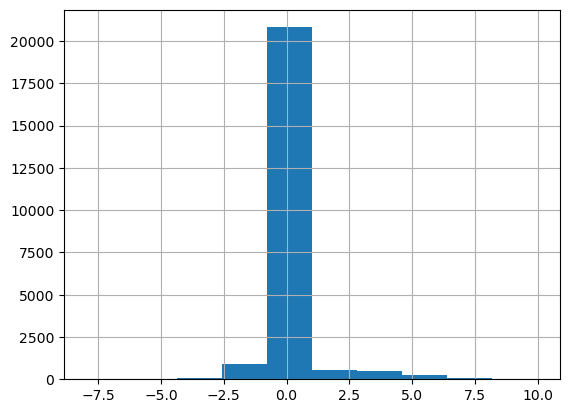

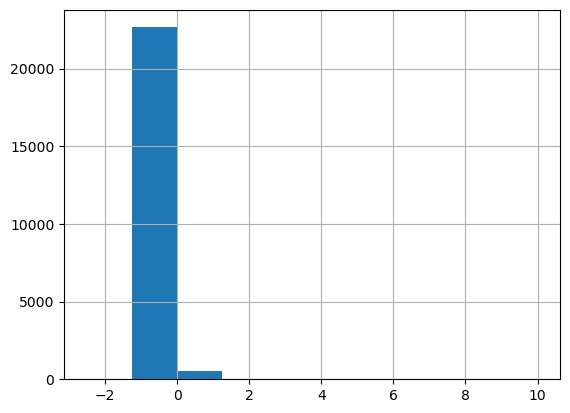

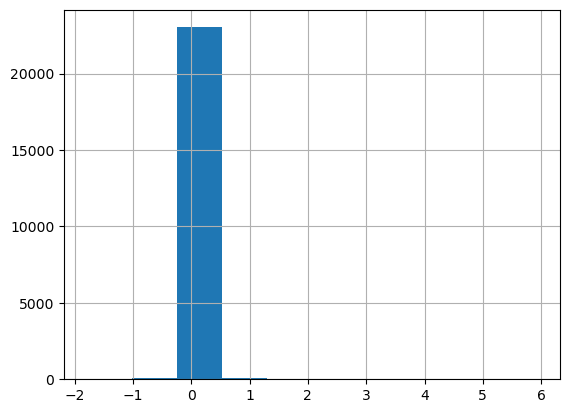

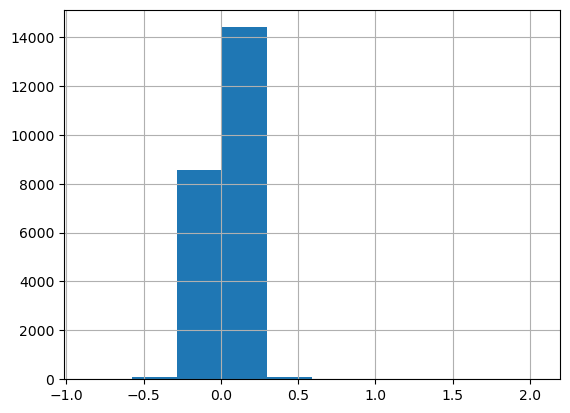

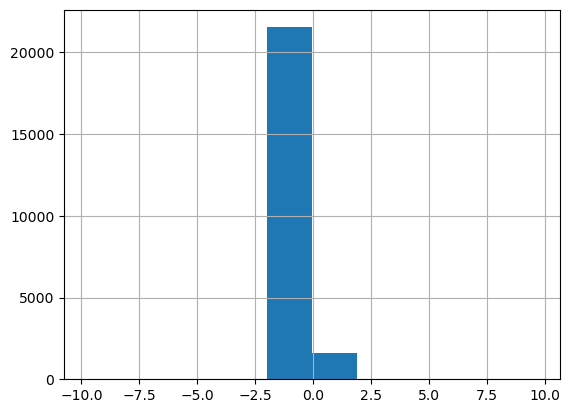

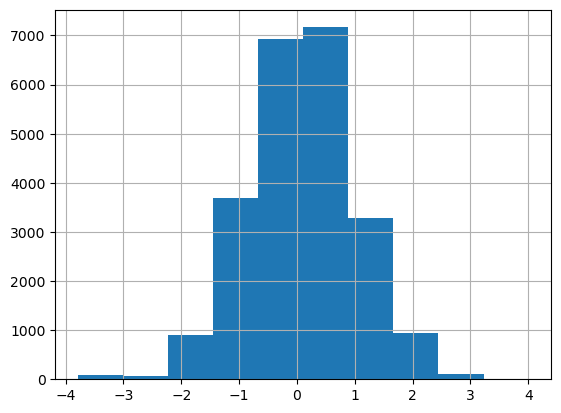

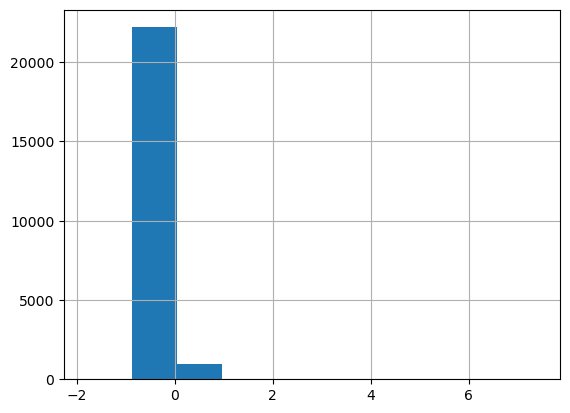

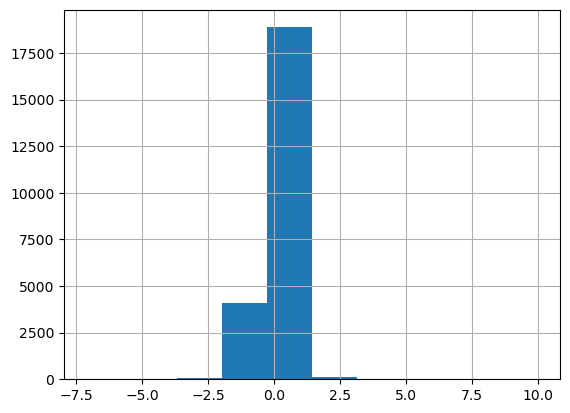

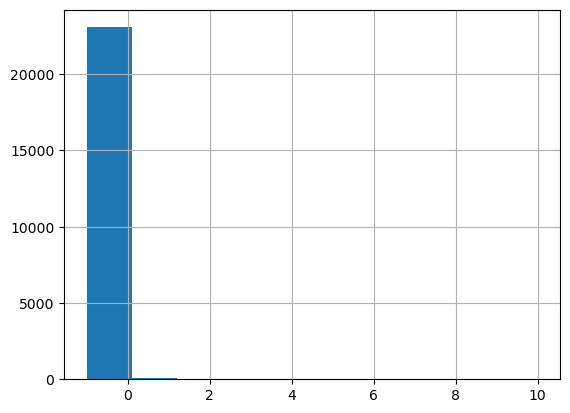

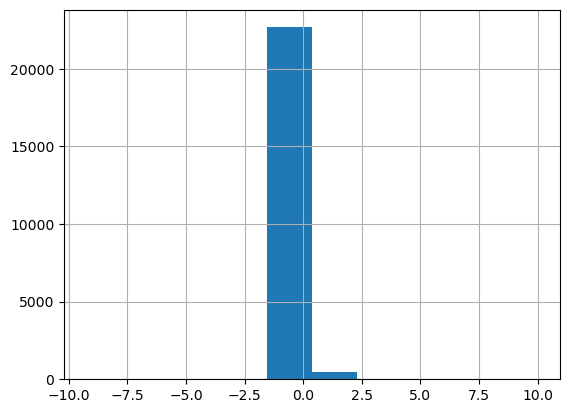

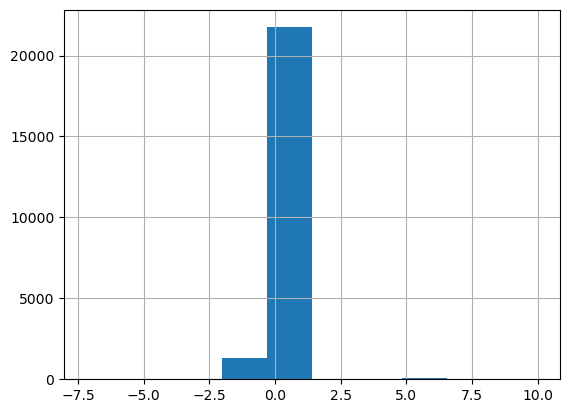

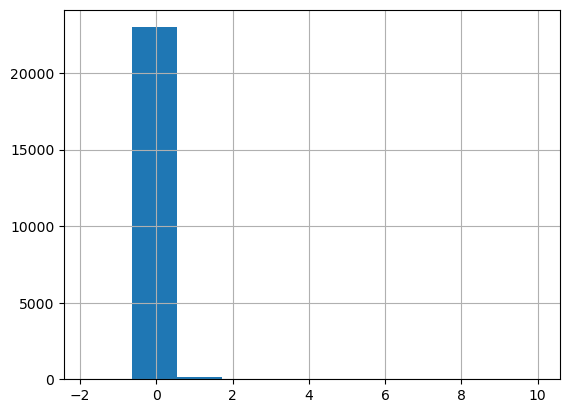

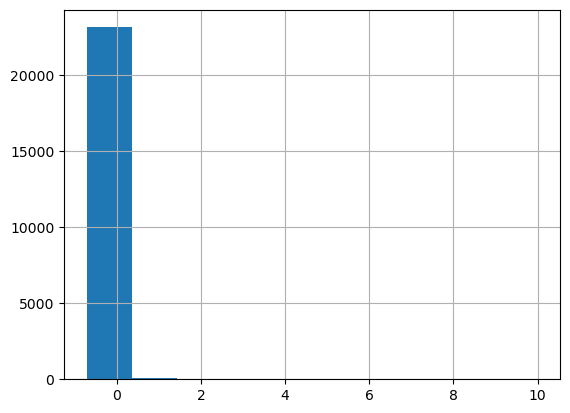

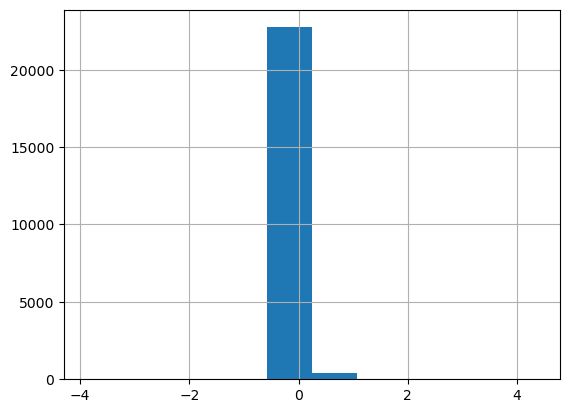

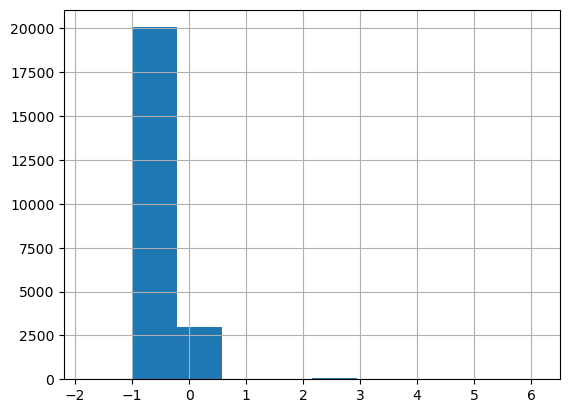

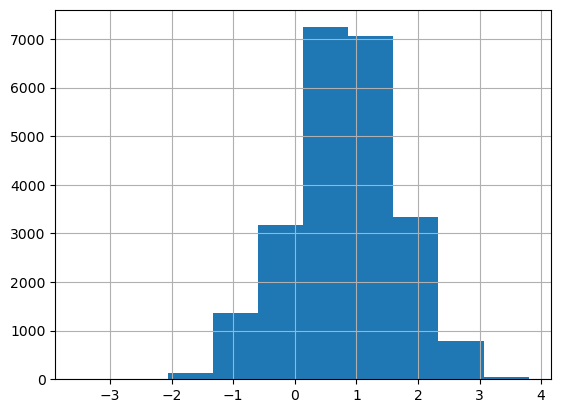

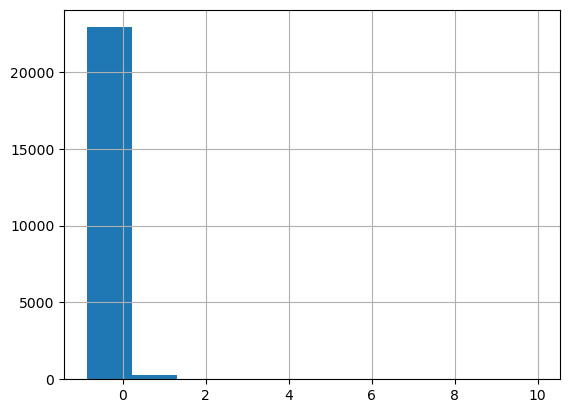

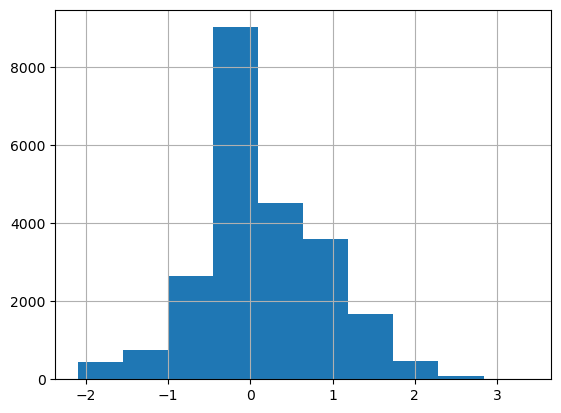

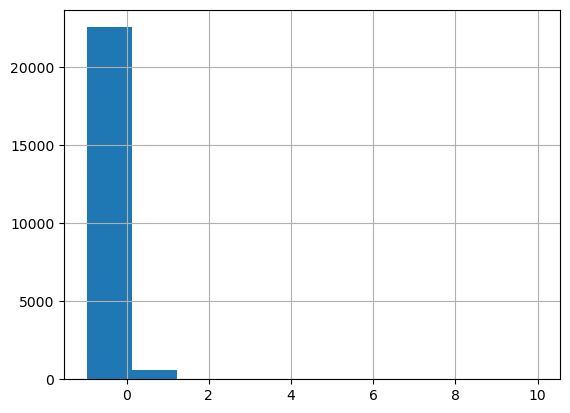

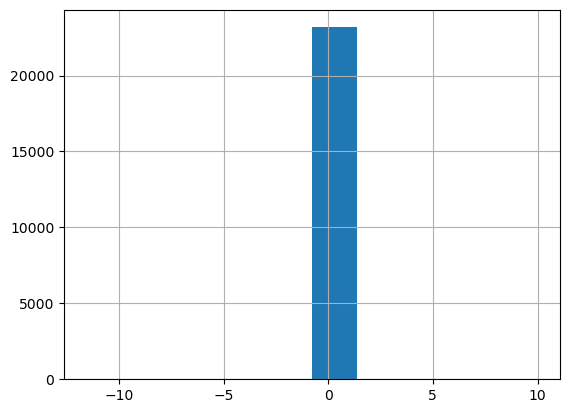

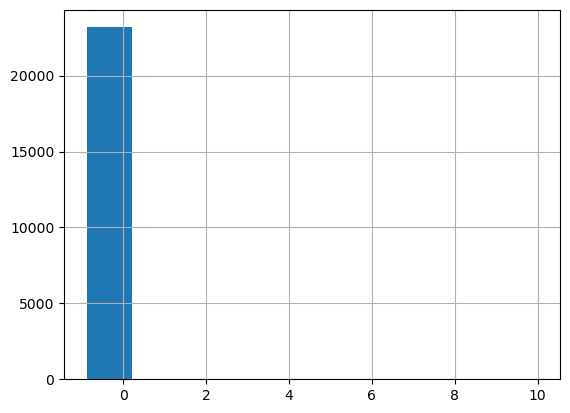

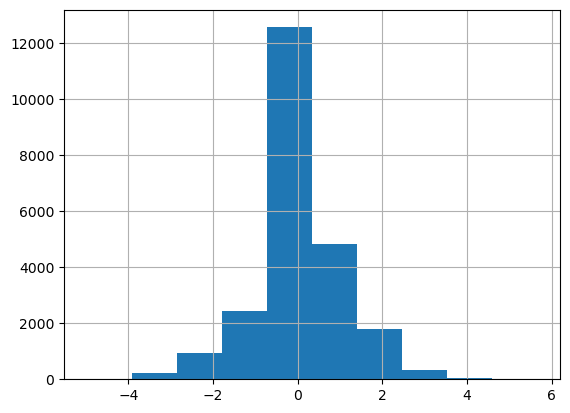

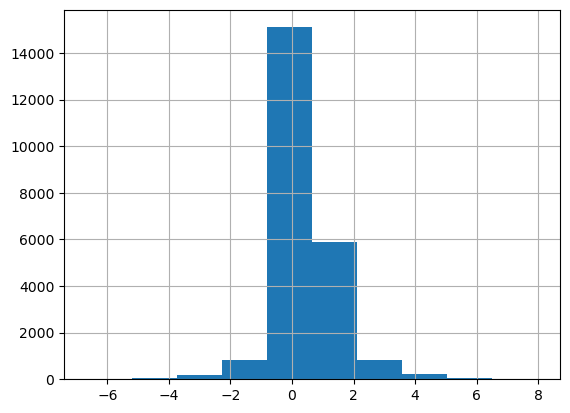

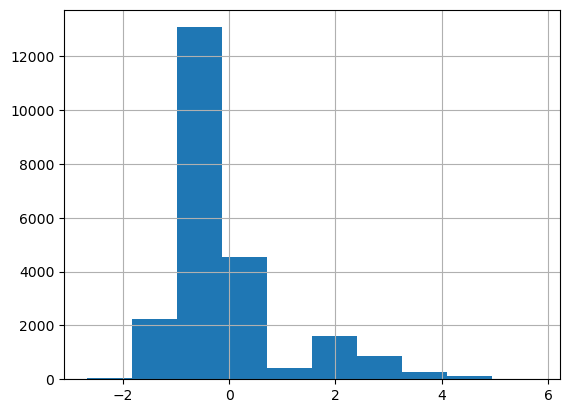

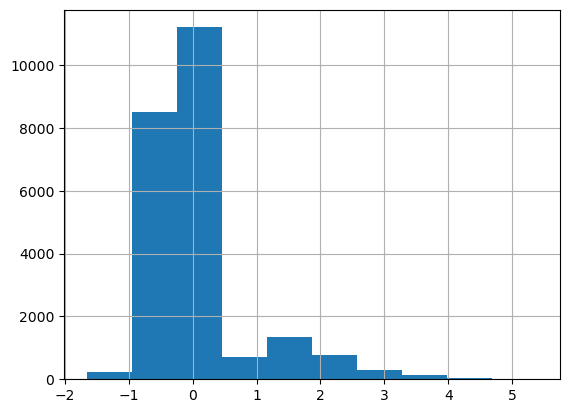

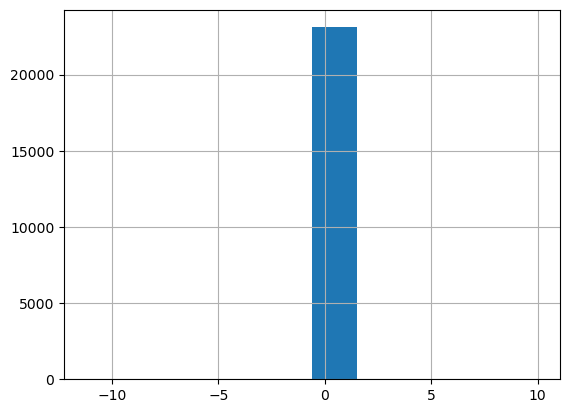

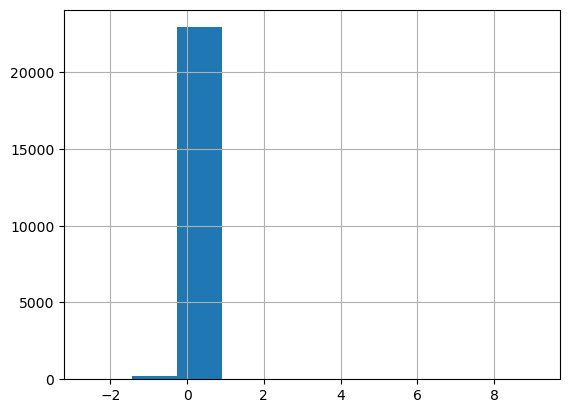

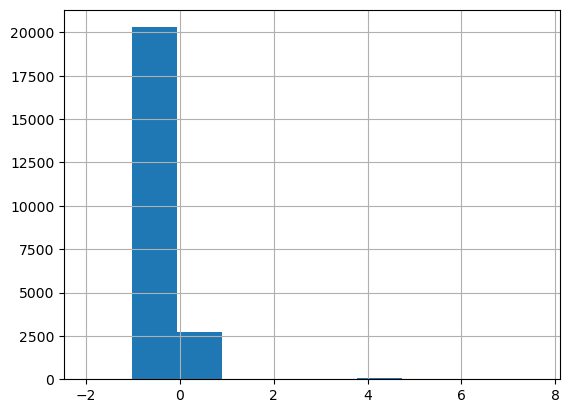

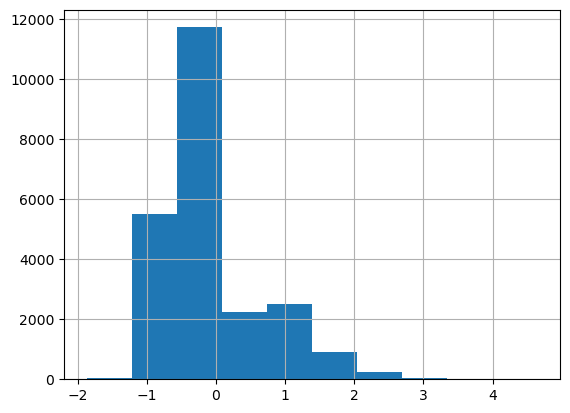

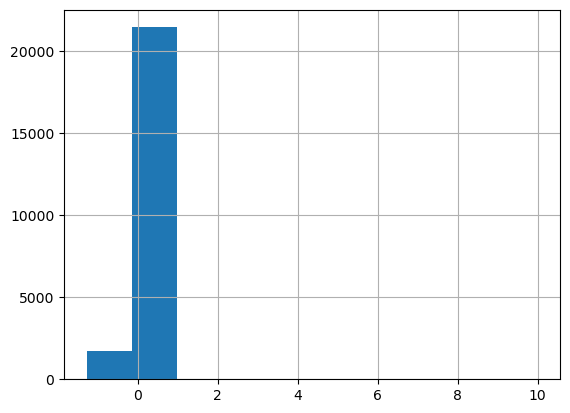

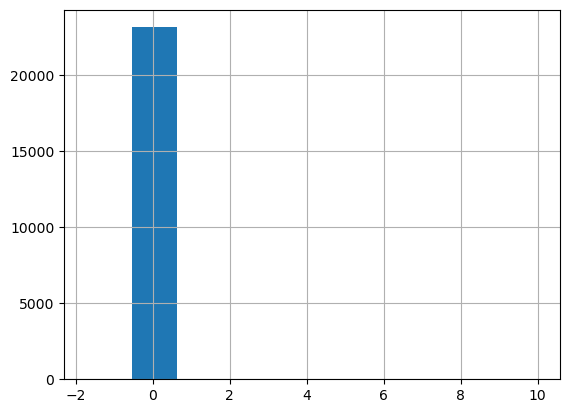

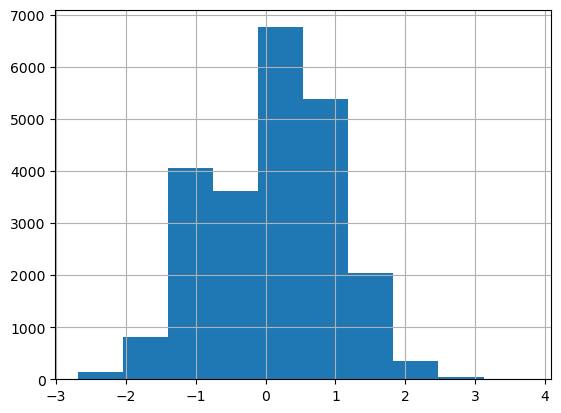

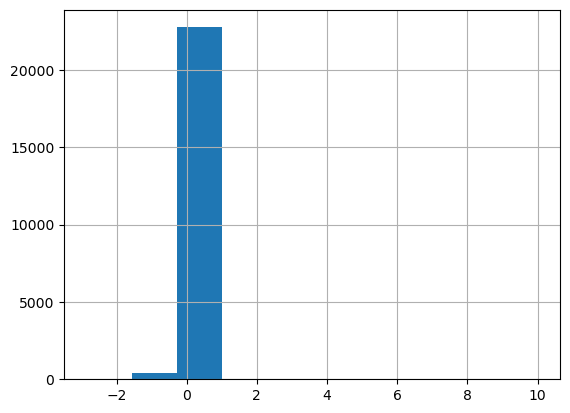

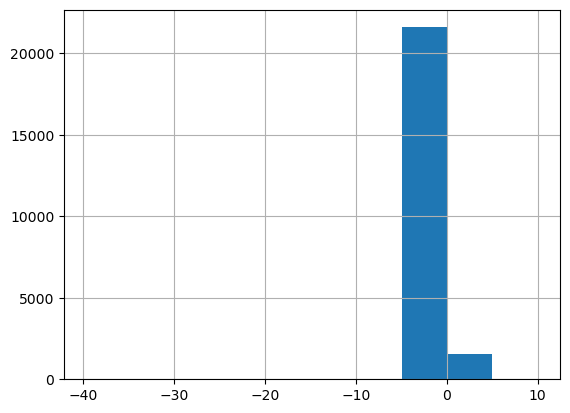

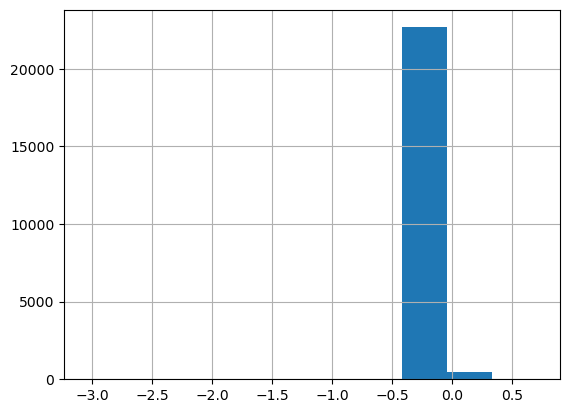

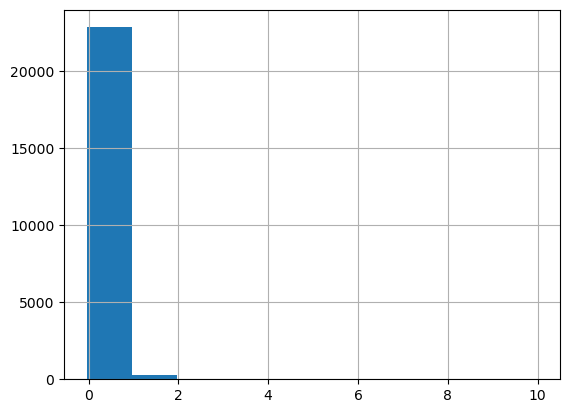

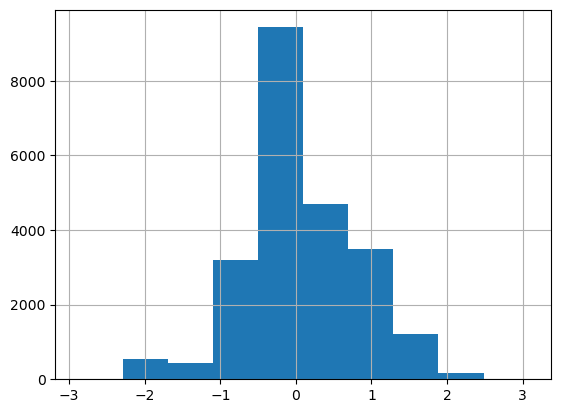

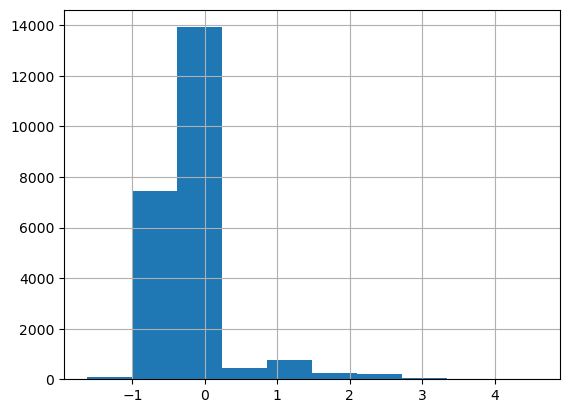

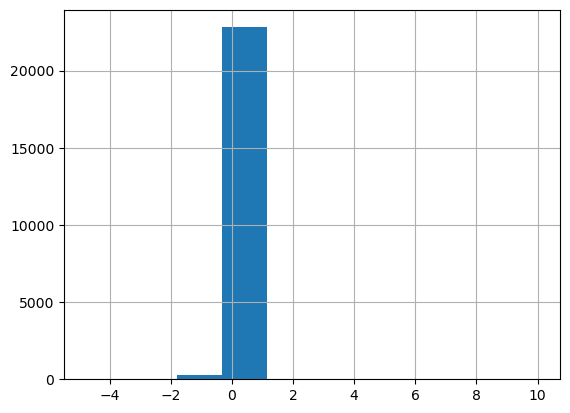

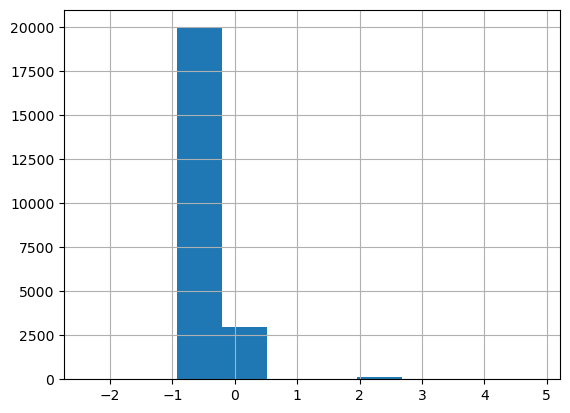

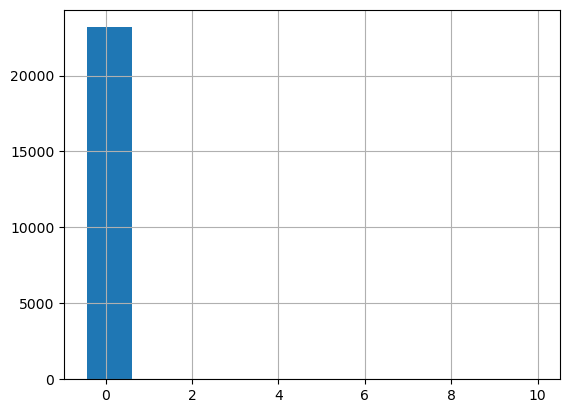

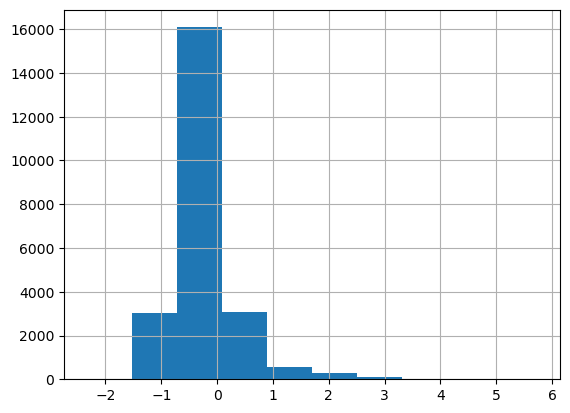

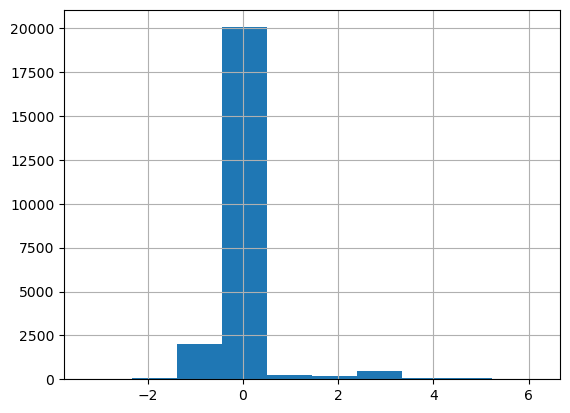

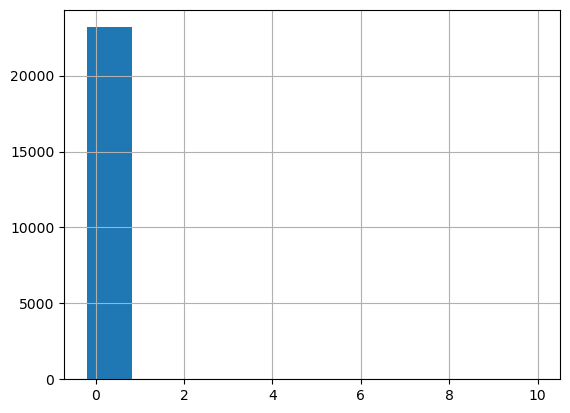

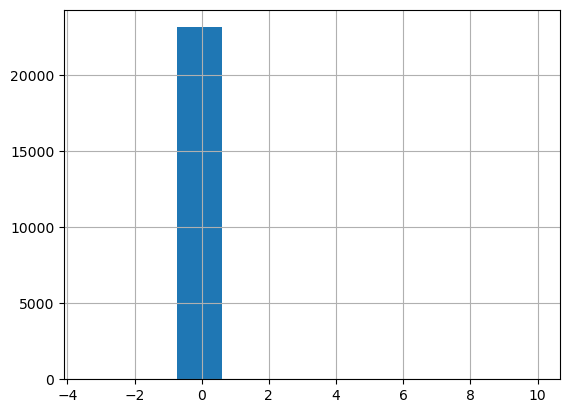

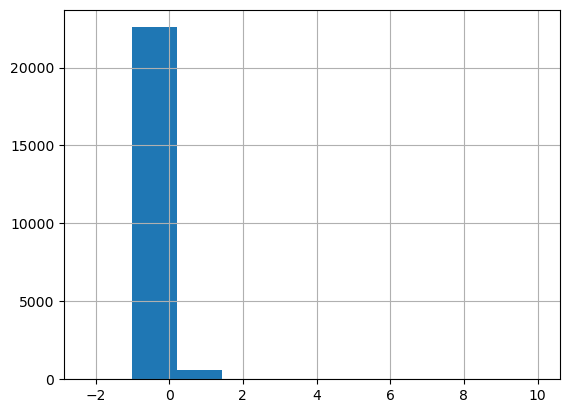

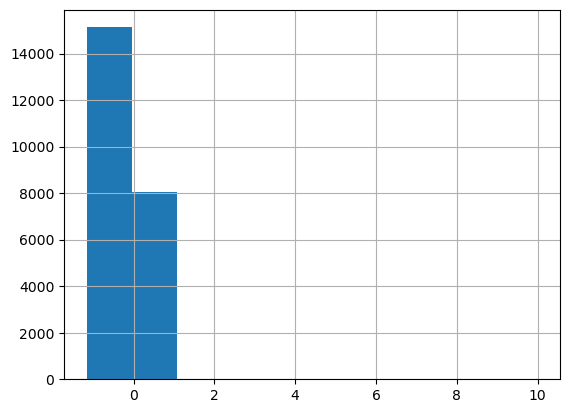

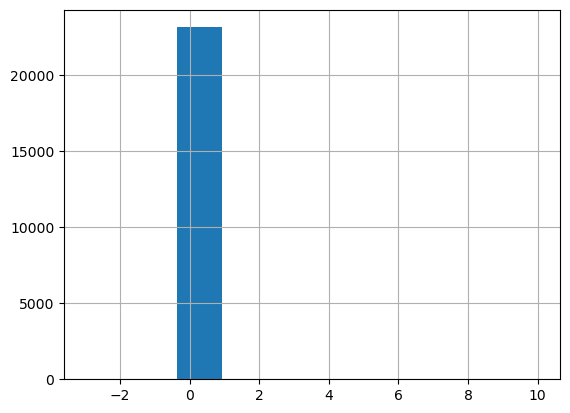

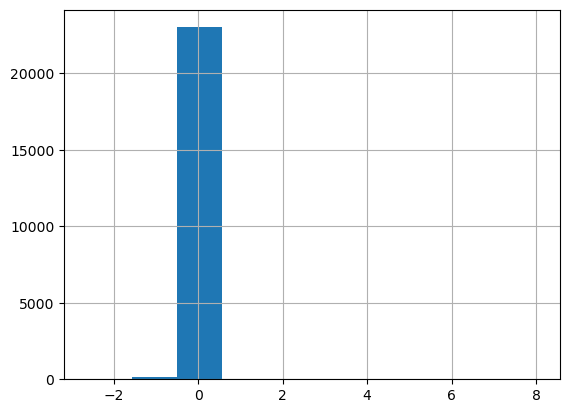

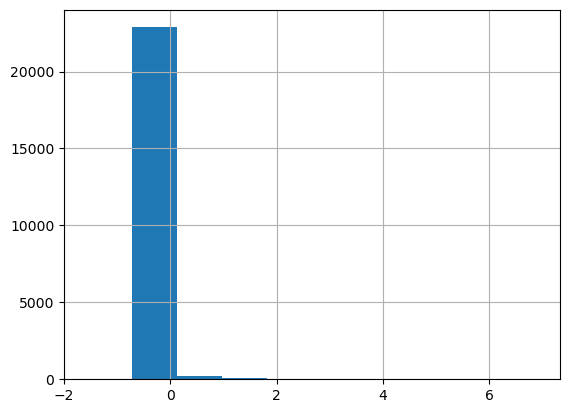

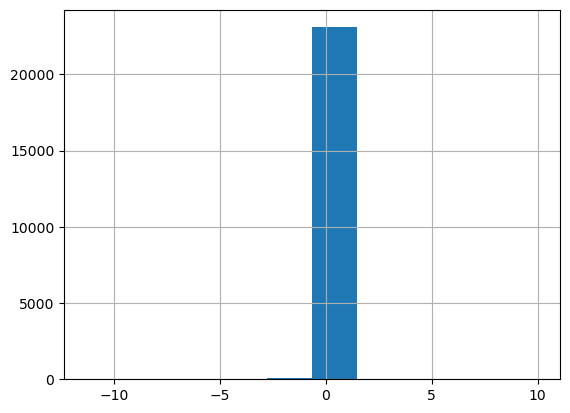

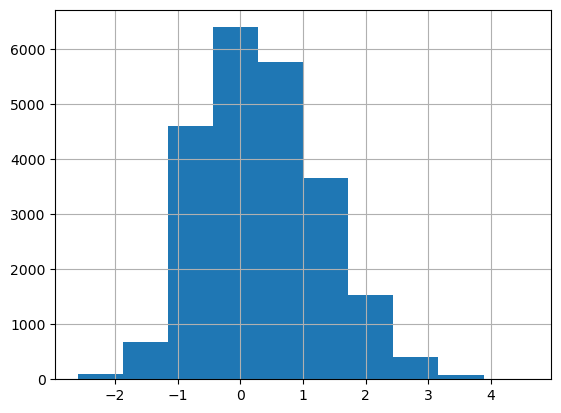

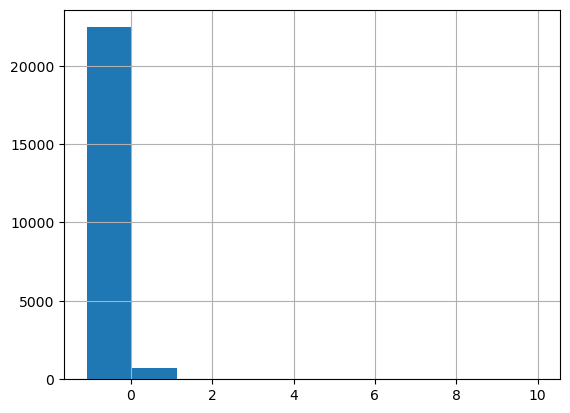

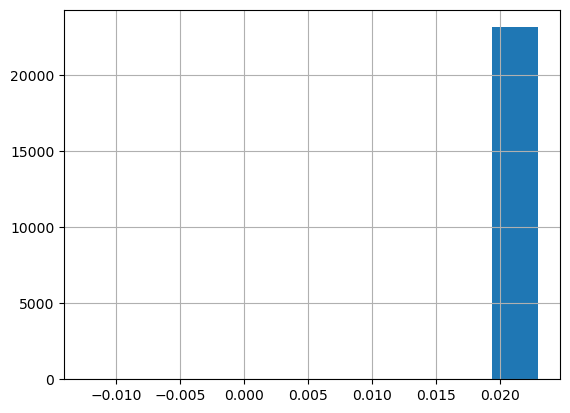

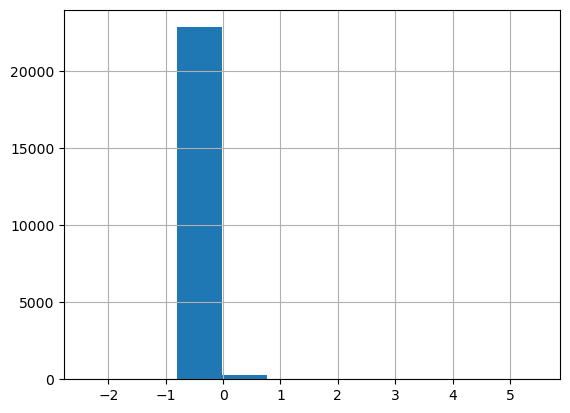

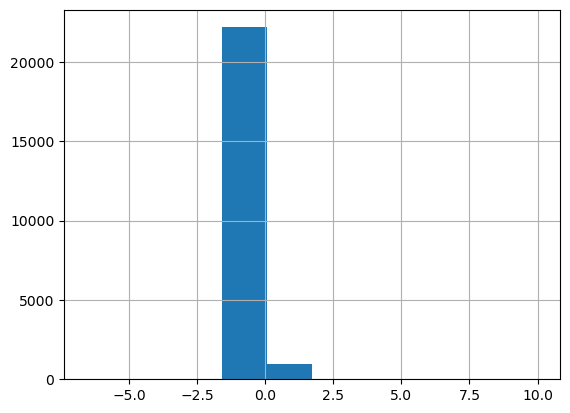

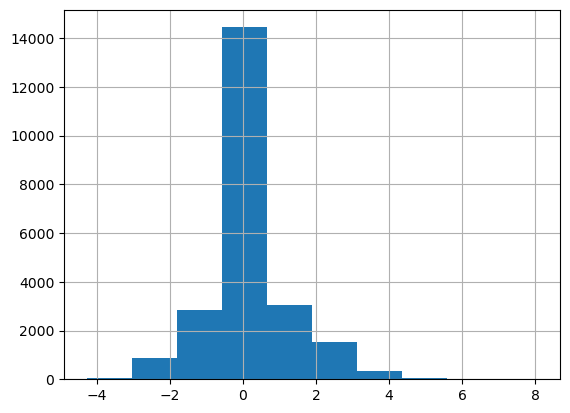

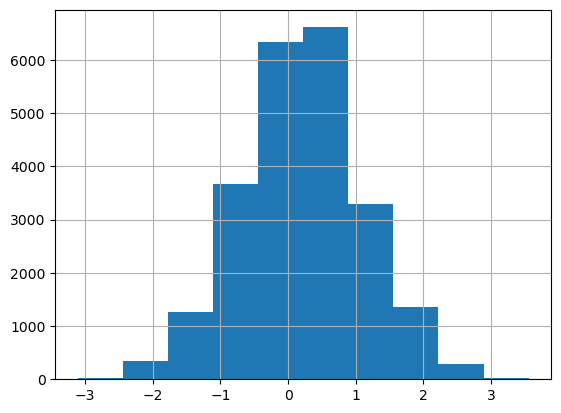

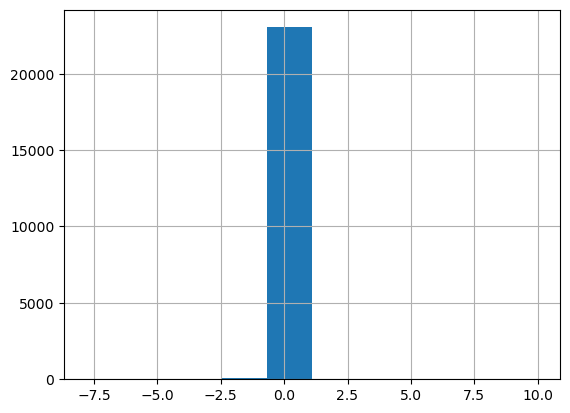

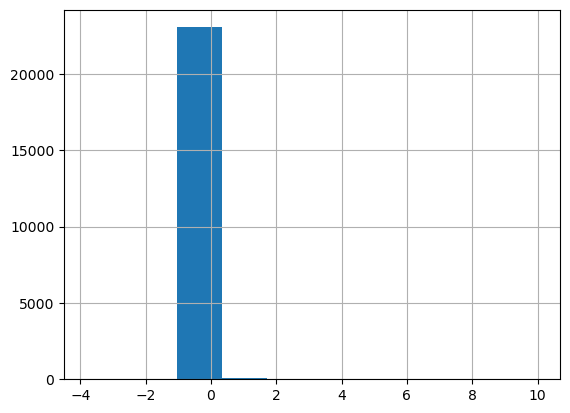

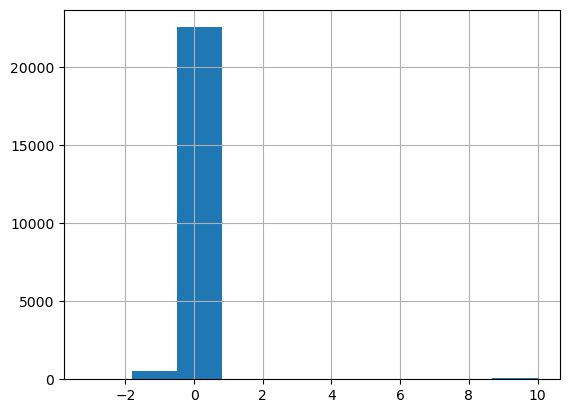

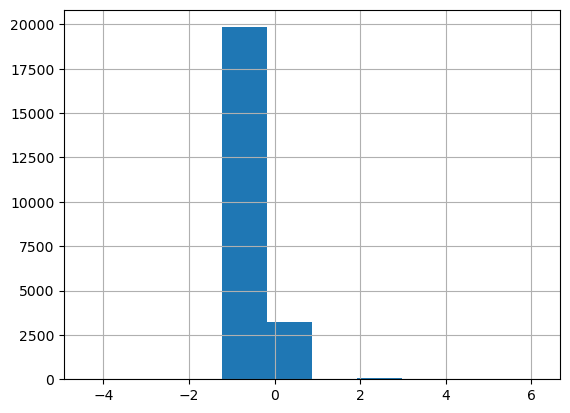

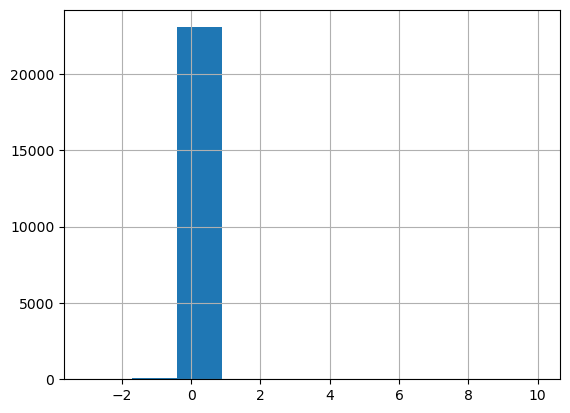

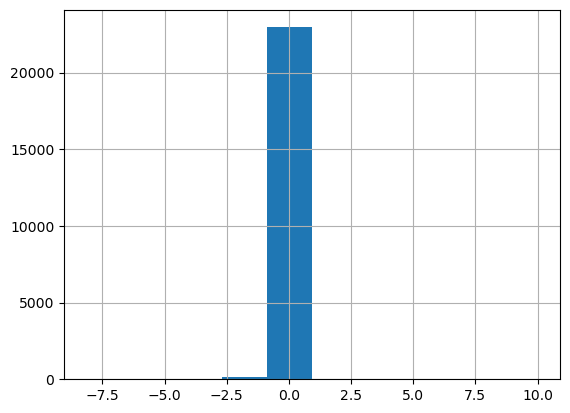

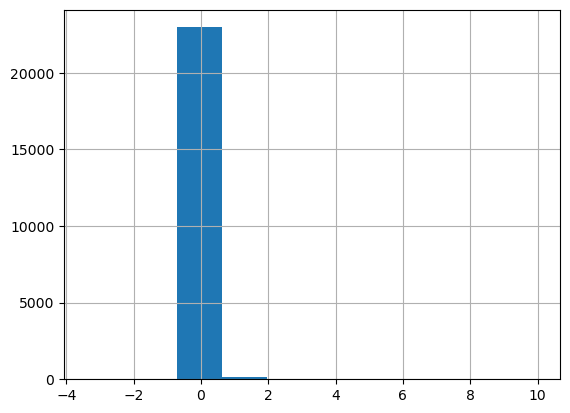

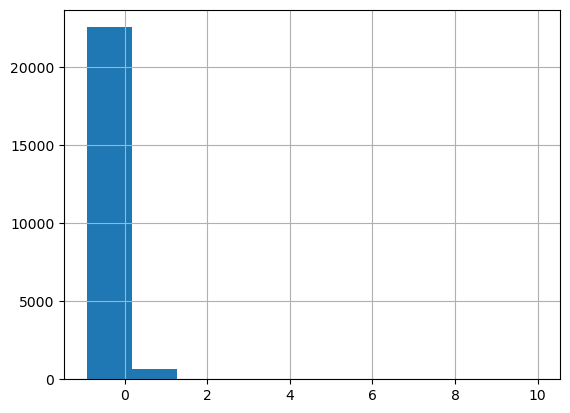

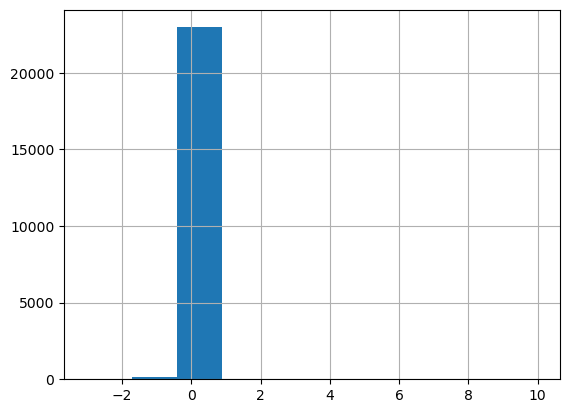

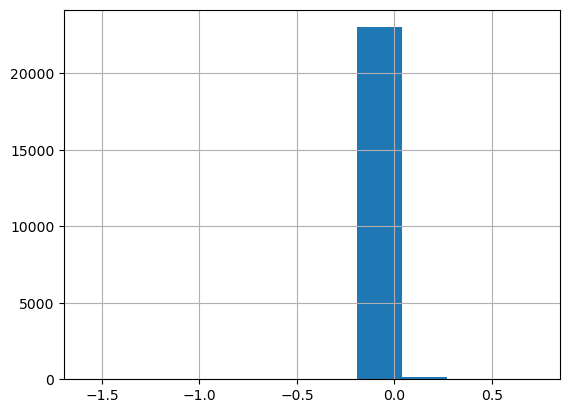

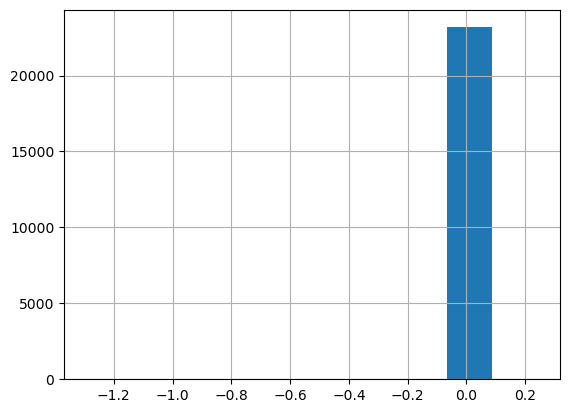

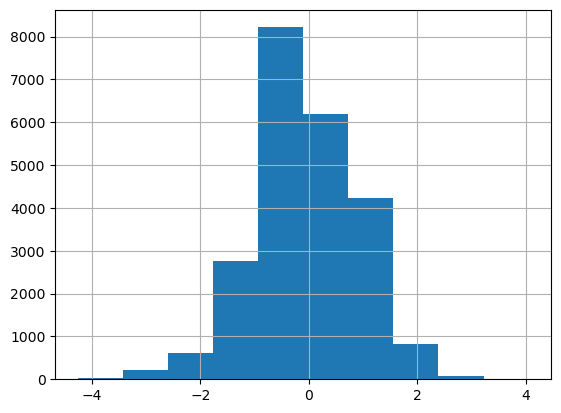

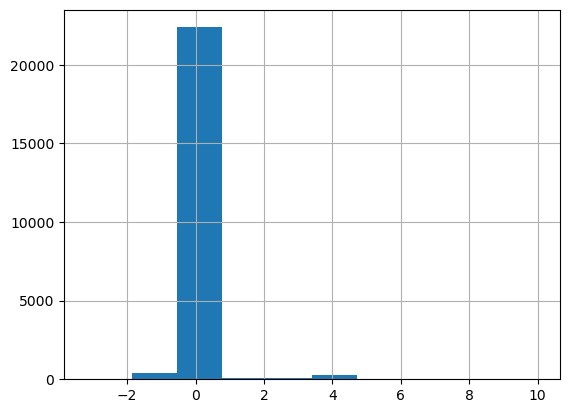

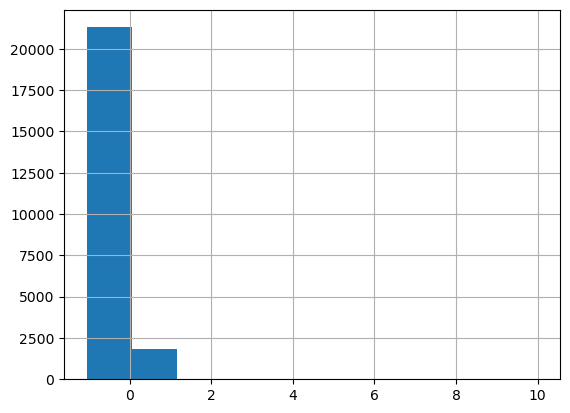

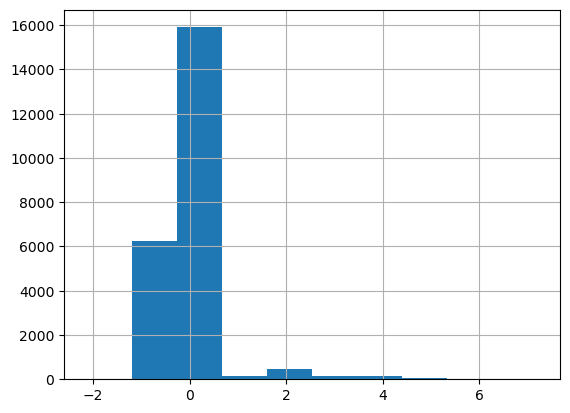

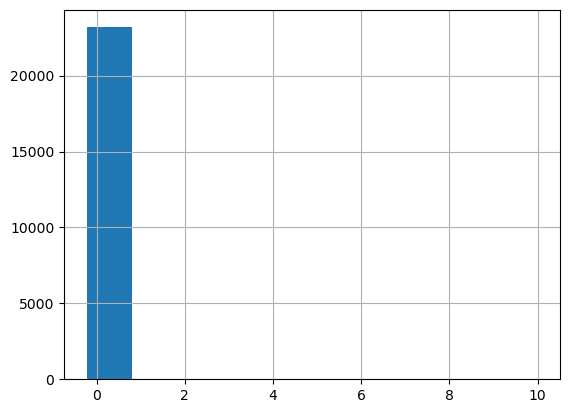

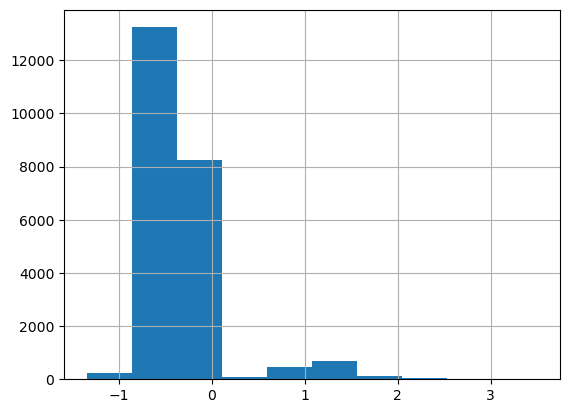

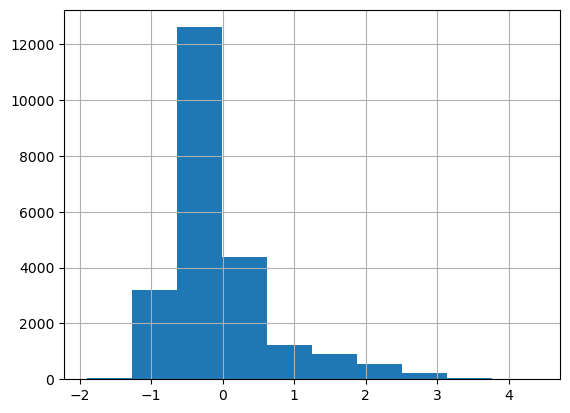

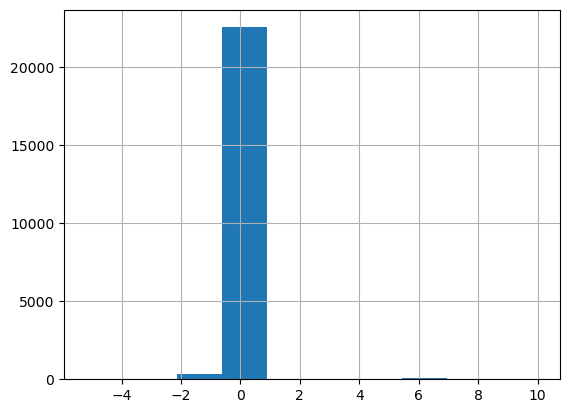

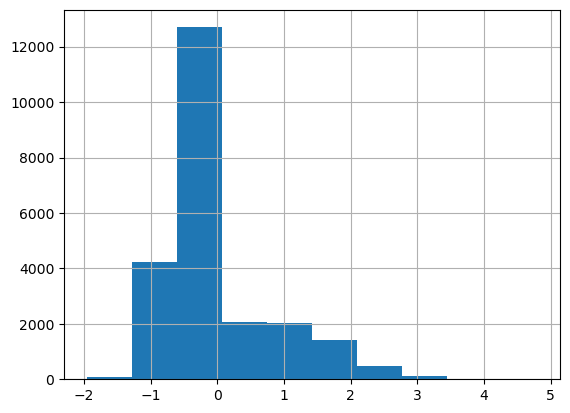

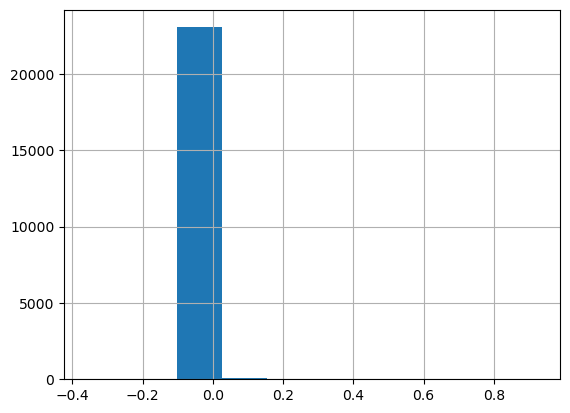

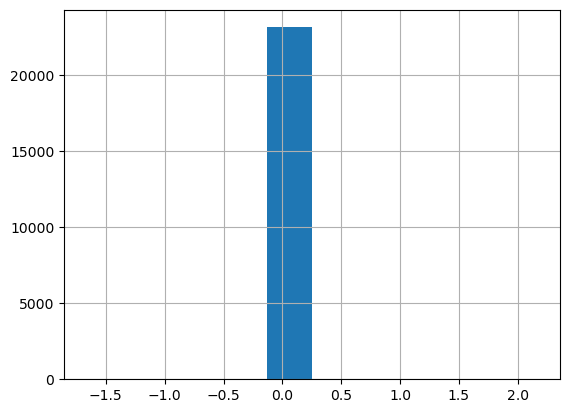

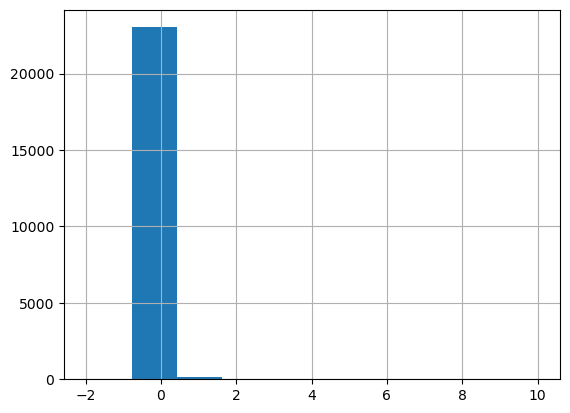

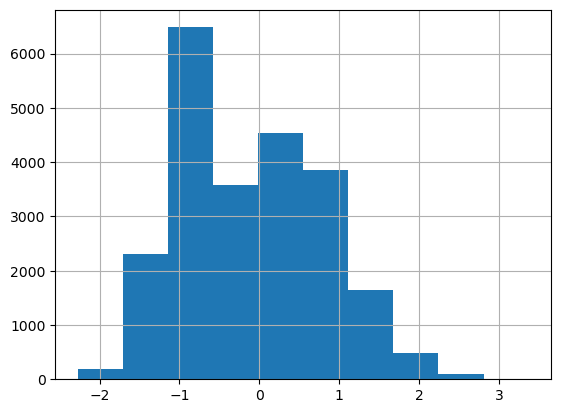

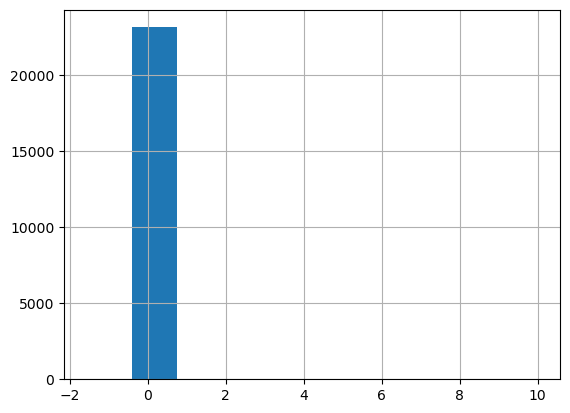

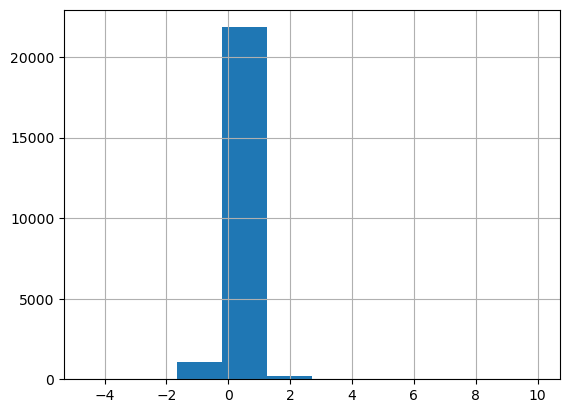

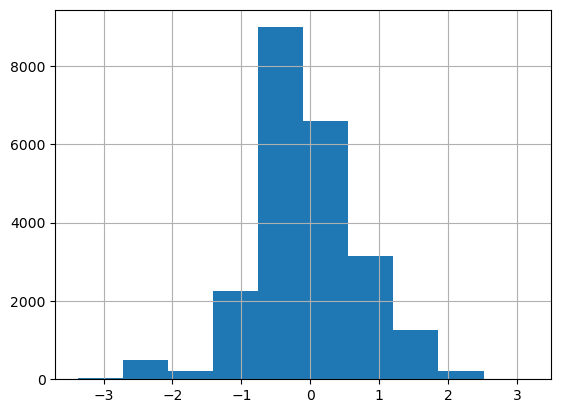

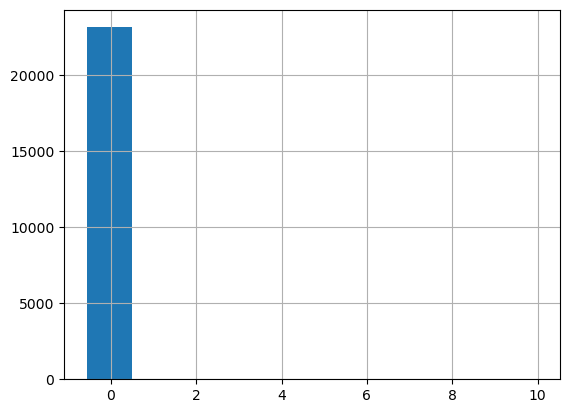

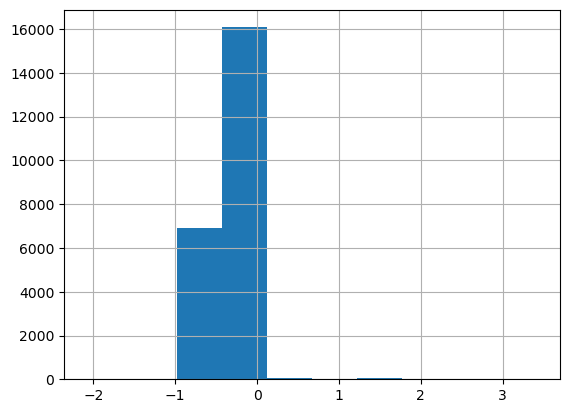

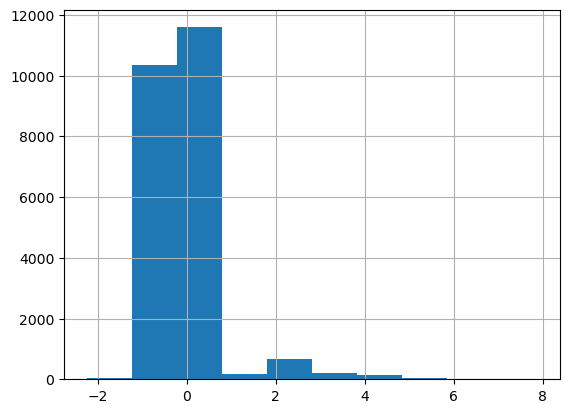

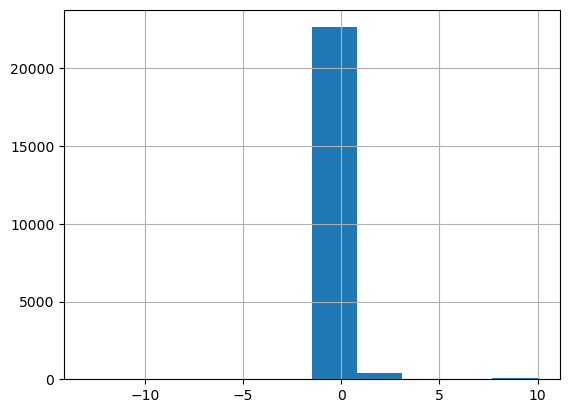

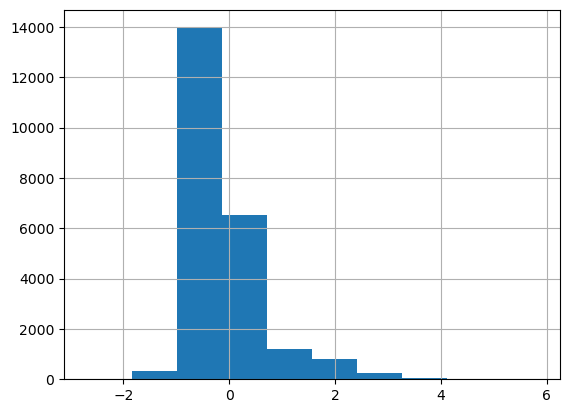

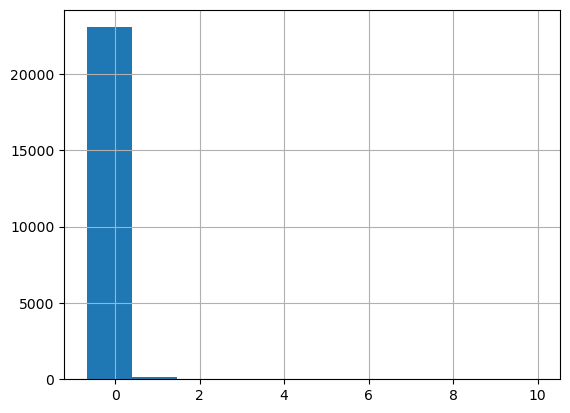

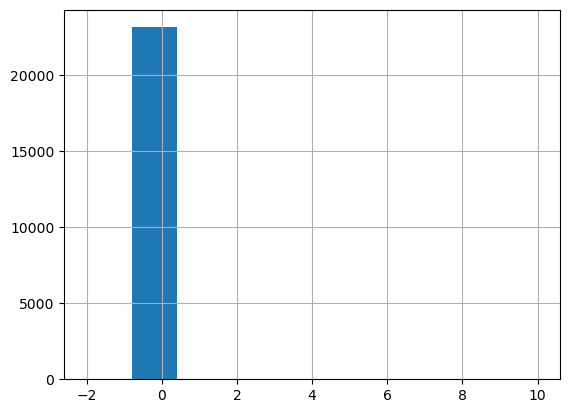

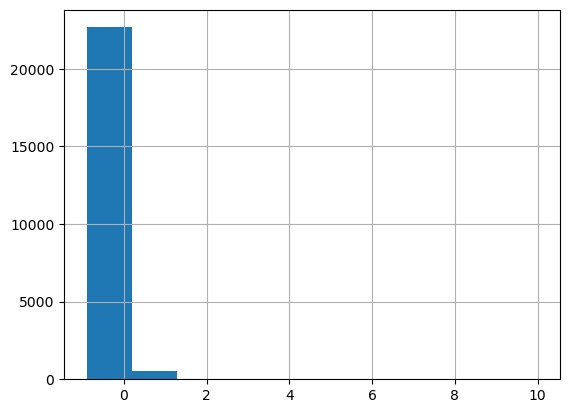

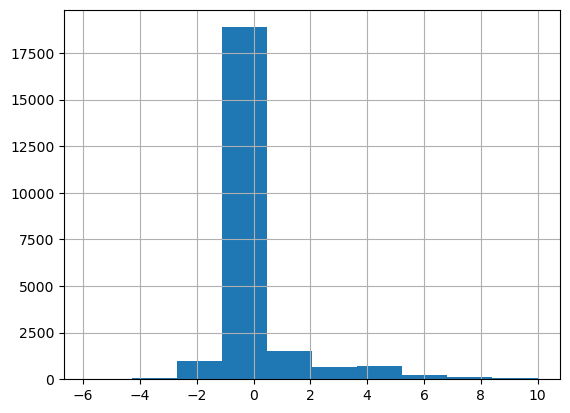

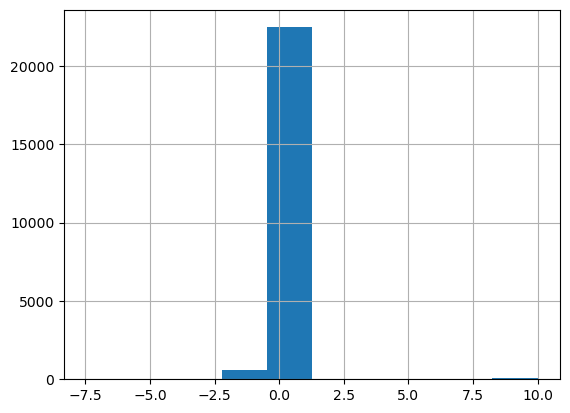

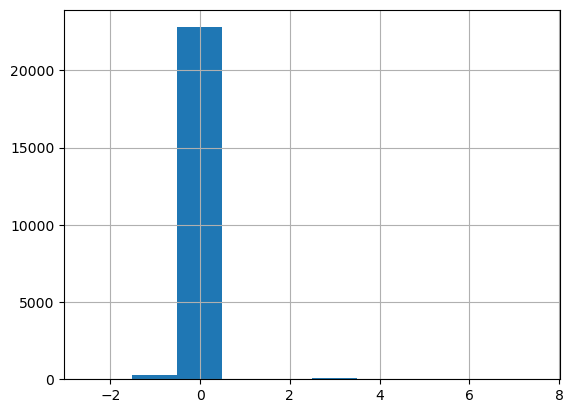

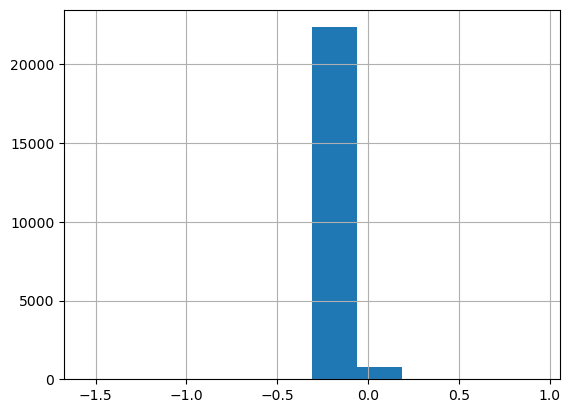

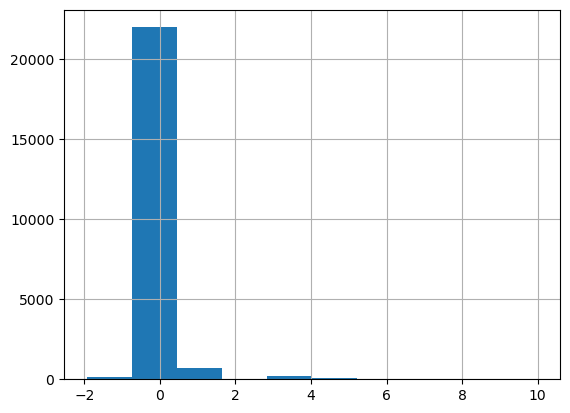

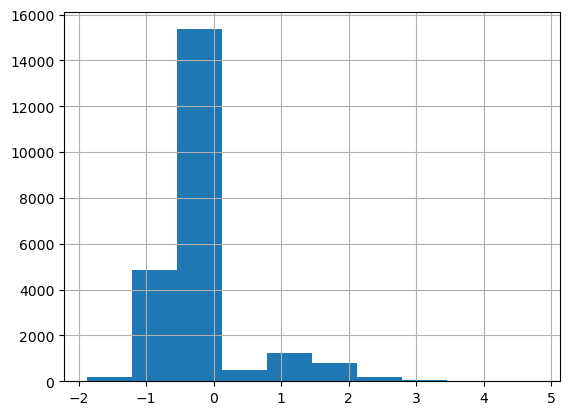

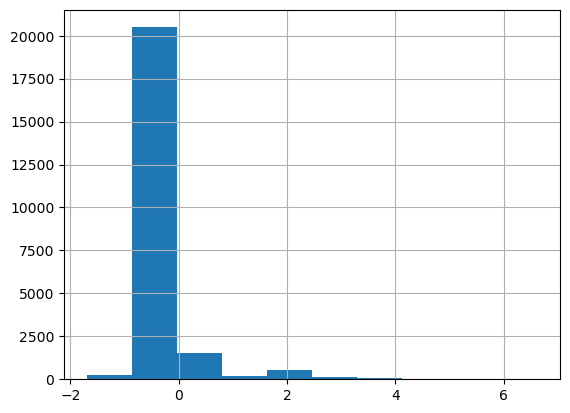

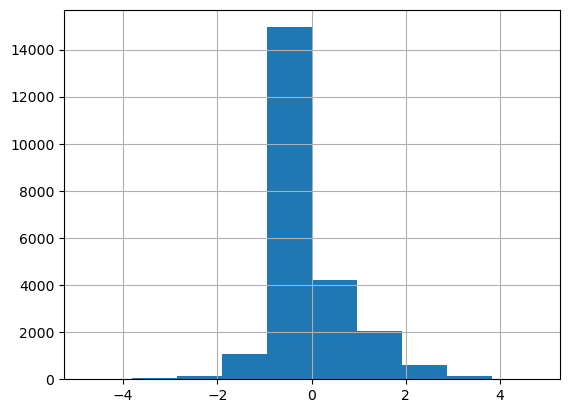

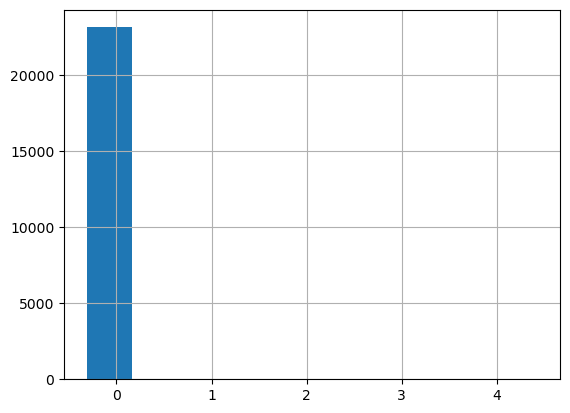

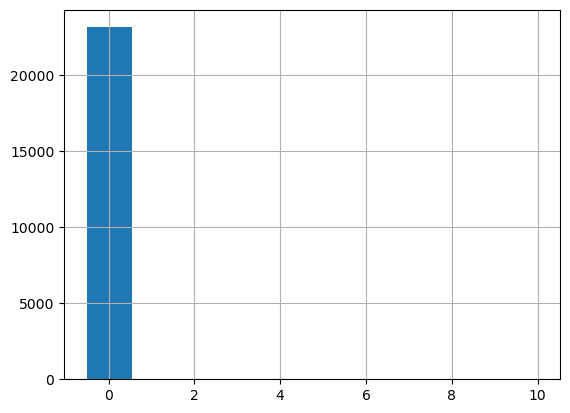

KeyboardInterrupt: 

In [57]:
for gene in df.columns.tolist():
    df[gene].hist()
    plt.show()    

In [4]:
normalized_df=(df-df.min())/(df.max()-df.min())

In [22]:
# Separating out the features
x = df.values

In [23]:
x.shape

(23189, 1999)

In [24]:
x

array([[-2.99599700e-01, -2.09672480e-01, -3.03414200e-01, ...,
        -6.34502000e-02, -4.43139600e-02,  3.56231400e-01],
       [-1.74448680e-01, -1.88095290e-01, -3.07277600e-01, ...,
        -1.52772190e-01, -7.78269840e-02, -3.73126500e-02],
       [-2.50839300e-01,  1.58620040e-03, -1.58335360e-01, ...,
        -3.13150400e-02, -1.16843790e-01,  1.11446185e-02],
       ...,
       [-1.83404310e-01, -1.61765560e-01, -5.05375400e-02, ...,
        -4.57203430e-02, -1.10362260e-01,  6.35519700e-01],
       [-3.43561400e-01, -1.77202570e-01, -4.73291350e-02, ...,
        -1.56364530e-01, -1.14206105e-01, -2.23523100e+00],
       [-4.64784860e-01, -4.08752380e-01,  2.52945850e+00, ...,
        -3.08183000e-02, -1.56197120e-01, -1.25085710e-01]])

In [8]:
label[:5]

type
AAACCTGAGACACTAA_1-0  Normal
AAACCTGAGGATATAC_1-0  Normal
AAACCTGAGGTCATCT_1-0  Normal
AAACGGGAGCTACCTA_1-0  Normal
AAACGGGAGGAATTAC_1-0  Normal

In [9]:
list(label['type'].value_counts().to_dict().keys())

['Normal', 'Severe', 'Mild']

In [69]:
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(x)

#principalDf = pd.DataFrame(data = principalComponents
#             , columns = ['principal component 1', 'principal component 2'],)

In [71]:
normalized_df['principal component 1']= principalComponents[:,0]
normalized_df['principal component 2']= principalComponents[:,1]
normalized_df['principal component 3']= principalComponents[:,2]

In [72]:
normalized_df['tagets']=label
#finalDf = pd.concat([df, principalDf], axis = 1)

In [73]:
finalDf=normalized_df[['principal component 1','principal component 2','principal component 3','tagets']]
finalDf

principal component 1  principal component 2  \
AAACCTGAGACACTAA_1-0               -3.017177               0.039812   
AAACCTGAGGATATAC_1-0               -0.901974              -0.441518   
AAACCTGAGGTCATCT_1-0               -2.245140              -4.385322   
AAACGGGAGCTACCTA_1-0               -5.071938              -3.348160   
AAACGGGAGGAATTAC_1-0                0.478620              -0.529871   
...                                      ...                    ...   
TACCTATAGATAGGAG_12-8              -4.227945              -2.660660   
TGCACCTGTGTTGAGG_12-8              -2.642112              -6.423275   
TGGTTCCGTTGGGACA_12-8               1.285259              -5.844893   
TTCTACATCCGCAGTG_12-8              -3.689024              -5.753112   
ATAGACCTCCCTAACC_13-8              -3.214128              -5.772697   

                       principal component 3  tagets  
AAACCTGAGACACTAA_1-0                0.062938  Normal  
AAACCTGAGGATATAC_1-0                1.512615  Normal  
AAACCTGAGGTCATCT_1-0               -1.533951  Normal  
AAACGGGAGCTACCTA_1-0                0.573221  Normal  
AAACGGGAGGAATTAC_1-0                1.113968  Normal  
...                                      ...     ...  
TACCTATAGATAGGAG_12-8              -5.126168  Severe  
TGCACCTGTGTTGAGG_12-8              -7.141604  Severe  
TGGTTCCGTTGGGACA_12-8              -3.624915  Severe  
TTCTACATCCGCAGTG_12-8              -5.383023  Severe  
ATAGACCTCCCTAACC_13-8              -3.701739  Severe  

[23189 rows x 4 columns]

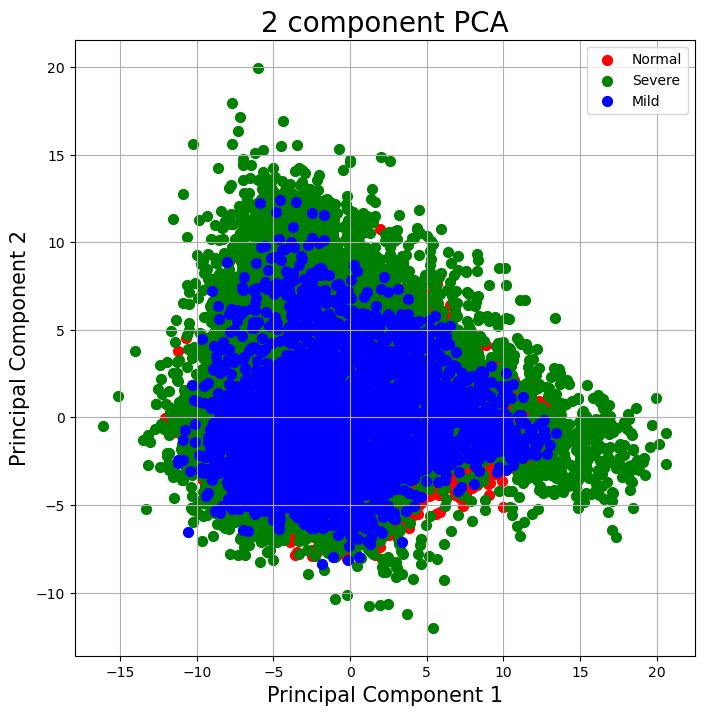

In [77]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = list(label['type'].value_counts().to_dict().keys())
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['tagets'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
    
ax.legend(targets)
ax.grid()
plt.show()

In [80]:
# t-SNE
tsne = manifold.TSNE(n_components=2, init='pca', random_state=501)
X_tsne = tsne.fit_transform(x)

'''嵌入空间可视化'''
x_min, x_max = X_tsne.min(0), X_tsne.max(0)
tsne_x = (X_tsne - x_min) / (x_max - x_min)  # 归一化
#tsen_x.shape

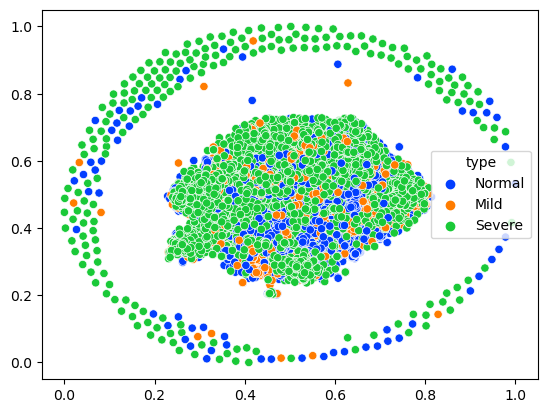

In [93]:
palette = sns.color_palette("bright", 3)

sns.scatterplot(tsne_x[:,0], tsne_x[:,1], hue=label['type'],legend='full', palette=palette)
plt.show()

In [48]:
# U-map 
reducer = umap.UMAP(n_neighbors= 15)
umap_x = reducer.fit_transform(x)
#umap_x.shape

C:\Users\Emma\anaconda3\envs\myhgt_py37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


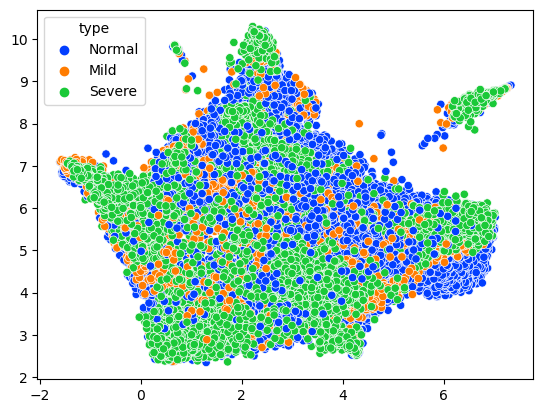

In [49]:
palette = sns.color_palette("bright", 3)
sns.scatterplot(umap_x[:,0], umap_x[:,1], hue=label['type'],legend='full', palette=palette)
plt.show()

# genecard summary embedding

In [53]:
genecard_summary = pd.read_csv('genecard_description_summary.csv',index_col=0,encoding = "ISO-8859-1")
genecard_summary[:5]

type                                 description  \
gene                                                                     
"5-HT3C2"       Pseudogene  5-Hydroxytryptamine Receptor 3E Pseudogene   
"A1BG"      Protein Coding                      Alpha-1-B Glycoprotein   
"A1BG-AS1"        RNA Gene                        A1BG Antisense RNA 1   
"A1CF"      Protein Coding              APOBEC1 Complementation Factor   
"A2M"       Protein Coding                       Alpha-2-Macroglobulin   

                                              summary_uniport  \
gene                                                            
"5-HT3C2"                                                 NaN   
"A1BG"                                                    NaN   
"A1BG-AS1"                                                NaN   
"A1CF"      UniProtKB/Swiss-Prot for A1CF Gene A1CF_HUMAN,...   
"A2M"       UniProtKB/Swiss-Prot for A2M Gene A2MG_HUMAN,P...   

                                               summary_entrez  \
gene                                                            
"5-HT3C2"                                                 NaN   
"A1BG"      The protein encoded by this gene is a plasma g...   
"A1BG-AS1"                                                NaN   
"A1CF"      Mammalian apolipoprotein B mRNA undergoes site...   
"A2M"       The protein encoded by this gene is a protease...   

                                             summary_genecard summary_Tocris  \
gene                                                                           
"5-HT3C2"   5-HT3C2 (5-Hydroxytryptamine Receptor 3E Pseud...            NaN   
"A1BG"      A1BG (Alpha-1-B Glycoprotein) is a Protein Cod...            NaN   
"A1BG-AS1"  A1BG-AS1 (A1BG Antisense RNA 1) is an RNA Gene...            NaN   
"A1CF"      A1CF (APOBEC1 Complementation Factor) is a Pro...            NaN   
"A2M"       A2M (Alpha-2-Macroglobulin) is a Protein Codin...            NaN   

           summary_CIViC  
gene                      
"5-HT3C2"            NaN  
"A1BG"               NaN  
"A1BG-AS1"           NaN  
"A1CF"               NaN  
"A2M"                NaN

In [61]:
gene_list_from_scBALF=df.columns.tolist()
gene_list={}

#genecard_summary.loc['"A2M"']
for index, row in genecard_summary.iterrows():
    if index[1:-1] not in gene_list_from_scBALF:
        continue
    gene_list[index[1:-1]] = row

In [64]:
print(len(gene_list))
gene_list

1721


{'A2M': type                                                   Protein Coding
 description                                     Alpha-2-Macroglobulin
 summary_uniport     UniProtKB/Swiss-Prot for A2M Gene A2MG_HUMAN,P...
 summary_entrez      The protein encoded by this gene is a protease...
 summary_genecard    A2M (Alpha-2-Macroglobulin) is a Protein Codin...
 summary_Tocris                                                    NaN
 summary_CIViC                                                     NaN
 Name: "A2M", dtype: object,
 'A2ML1': type                                                   Protein Coding
 description                              Alpha-2-Macroglobulin Like 1
 summary_uniport     UniProtKB/Swiss-Prot for A2ML1 Gene A2ML1_HUMA...
 summary_entrez      This gene encodes a member of the alpha-macrog...
 summary_genecard    A2ML1 (Alpha-2-Macroglobulin Like 1) is a Prot...
 summary_Tocris                                                    NaN
 summary_CIViC                  